# Results

After running several models Random Forest after synthetic minority oversampling technique provides the best prediction for the dataset and 
the results are shown below:

Best parameters: {'rf__max_depth': 10, 'smote__k_neighbors': 3}

Best Mean cross-validation score: 81.296%

Test score is : 89.22%

Train score is : 99.41%

# Importing and Analyzing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas_profiling
from IPython.core.interactiveshell import InteractiveShell

In [2]:
pd.set_option('display.max_columns', None)
InteractiveShell.ast_node_interactivity = "all"

In [3]:
#Importing and Analyzing Data
data = pd.read_csv("C:/Users/tharu/OneDrive/Desktop/MS-Sem 2/Applied Machine Learning/Project/project 2/train.csv")


# Exploratory Data Analysis

In [4]:
data.head()

,Id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
0,138662,-0.711273,1.272483,1.681631,0.039897,-0.312381,-1.161083,0.853875,-0.173979,-0.438558,-0.053805,0.321036,0.814690,1.226450,-0.152389,0.687480,-0.030825,-0.284477,-0.696867,-0.227419,0.298008,-0.208181,-0.414631,0.057957,0.930321,-0.165598,0.038799,0.384295,0.192762,21.87,0
1,235999,1.990679,-0.128465,-1.700556,0.529839,0.136889,-1.404270,0.593353,-0.456700,0.648260,-0.071353,-0.982339,0.229658,-0.592959,0.574159,-0.263545,-0.780886,-0.066039,-0.575168,0.227544,-0.205092,0.018179,0.179084,-0.004248,0.039531,0.333765,-0.225201,-0.047285,-0.059682,49.99,0
2,245376,1.812653,-0.476162,-0.338988,1.386750,-0.745965,-0.449870,-0.492226,0.029904,1.129394,0.227346,-1.197477,-0.555129,-1.369130,0.320282,1.002745,0.501765,-0.670053,0.478236,-0.820942,-0.202894,0.252668,0.655719,0.090057,-0.136884,-0.172452,-0.556921,0.036490,-0.021575,79.00,0
3,202483,-1.014219,0.522775,-0.337978,-1.957797,3.578395,3.266965,0.602857,0.644645,-0.305879,-0.417906,0.010333,-0.299630,-0.379164,0.329193,0.957904,-0.417285,-0.705683,-0.063235,-0.381035,0.136061,0.147742,0.590740,-0.680551,0.745346,1.119496,0.013520,0.004530,-0.132643,6.00,0
4,9710,-0.967270,-0.053815,2.273463,-0.894434,0.728924,0.153524,-0.038330,0.165252,1.172526,-0.879114,2.505831,-2.249565,0.791677,1.546279,-0.133370,0.184501,0.307080,-0.081722,-1.359941,0.007512,0.106692,0.514430,-0.081546,-0.305042,-0.354883,0.896254,-0.182293,-0.142810,15.95,0


In [6]:
data.columns

Index(['Id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29',
       'Target'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24846 entries, 0 to 24845
Data columns (total 31 columns):
Id        24846 non-null int64
V1        22459 non-null float64
V2        24846 non-null float64
V3        24846 non-null float64
V4        24846 non-null float64
V5        24846 non-null float64
V6        24846 non-null float64
V7        24846 non-null float64
V8        24846 non-null float64
V9        24846 non-null float64
V10       24846 non-null float64
V11       24846 non-null float64
V12       24846 non-null float64
V13       24846 non-null float64
V14       24846 non-null float64
V15       24846 non-null float64
V16       24846 non-null float64
V17       24846 non-null float64
V18       24846 non-null float64
V19       24846 non-null float64
V20       22317 non-null float64
V21       24846 non-null float64
V22       24846 non-null float64
V23       24846 non-null float64
V24       24846 non-null float64
V25       24846 non-null float64
V26       24846 non-null float64
V2

In [8]:
data.describe()

,Id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
count,24846.000000,22459.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,22317.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000,24846.000000
mean,141868.788095,-0.042032,0.019074,-0.055260,0.029289,-0.031085,-0.008175,-0.026007,0.014152,-0.017939,-0.035149,0.024294,-0.049479,0.001362,-0.054444,0.002910,-0.042306,-0.056821,-0.014644,0.002778,0.003860,0.004708,0.006116,-0.004320,-0.005632,0.003193,0.001730,0.003160,-0.000100,91.698618,0.009820
std,82016.035976,2.061469,1.722647,1.730072,1.482053,1.616062,1.413044,1.620777,1.236557,1.140772,1.279021,1.099884,1.216934,0.992960,1.204090,0.917929,1.009002,1.184588,0.891371,0.825121,0.832891,0.753043,0.728869,0.622440,0.602507,0.518214,0.483415,0.455299,0.314326,310.349300,0.098613
min,32.000000,-37.054295,-39.818310,-48.325589,-5.231828,-113.743307,-19.996349,-37.060311,-39.688571,-11.126624,-23.228255,-4.568390,-18.683715,-3.844974,-19.214325,-4.498945,-14.129855,-25.162799,-9.287832,-4.395283,-54.497720,-21.620120,-8.887017,-23.222016,-2.759942,-4.930750,-1.658162,-7.976100,-15.430084,0.000000,0.000000
25%,70705.000000,-0.941997,-0.611444,-0.918977,-0.853705,-0.705745,-0.778707,-0.565469,-0.207270,-0.659425,-0.543054,-0.765464,-0.423463,-0.646768,-0.434402,-0.579738,-0.487703,-0.491669,-0.505933,-0.458749,-0.212758,-0.225318,-0.528751,-0.163086,-0.363609,-0.310198,-0.325839,-0.069698,-0.053829,5.470000,0.000000
50%,141887.000000,0.002750,0.068992,0.163070,-0.006193,-0.070299,-0.279575,0.032157,0.026507,-0.056063,-0.094353,-0.041019,0.137088,-0.005918,0.051674,0.053821,0.047246,-0.077799,-0.007094,0.003545,-0.060477,-0.026834,0.016988,-0.011396,0.036837,0.020346,-0.049872,0.001493,0.010855,21.990000,0.000000
75%,212513.500000,1.309469,0.825253,1.016704,0.759149,0.598372,0.402585,0.569205,0.335042,0.586035,0.454624,0.749140,0.621207,0.664828,0.485664,0.654127,0.510476,0.390588,0.497511,0.456741,0.137391,0.192690,0.533115,0.147343,0.433292,0.352613,0.241366,0.093725,0.079364,77.900000,0.000000
max,284781.000000,2.418267,19.167239,3.862590,15.304184,28.762671,73.301626,120.589494,19.587773,8.918202,15.331742,12.018913,4.242791,7.126883,7.439566,8.877742,17.315112,7.733456,4.093440,5.501747,17.819507,27.202839,8.272233,17.606637,4.584549,4.554683,3.415636,31.612198,15.522649,25691.160000,1.000000


In [9]:
data.isnull().sum()

Id           0
V1        2387
V2           0
V3           0
V4           0
V5           0
V6           0
V7           0
V8           0
V9           0
V10          0
V11          0
V12          0
V13          0
V14          0
V15          0
V16          0
V17          0
V18          0
V19          0
V20       2529
V21          0
V22          0
V23          0
V24          0
V25          0
V26          0
V27          0
V28          0
V29          0
Target       0
dtype: int64

In [10]:
# Splitting Data based on Data Types
data.dtypes

Id          int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
V29       float64
Target      int64
dtype: object

In [11]:
# Separating Variables based on Data types

In [12]:
num_d=[var for var in data.columns if data[var].dtype!='object' ]
num_data=data[num_d]

In [13]:
num_data

,Id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
0,138662,-0.711273,1.272483,1.681631,0.039897,-0.312381,-1.161083,0.853875,-0.173979,-0.438558,-0.053805,0.321036,0.814690,1.226450,-0.152389,0.687480,-0.030825,-0.284477,-0.696867,-0.227419,0.298008,-0.208181,-0.414631,0.057957,0.930321,-0.165598,0.038799,0.384295,0.192762,21.87,0
1,235999,1.990679,-0.128465,-1.700556,0.529839,0.136889,-1.404270,0.593353,-0.456700,0.648260,-0.071353,-0.982339,0.229658,-0.592959,0.574159,-0.263545,-0.780886,-0.066039,-0.575168,0.227544,-0.205092,0.018179,0.179084,-0.004248,0.039531,0.333765,-0.225201,-0.047285,-0.059682,49.99,0
2,245376,1.812653,-0.476162,-0.338988,1.386750,-0.745965,-0.449870,-0.492226,0.029904,1.129394,0.227346,-1.197477,-0.555129,-1.369130,0.320282,1.002745,0.501765,-0.670053,0.478236,-0.820942,-0.202894,0.252668,0.655719,0.090057,-0.136884,-0.172452,-0.556921,0.036490,-0.021575,79.00,0
3,202483,-1.014219,0.522775,-0.337978,-1.957797,3.578395,3.266965,0.602857,0.644645,-0.305879,-0.417906,0.010333,-0.299630,-0.379164,0.329193,0.957904,-0.417285,-0.705683,-0.063235,-0.381035,0.136061,0.147742,0.590740,-0.680551,0.745346,1.119496,0.013520,0.004530,-0.132643,6.00,0
4,9710,-0.967270,-0.053815,2.273463,-0.894434,0.728924,0.153524,-0.038330,0.165252,1.172526,-0.879114,2.505831,-2.249565,0.791677,1.546279,-0.133370,0.184501,0.307080,-0.081722,-1.359941,0.007512,0.106692,0.514430,-0.081546,-0.305042,-0.354883,0.896254,-0.182293,-0.142810,15.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24841,171609,0.025742,0.155351,-0.201821,-2.434676,0.368112,-1.010151,0.575542,-0.183199,-1.311257,0.437212,0.490187,-0.178390,0.307655,0.016503,-1.287276,1.334680,-0.603051,-0.639105,0.041404,NaN,0.590620,1.746028,-0.174980,-0.279068,-0.679524,-0.209386,0.452234,0.292501,15.00,0
24842,176059,-0.503899,1.376016,-1.009883,-1.090479,0.651744,-1.515541,1.330064,-0.125985,-0.279665,0.136492,0.796786,0.283701,-1.105848,1.031224,-0.670344,-0.417956,-0.488391,0.130239,0.105809,-0.039478,0.201180,0.757784,-0.272629,0.100572,0.212064,0.126217,-0.094537,-0.162202,8.00,0
24843,129501,-1.727379,-0.671760,1.886590,-1.641808,-0.857305,0.295727,-0.892750,0.939869,-0.943223,-0.213779,0.566446,-0.384079,-0.674610,-0.165940,-0.554983,1.505217,0.223563,-0.594127,-0.040079,NaN,0.508102,1.008519,-0.154214,-0.286183,0.499205,-0.084872,0.171517,-0.046753,99.00,0
24844,143406,-1.882975,-1.321925,0.798726,-3.387075,-0.047298,-1.673308,-0.602063,0.404498,0.169370,-1.315348,-1.418807,0.723338,1.020090,-0.195009,-0.349272,-1.393554,-0.388751,1.343058,-1.367102,-0.087635,-0.165944,-0.399639,-0.062250,-0.099157,0.047395,-0.334422,0.262370,-0.075813,48.00,0


## Visualization

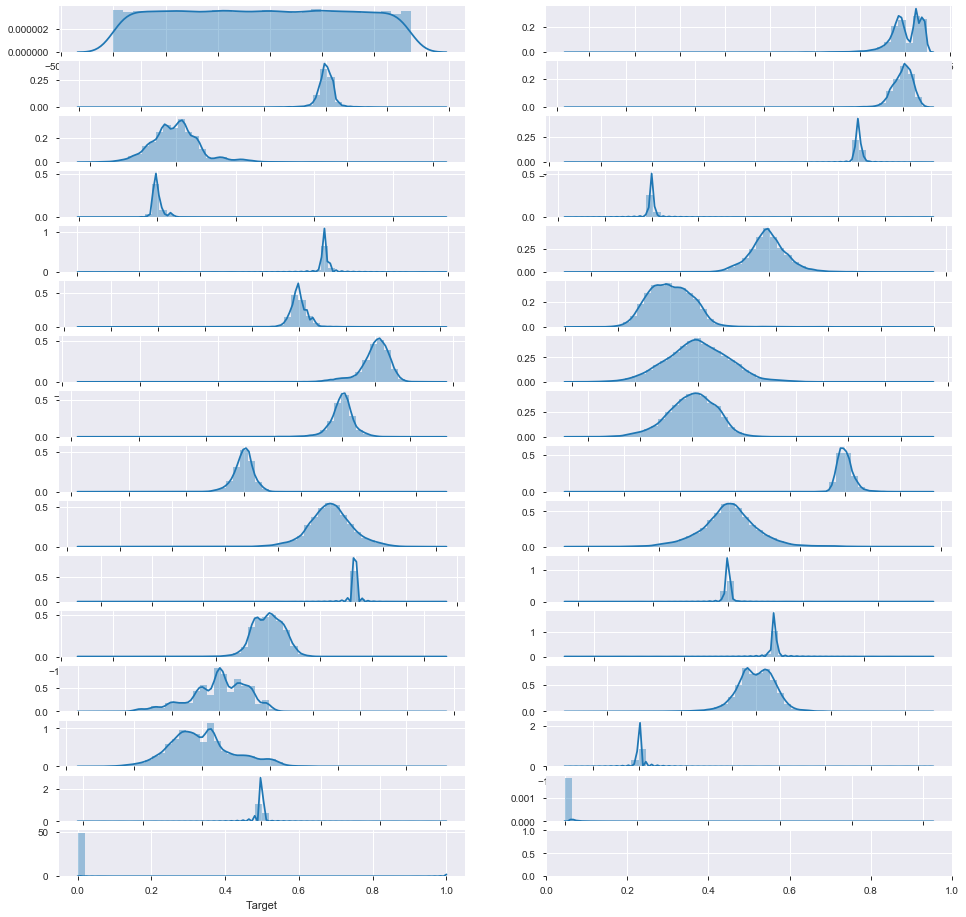

In [14]:
fig, axs = plt.subplots(ncols=2, nrows=16,figsize=(16,16))
axs = axs.flatten()

for i, var in enumerate(num_d):
    sns.distplot(data[data[var].notnull()][var], ax=axs[i]);

In [15]:
#Check for Correlation
data.corr()

,Id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
Id,1.000000,0.113209,-0.018078,-0.344400,-0.118087,0.146777,-0.055269,0.072930,-0.045762,0.011950,0.033176,-0.229043,0.114747,-0.057126,-0.050467,-0.174524,0.016280,-0.025586,0.093375,0.021946,-0.043411,0.034326,0.134566,0.051062,-0.012996,-0.215736,-0.040277,-0.009830,-0.013870,-0.006512,-0.028446
V1,0.113209,1.000000,-0.056748,0.153798,-0.081292,0.138548,-0.023652,0.044414,-0.003346,0.048714,0.116480,-0.082522,0.130091,-0.001071,0.121744,0.004347,0.094562,0.170529,0.085264,-0.003175,0.010408,0.010530,0.003879,0.062343,-0.004829,0.010875,-0.000272,-0.029906,0.027766,-0.262588,-0.195578
V2,-0.018078,-0.056748,1.000000,-0.071895,0.061846,0.014892,-0.082690,-0.174932,0.039876,-0.039797,-0.085364,0.080397,-0.110969,0.009681,-0.122548,-0.002425,-0.116232,-0.135606,-0.078010,0.031834,0.065861,-0.001476,0.017668,0.093986,-0.002840,0.023821,0.000962,-0.037753,0.026125,-0.528025,0.185381
V3,-0.344400,0.153798,-0.071895,1.000000,-0.131803,0.197305,-0.019094,0.093494,-0.009439,0.099843,0.207477,-0.151531,0.236723,-0.010086,0.224101,-0.000026,0.170135,0.267758,0.129076,-0.037081,0.029142,0.016669,-0.015475,0.015989,-0.004218,-0.002760,-0.008184,-0.082967,0.046468,-0.257823,-0.358543
V4,-0.118087,-0.081292,0.061846,-0.131803,1.000000,-0.093773,-0.012474,-0.073659,0.007605,-0.077898,-0.148313,0.114960,-0.176475,-0.003996,-0.172559,-0.006748,-0.118404,-0.182099,-0.084718,0.023665,-0.017943,0.006510,0.005548,-0.036205,-0.004004,-0.005283,0.008077,0.027365,0.007514,0.121432,0.295945
V5,0.146777,0.138548,0.014892,0.197305,-0.093773,1.000000,-0.119833,-0.106402,0.025743,0.061003,0.148578,-0.085907,0.140703,-0.022808,0.118452,-0.014886,0.063944,0.178050,0.089207,-0.047361,0.148534,0.080997,-0.025973,-0.043950,-0.015882,-0.037024,-0.026433,-0.168281,0.112120,-0.506480,-0.156473
V6,-0.055269,-0.023652,-0.082690,-0.019094,-0.012474,-0.119833,1.000000,0.185972,-0.056737,0.006906,0.035975,-0.024926,0.038975,0.013542,0.051670,0.030027,0.070958,0.043288,0.016689,0.018826,-0.140155,-0.057815,0.010404,0.030721,0.021134,0.018562,0.009600,0.107747,-0.100770,0.332966,-0.098290
V7,0.072930,0.044414,-0.174932,0.093494,-0.073659,-0.106402,0.185972,1.000000,-0.083091,0.085859,0.164472,-0.113027,0.188624,0.023033,0.181246,0.041947,0.240479,0.246044,0.130057,-0.020997,-0.196942,-0.078756,0.015144,0.026183,0.019930,0.037561,0.013978,0.183282,-0.137196,0.509496,-0.297257
V8,-0.045762,-0.003346,0.039876,-0.009439,0.007605,0.025743,-0.056737,-0.083091,1.000000,-0.014587,-0.020749,0.014559,-0.015697,0.002490,-0.017261,-0.007563,-0.033954,-0.029669,-0.014821,0.005388,0.068365,-0.010813,-0.003699,-0.007909,0.000388,0.011632,0.002853,-0.000189,0.054152,-0.149102,0.033173
V9,0.011950,0.048714,-0.039797,0.099843,-0.077898,0.061003,0.006906,0.085859,-0.014587,1.000000,0.138851,-0.077399,0.134771,-0.000345,0.125378,0.012797,0.109177,0.162793,0.077782,-0.028389,-0.004179,0.001997,-0.001710,-0.017323,0.006910,-0.004933,-0.012316,-0.015759,-0.014227,-0.049814,-0.209813


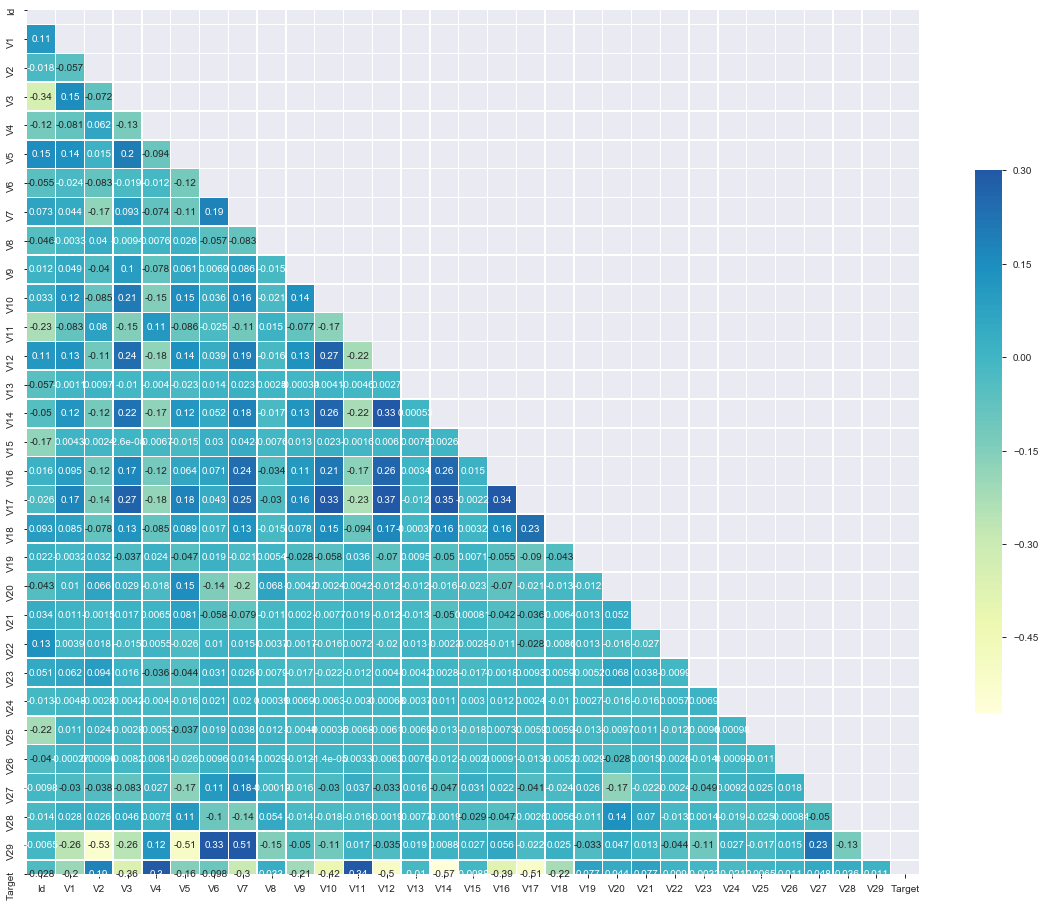

In [16]:
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))

f, ax = plt.subplots(figsize=(20, 20))

sns.heatmap(data.corr(),annot=True, mask=mask, cmap="YlGnBu", vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [17]:
#EDA
#Step-1 Handling Null
data.isnull().sum()

Id           0
V1        2387
V2           0
V3           0
V4           0
V5           0
V6           0
V7           0
V8           0
V9           0
V10          0
V11          0
V12          0
V13          0
V14          0
V15          0
V16          0
V17          0
V18          0
V19          0
V20       2529
V21          0
V22          0
V23          0
V24          0
V25          0
V26          0
V27          0
V28          0
V29          0
Target       0
dtype: int64

In [18]:
null_val=data.isnull().mean()
print("Null values in each Column- \n{} ".format(null_val*100))

Null values in each Column- 
Id         0.000000
V1         9.607180
V2         0.000000
V3         0.000000
V4         0.000000
V5         0.000000
V6         0.000000
V7         0.000000
V8         0.000000
V9         0.000000
V10        0.000000
V11        0.000000
V12        0.000000
V13        0.000000
V14        0.000000
V15        0.000000
V16        0.000000
V17        0.000000
V18        0.000000
V19        0.000000
V20       10.178701
V21        0.000000
V22        0.000000
V23        0.000000
V24        0.000000
V25        0.000000
V26        0.000000
V27        0.000000
V28        0.000000
V29        0.000000
Target     0.000000
dtype: float64 


In [20]:
num_d

['Id',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'Target']

In [5]:
numerical=[var for var in data.columns if data[var].dtype!='object']
mean_median_columns = [var for var in numerical if (data[var].isnull().mean()<0.5
                                                     and data[var].isnull().mean()>0 )]
mean_median_columns

['V1', 'V20']

<Figure size 720x432 with 0 Axes>

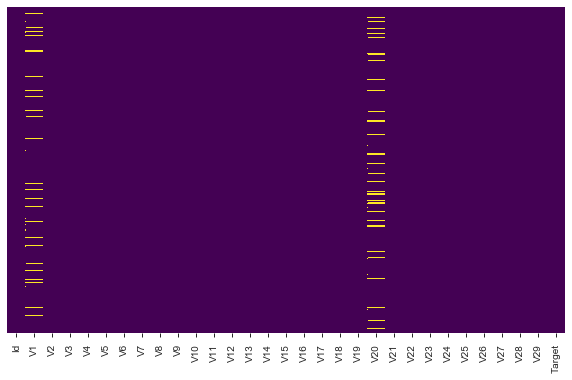

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Since there are 24K rows I have sampled the data for further analysis so that  the time taken for the models to converge  is comparitively reduced.

In order to not lose the imbalanced nature of the data, I have used stratified sampling to hold the true nature of the underlying dataset.

In [6]:
#Stratified Sampling 
def __smpl_size(population, size):
    if size is None:
        cochran_n = round(((1.96)**2 * 0.5 * 0.5)/ 0.02**2)
        n = round(cochran_n/(1+((cochran_n -1) /population)))
    elif size >= 0 and size < 1:
        n = round(population * size)
    elif size < 0:
        raise ValueError('Parameter "size" must be an integer or a proportion between 0 and 0.99.')
    elif size >= 1:
        n = size
    return n

In [7]:
def stratified_sample(data, strata, size=0.4, seed=None, keep_index= True):
    population = len(data)
    size = __smpl_size(population, size)
    tmp = data[strata]
    tmp['size'] = 1
    tmp_grpd = tmp.groupby(strata).count().reset_index()
    tmp_grpd['samp_size'] = round(size/population * tmp_grpd['size']).astype(int) 
    first = True 
    for i in range(len(tmp_grpd)):
            
        qry=''
        for s in range(len(strata)):
            stratum = strata[s]
            value = tmp_grpd.iloc[i][stratum]
            n = tmp_grpd.iloc[i]['samp_size']
            if type(value) == str:
                value = "'" + str(value) + "'"

            if s != len(strata)-1:
                qry = qry + stratum + ' == ' + str(value) +' & '
            else:
                qry = qry + stratum + ' == ' + str(value)

    
        if first:
            stratified_data = data.query(qry).sample(n=n, random_state=seed).reset_index(drop=(not keep_index))
            first = False
        else:
            tmp_df = data.query(qry).sample(n=n, random_state=seed).reset_index(drop=(not keep_index))
            stratified_data = stratified_data.append(tmp_df, ignore_index=True)

    return stratified_data

In [8]:
new_data=stratified_sample(data, strata=['Target'], size=0.50, seed=0, keep_index= True)

C:\Users\tharu\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [9]:
data['Target'].value_counts(1)

0    0.99018
1    0.00982
Name: Target, dtype: float64

In [10]:
new_data['Target'].value_counts(1)

0    0.99018
1    0.00982
Name: Target, dtype: float64

In [11]:
new_data.drop('index',axis=1,inplace=True)

In [23]:
new_data

,Id,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,Target
0,181430,1.975694,0.021927,-2.745461,-0.009484,1.682960,0.269615,0.786686,-0.126381,-0.242461,0.086654,1.080498,1.279576,0.317761,1.028895,-0.079141,-1.557781,0.216604,-1.237485,-0.456716,-0.266313,0.401526,1.445858,-0.249701,-1.534641,0.680188,0.230533,-0.031330,-0.108114,22.40,0
1,214004,-0.746279,1.307767,-0.932529,-1.301177,1.788325,-0.443439,1.823891,-0.606416,-0.312157,0.547727,-0.109886,0.154480,0.281228,0.387435,-0.307140,-0.432273,-1.048101,0.503480,1.275640,0.241799,0.106599,0.640867,-0.572022,-1.317499,0.496131,0.302865,-0.167676,0.073379,20.00,0
2,265432,-0.768709,0.970350,-0.786329,-0.137621,0.098162,-1.433373,0.043637,0.498882,-0.320158,-0.796402,-1.204807,0.366089,0.328930,0.964084,0.500480,-0.093703,-0.172667,0.242501,0.033060,-0.398821,0.465048,1.150086,-0.231419,0.033555,-0.376869,-0.166158,-0.182744,-0.130103,1.00,0
3,263316,-0.916603,1.081797,1.284939,-0.806631,0.403666,0.850452,0.048420,0.702533,-0.460640,-1.117313,0.015822,1.087181,1.188558,0.128099,-0.068820,0.504082,-0.840248,0.751439,1.063084,0.005374,-0.136465,-0.490193,-0.307985,-0.156403,0.467259,-0.416760,-0.051457,0.003449,5.00,0
4,218176,-2.937103,-1.910179,0.061054,-0.462491,-0.080975,0.392879,0.965283,0.090856,0.033459,-0.572347,-0.113745,0.631164,1.095627,-0.087978,0.017372,1.270462,-1.380545,1.000896,0.177673,0.097973,0.118834,0.480551,-0.863133,-0.923597,-0.115910,0.679673,0.480609,-0.837198,450.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12418,167306,-6.677212,5.529299,-7.193275,6.081321,-1.636071,0.500610,-4.640770,-4.339840,-0.950036,0.566680,4.315076,-4.938284,-1.105710,-8.490813,1.003626,-1.949123,-3.093013,0.124087,0.886747,-1.118687,5.563301,-1.608272,0.965322,0.163718,0.047531,0.466165,0.278547,1.471988,105.89,1
12419,141260,-1.927453,1.827621,-7.019495,5.348303,-2.739188,-2.107219,-5.015848,1.205868,-4.382713,-8.337707,7.190306,-9.424844,-0.223293,-12.875494,-0.071918,-6.299961,-12.719207,-3.740176,0.844060,2.172709,1.376938,-0.792017,-0.771414,-0.379574,0.718717,1.111151,1.277707,0.819081,512.25,1
12420,154634,-1.020632,1.496959,-4.490937,1.836727,0.627318,-2.735569,-1.546274,0.459822,-0.682741,-4.363102,4.287021,-5.403768,1.260262,-3.087743,-1.317488,-3.537056,-3.172028,-0.529885,1.011626,0.443489,0.773631,0.860618,-0.304666,-0.155500,0.412166,-0.220080,0.392338,-0.020089,22.04,1
12421,69499,NaN,1.217620,-1.953872,2.087076,-1.144225,-0.576888,-2.582865,0.643230,-1.191233,-3.095094,2.821145,-3.100546,0.146199,-4.510124,0.574490,-2.123463,-6.053319,-0.706376,0.572791,0.380545,0.594623,0.372144,-0.310456,-0.624065,0.840216,-0.159452,0.599482,0.288916,8.00,1


In [12]:
X=new_data.drop(['Target','Id'],axis=1)
y=new_data['Target']
print(X.shape,' ', y.shape)


(12423, 29)   (12423,)


In [13]:
# Splitting the dataset into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)
X_train.shape, y_train.shape

((8323, 29), (8323,))

In [20]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29
3078,-0.793437,-0.698842,1.481213,-0.615538,0.728152,-1.592765,0.108553,-0.241532,0.262550,-0.373866,-0.459899,0.072386,0.214450,-0.215047,0.526052,0.570902,-0.831580,-0.314034,-0.641289,0.300140,0.055554,-0.075685,0.517668,0.411178,-1.456079,0.411206,-0.059457,0.031794,50.61
12205,-0.765488,0.396645,2.663024,0.610562,0.210838,0.607840,0.499500,0.106281,0.689437,-0.940184,-1.127663,1.028368,0.395056,-1.247345,-2.404570,-1.116570,0.379140,-1.377045,-0.363153,-0.044239,-0.356930,-0.473639,-0.113657,0.090041,0.077923,-0.692548,-0.010120,-0.105664,19.77
8128,NaN,0.191702,1.895250,-1.138217,-0.553818,-0.173549,-0.200000,0.251992,1.012020,-1.145244,0.726932,0.629278,-0.737711,0.122395,0.793617,-0.498022,-0.221381,1.137473,1.796124,0.019271,0.131543,0.536038,-0.193396,0.014497,-0.294773,-0.659298,0.222143,0.147472,1.00
9490,2.179976,-0.708383,-1.126098,-0.561384,-0.592812,-1.163817,-0.412659,-0.409562,1.064658,0.393199,-0.076914,-3.299015,1.015109,1.428335,-1.153901,0.642448,1.170881,-1.513343,0.747160,-0.099131,-0.187571,-0.302346,0.212351,-0.185138,-0.108981,-0.359034,-0.066935,-0.066267,33.00
10194,-0.624035,2.653957,-2.746563,1.471427,0.351207,-1.352744,0.040231,0.869615,-0.415495,-0.592643,2.619353,0.625451,-0.052858,-2.898373,0.566678,0.853073,3.229198,1.502950,-0.660113,0.249617,-0.055535,0.023764,0.268171,-0.132736,-0.383014,-0.383578,0.334393,0.060180,0.89


In [108]:
X_train.dtypes

V1     float64
V2     float64
V3     float64
V4     float64
V5     float64
V6     float64
V7     float64
V8     float64
V9     float64
V10    float64
V11    float64
V12    float64
V13    float64
V14    float64
V15    float64
V16    float64
V17    float64
V18    float64
V19    float64
V20    float64
V21    float64
V22    float64
V23    float64
V24    float64
V25    float64
V26    float64
V27    float64
V28    float64
V29    float64
dtype: object

Basic EDA is performed i.e. missing data is median imputed and outliers are capped using winsorizer
a transformer is used to transform the distribution of the variables and scaling is used at the end 

In [14]:
from feature_engine import missing_data_imputers as mdi
from feature_engine.categorical_encoders import OneHotCategoricalEncoder
from feature_engine.categorical_encoders import RareLabelCategoricalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from feature_engine.variable_transformers import PowerTransformer
from feature_engine.variable_transformers import YeoJohnsonTransformer
from feature_engine.discretisers import DecisionTreeDiscretiser
from feature_engine.outlier_removers import Winsorizer
from feature_engine.variable_transformers import BoxCoxTransformer

In [15]:
project_pipe = Pipeline([

    ('imputer_num_mean',
     mdi.MeanMedianImputer(imputation_method='median',variables=mean_median_columns)),

     ('winsorizer', Winsorizer(distribution='skewed', tail='both',fold=5,variables=mean_median_columns)),
     ('yjt', YeoJohnsonTransformer(variables=mean_median_columns)),
     
])

In [16]:
project_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('imputer_num_mean',
                 MeanMedianImputer(imputation_method='median',
                                   variables=['V1', 'V20'])),
                ('winsorizer',
                 Winsorizer(distribution='skewed', fold=5, tail='both',
                            variables=['V1', 'V20'])),
                ('yjt', YeoJohnsonTransformer(variables=['V1', 'V20']))],
         verbose=False)

In [17]:
X_train=project_pipe.transform(X_train)
X_test=project_pipe.transform(X_test)

In [212]:
sample=pd.DataFrame(X_train,columns=X_train.columns)

<Figure size 720x432 with 0 Axes>

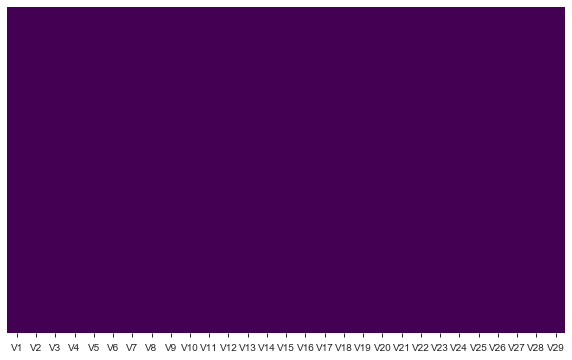

In [213]:
plt.figure(figsize=(10,6))
sns.heatmap(sample.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Figure size 720x432 with 0 Axes>

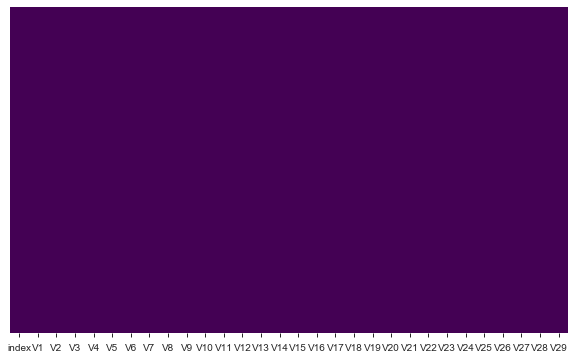

In [27]:
sample_test=pd.DataFrame(X_test,columns=X_test.columns)
plt.figure(figsize=(10,6))
sns.heatmap(sample_test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#Scaling

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

# Naive Algorithms

## Dummy Classifier

In [190]:
# Naive Algorithm 
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

In [191]:
model_naive = DummyClassifier(strategy='stratified',random_state=123)
model_naive.fit(X_train,y_train)
cv_scores = cross_val_score(model_naive, X_train, y_train,scoring='roc_auc')

print("Mean Cross-validation scores: {}".format(cv_scores.mean()))

print("Naive Algorithm's Test Performance: ", model_naive.score(X_test,y_test))

DummyClassifier(constant=None, random_state=123, strategy='stratified')

Mean Cross-validation scores: 0.5086495655056131
Naive Algorithm's Test Performance:  0.9790716393882479


## Logistic Regression

In [31]:
from sklearn.metrics import fbeta_score, make_scorer

f2 = make_scorer(fbeta_score, beta=2)

In [35]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
c=np.logspace(-3,2,10)


param_grid = {'C': c,'solver':['liblinear']}

logreg=LogisticRegression()

grid_logit = GridSearchCV(logreg, param_grid, cv=10,scoring=f2)
grid_logit.fit(X_train,y_train)

print("Logistic Regression Parameters: {}".format( grid_logit.best_params_)) 
print("Best Mean Cross Validation score is {}".format(grid_logit.best_score_))
print("Best estimator is {}".format(grid_logit.best_estimator_))


print("Logistic Test Performance: ", grid_logit.score(X_test,y_test))
print("Logistic Train Performance: ", grid_logit.score(X_train,y_train ))


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-03, 3.59381366e-03, 1.29154967e-02, 4.64158883e-02,
       1.66810054e-01, 5.99484250e-01, 2.15443469e+00, 7.74263683e+00,
       2.78255940e+01, 1.00000000e+02]),
                         'solver': ['liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
           

Logistic Regression Parameters: {'C': 0.001, 'solver': 'liblinear'}
Best Mean Cross Validation score is 0.7618977194477751
Best estimator is LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Logistic Test Performance:  0.8646616541353384
Logistic Train Performance:  0.7788161993769471


## KNeighbors Classifier

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

param_knn = {'n_neighbors': range(1,5)}

grid_knn = GridSearchCV(knn, param_knn, cv=5, return_train_score=True,scoring=f2)
grid_knn.fit(X_train, y_train)

print("Best Mean Cross-validation score: {:.2f}".format(grid_knn.best_score_))
print()

print('KNN parameters: ', grid_knn.best_params_)

print("KNN Test Performance: ", grid_knn.score(X_test,y_test))
print("KNN Train Performance: ", grid_knn.score(X_train,y_train))

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 5)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=True,
             scoring=make_scorer(fbeta_score, beta=2), verbose=0)

Best Mean Cross-validation score: 0.72

KNN parameters:  {'n_neighbors': 3}
KNN Test Performance:  0.9183673469387754
KNN Train Performance:  0.7703488372093023


## Decision Tree Classifier

In [34]:
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

param_dtree = {'max_depth': range(1,20),'criterion':['gini','entropy'],'splitter':['random']}


grid_dtree = GridSearchCV(dtree, param_dtree, cv=10, return_train_score = True,scoring=f2)
grid_dtree.fit(X_train, y_train)

print("Best Mean Cross-validation score: {:.5f}".format(grid_dtree.best_score_))
print()


print('Decision Tree parameters: ', grid_dtree.best_params_)


print("Decision Tree Test Performance: ", grid_dtree.score(X_test,y_test))
print("Decision Tree Train Performance: ", grid_dtree.score(X_train,y_train))

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20), 'splitter': ['r

Best Mean Cross-validation score: 0.79453

Decision Tree parameters:  {'criterion': 'entropy', 'max_depth': 7, 'splitter': 'random'}
Decision Tree Test Performance:  0.830188679245283
Decision Tree Train Performance:  0.8359133126934986


## SVC using RBF Kernel

In [196]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc=SVC()
param_grid = [{'kernel': ['rbf'],
               'C': np.logspace(-3,3,5),
               'gamma': np.logspace(-3,3,5)}]
grid_svc_r = GridSearchCV(svc, param_grid, cv=10,
                          return_train_score=True,scoring=f2)
grid_svc_r.fit(X_train, y_train)
print('train score: ', grid_svc_r.score(X_train, y_train))
print('test score: ', grid_svc_r.score(X_test, y_test))
print("Best parameters: {}".format(grid_svc_r.best_params_))
print("Best cross-validation score: {:.5f}".format(grid_svc_r.best_score_))

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                          'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=make_scorer(fbeta_score, beta=2), verbose=0)

train score:  0.792507204610951
test score:  0.8847736625514402
Best parameters: {'C': 1.0, 'gamma': 0.001, 'kernel': 'rbf'}
Best cross-validation score: 0.75475


## SVC using Sigmoid Kernel

In [197]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc=SVC()
param_grid = [{'kernel': ['sigmoid'],
               'C': np.logspace(-3,3,5),
               'gamma': np.logspace(-3,3,5)}]
grid_svc = GridSearchCV(svc, param_grid, cv=3,
                          return_train_score=True,scoring=f2)
grid_svc.fit(X_train, y_train)
print('train score: ', grid_svc.score(X_train, y_train))
print('test score: ', grid_svc.score(X_test, y_test))
print("Best parameters: {}".format(grid_svc.best_params_))
print("Best cross-validation score: {:.5f}".format(grid_svc.best_score_))
              

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                          'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                          'kernel': ['sigmoid']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=make_scorer(fbeta_score, beta=2), verbose=0)

train score:  0.6638418079096045
test score:  0.7644628099173555
Best parameters: {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Best cross-validation score: 0.73071


## SVC using Poly Kernel

In [198]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc=SVC()
param_grid = [{'kernel': ['poly'],
               'degree':[1,2] }]
grid_svc_p = GridSearchCV(svc, param_grid, cv=3,
                          return_train_score=True,scoring=f2)
grid_svc_p.fit(X_train, y_train)
print('train score: ', grid_svc_p.score(X_train, y_train))
print('test score: ', grid_svc_p.score(X_test, y_test))
print("Best parameters: {}".format(grid_svc_p.best_params_))
print("Best cross-validation score: {:.5f}".format(grid_svc_p.best_score_))

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'degree': [1, 2], 'kernel': ['poly']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=make_scorer(fbeta_score, beta=2), verbose=0)

train score:  0.792507204610951
test score:  0.8847736625514402
Best parameters: {'degree': 1, 'kernel': 'poly'}
Best cross-validation score: 0.77869


## Random Forest Classifier

In [199]:
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier(random_state=42)
rfc_param = { 
    'n_estimators': [500],
    'max_features': ['auto'],
    'max_depth' : [7,8,10],
    'criterion' :['entropy']
}

rfc_grid = GridSearchCV(rfc, rfc_param,cv=5, return_train_score=True,scoring=f2 )
rfc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [39]:
print(f'Best Mean Cross Validation Score is {rfc_grid.best_score_}')
print(f'Best Parameters are {rfc_grid.best_params_}')
print(f'Train score is {rfc_grid.score(X_train,y_train)}')
print(f'Test score is {rfc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.7766760445709278
Best Parameters are {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 500}
Train score is 0.8385093167701863
Test score is 0.8955223880597014


## Extra Tree Classifier

In [201]:
from  sklearn.ensemble import ExtraTreesClassifier
etc= ExtraTreesClassifier(random_state=42)
etc_param = { 
    'n_estimators': [200],
    'max_features': ['auto'],
    'max_depth' : [10,11,12],
    'criterion' :['gini']
}
etc_grid = GridSearchCV(etc, etc_param,cv=5, return_train_score=True,scoring=f2 )
etc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            oob_score=False, random_state=42,
                                            verbose=0, warm_start=False),
             iid='deprecated'

In [45]:
print(f'Best Mean Cross Validation Score is {etc_grid.best_score_}')
print(f'Best Parameters are {etc_grid.best_params_}')
print(f'Train score is {etc_grid.score(X_train,y_train)}')
print(f'Test score is {etc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.7497392834950747
Best Parameters are {'criterion': 'gini', 'max_depth': 11, 'max_features': 'auto', 'n_estimators': 200}
Train score is 0.8255451713395638
Test score is 0.8646616541353384


##  AdaBoostClassifier 

In [58]:
from sklearn.ensemble import AdaBoostClassifier
adc_dtree =AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),random_state=42)
adc_dtree_param = {
              'base_estimator__criterion' : ["gini"],
              'base_estimator__splitter' :   ["best"],
              'base_estimator__max_depth' : [9,11],
              'n_estimators' : [100,150],
              'learning_rate' : [0.5,1.0,2],
             }
adc_dtree_grid = GridSearchCV(adc_dtree, adc_dtree_param,cv=5, return_train_score=True,scoring=f2 )
adc_dtree_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
 

In [204]:
print(f'Best Mean Cross Validation Score is {adc_dtree_grid.best_score_}')
print(f'Parameters are {adc_dtree_grid.best_params_}')
print(f'Train score is {adc_dtree_grid.score(X_train,y_train)}')
print(f'Test score is {adc_dtree_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.817200639735851
Parameters are {'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 9, 'base_estimator__splitter': 'best', 'learning_rate': 1.0, 'n_estimators': 150}
Train score is 1.0
Test score is 0.8847736625514402


## Gradient Boosting Classifier

In [205]:
from  sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier()
gbc_param = {
              'max_depth' : [2,3,4],
              'n_estimators' : [100,150],
              'learning_rate' : [0.5,1.0,2],
             }
gbc_grid = GridSearchCV(gbc, gbc_param,cv=5, return_train_score=True,scoring=f2 )
gbc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [206]:
print(f'Best Mean Cross Validation Score is {gbc_grid.best_score_}')
print(f'Best Parameters are {gbc_grid.best_params_}')
print(f'Train score is {gbc_grid.score(X_train,y_train)}')
print(f'Test score is {gbc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.7570005010298948
Best Parameters are {'learning_rate': 2, 'max_depth': 2, 'n_estimators': 100}
Train score is 0.8096590909090908
Test score is 0.8704453441295547


In [ ]:
pip install xgboost

## XG BOOST

In [207]:
from  xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
xgbc= XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic')
xgbc_param = {
              'max_depth' : [2,3,4],
              'n_estimators' : [50,100,150],
              'learning_rate' : [0.1,0.2,0.5],
               'min_child_weight' : [3,4,5],
                'subsample':[0.6,0.7,0.8]
             }
xgbc_grid = GridSearchCV(xgbc, xgbc_param,cv=5, return_train_score=True,scoring=f2 )
xgbc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=2, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_...
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     verbosity=None),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.

In [208]:
print(f'Best Mean Cross Validation Score is {xgbc_grid.best_score_}')
print(f'Best Parameters are {xgbc_grid.best_params_}')
print(f'Train score is {xgbc_grid.score(X_train,y_train)}')
print(f'Test score is {xgbc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.756473960821787
Best Parameters are {'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 50, 'subsample': 0.7}
Train score is 0.8189655172413792
Test score is 0.9183673469387754


## Randomized Search CV

In [71]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

param_dtree = {'max_depth': range(1,10),'criterion':['gini','entropy'],'splitter':['random']}


grid_dtree = RandomizedSearchCV(dtree, param_dtree, cv=10, return_train_score = True,scoring=f2)
grid_dtree.fit(X_train, y_train)

print("Best Mean Cross-validation score: {:.5f}".format(grid_dtree.best_score_))
print()


print('Decision Tree parameters: ', grid_dtree.best_params_)


print("Decision Tree Test Performance: ", grid_dtree.score(X_test,y_test))
print("Decision Tree Train Performance: ", grid_dtree.score(X_train,y_train))

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=0,
            

Best Mean Cross-validation score: 0.78049

Decision Tree parameters:  {'splitter': 'random', 'max_depth': 8, 'criterion': 'gini'}
Decision Tree Test Performance:  0.8426966292134833
Decision Tree Train Performance:  0.8125000000000001


In [72]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score
c=np.logspace(-3,2,10)
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'C': c,'solver':['liblinear']}

logreg=LogisticRegression()

grid_logit = RandomizedSearchCV(logreg, param_grid, cv=10,scoring=f2)
grid_logit.fit(X_train,y_train)

print("Logistic Regression Parameters: {}".format( grid_logit.best_params_)) 
print("Best Mean Cross Validation score is {}".format(grid_logit.best_score_))
print("Best estimator is {}".format(grid_logit.best_estimator_))


print("Logistic Test Performance: ", grid_logit.score(X_test,y_test))
print("Logistic Train Performance: ", grid_logit.score(X_train,y_train ))

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': array([1.00000000e-03, 3.59381366e-03, 1.29154967e-02, 4.64158883e-02,
       1.66810054e-01, 5.99484250e-01, 2.15443469e+00, 7.74263683e+00,
       2.78255940e+01, 1.00000000e+02]),
                                        'solver': ['

Logistic Regression Parameters: {'solver': 'liblinear', 'C': 0.001}
Best Mean Cross Validation score is 0.7618977194477751
Best estimator is LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
Logistic Test Performance:  0.8646616541353384
Logistic Train Performance:  0.7788161993769471


In [75]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
svc=SVC()
param_grid = [{'kernel': ['poly'],
               'degree':[1,2] }]
grid_svc_p = RandomizedSearchCV(svc, param_grid, cv=10,
                          return_train_score=True,scoring=f2,n_iter=2)
grid_svc_p.fit(X_train, y_train)
print('train score: ', grid_svc_p.score(X_train, y_train))
print('test score: ', grid_svc_p.score(X_test, y_test))
print("Best parameters: {}".format(grid_svc_p.best_params_))
print("Best cross-validation score: {:.5f}".format(grid_svc_p.best_score_))

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=2, n_jobs=None,
                   param_distributions=[{'degree': [1, 2], 'kernel': ['poly']}],
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True,
                   scoring=make_scorer(fbeta_score, beta=2), verbose=0)

train score:  0.8024691358024691
test score:  0.8646616541353384
Best parameters: {'kernel': 'poly', 'degree': 1}
Best cross-validation score: 0.80003


In [91]:
pip install catboost

  Created wheel for retrying: filename=retrying-1.3.3-cp37-none-any.whl size=11435 sha256=56055f54e1159058fc171296419de14e15c1b354b1be158c162ea1490a3a3b4e
  Stored in directory: C:\Users\tharu\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


## Catboost

In [94]:
from catboost import CatBoostClassifier
cbc= CatBoostClassifier()
from sklearn.model_selection import GridSearchCV

cbc_param = {
              'iterations' : [500,350,250],
              'learning_rate' : [0.01,0.02], }
cbc_grid = GridSearchCV(cbc, cbc_param,cv=10, return_train_score=True,scoring=f2 )
cbc_grid.fit(X_train,y_train)

0:	learn: 0.6637813	total: 7.08ms	remaining: 3.53s
1:	learn: 0.6357122	total: 12.9ms	remaining: 3.2s
2:	learn: 0.6104291	total: 18.9ms	remaining: 3.13s
3:	learn: 0.5851471	total: 25.3ms	remaining: 3.13s
4:	learn: 0.5642202	total: 31.3ms	remaining: 3.1s
5:	learn: 0.5424706	total: 36.5ms	remaining: 3s
6:	learn: 0.5202766	total: 42.9ms	remaining: 3.02s
7:	learn: 0.4992969	total: 49.6ms	remaining: 3.05s
8:	learn: 0.4782340	total: 55.5ms	remaining: 3.02s
9:	learn: 0.4586774	total: 62ms	remaining: 3.04s
10:	learn: 0.4395916	total: 68.3ms	remaining: 3.04s
11:	learn: 0.4220950	total: 74.6ms	remaining: 3.03s
12:	learn: 0.4061163	total: 81.1ms	remaining: 3.04s
13:	learn: 0.3880101	total: 87.1ms	remaining: 3.02s
14:	learn: 0.3708889	total: 93ms	remaining: 3s
15:	learn: 0.3536949	total: 99.5ms	remaining: 3.01s
16:	learn: 0.3387062	total: 106ms	remaining: 3s
17:	learn: 0.3233449	total: 112ms	remaining: 2.99s
18:	learn: 0.3106701	total: 118ms	remaining: 2.98s
19:	learn: 0.2988803	total: 125ms	remain

169:	learn: 0.0112813	total: 1.24s	remaining: 2.41s
170:	learn: 0.0112340	total: 1.25s	remaining: 2.4s
171:	learn: 0.0111730	total: 1.26s	remaining: 2.4s
172:	learn: 0.0111116	total: 1.26s	remaining: 2.39s
173:	learn: 0.0110300	total: 1.27s	remaining: 2.38s
174:	learn: 0.0109686	total: 1.28s	remaining: 2.38s
175:	learn: 0.0108840	total: 1.29s	remaining: 2.38s
176:	learn: 0.0108191	total: 1.3s	remaining: 2.37s
177:	learn: 0.0107636	total: 1.3s	remaining: 2.36s
178:	learn: 0.0107041	total: 1.31s	remaining: 2.35s
179:	learn: 0.0106532	total: 1.32s	remaining: 2.34s
180:	learn: 0.0106050	total: 1.33s	remaining: 2.34s
181:	learn: 0.0105484	total: 1.34s	remaining: 2.34s
182:	learn: 0.0104976	total: 1.35s	remaining: 2.34s
183:	learn: 0.0104503	total: 1.36s	remaining: 2.33s
184:	learn: 0.0104221	total: 1.37s	remaining: 2.33s
185:	learn: 0.0103841	total: 1.37s	remaining: 2.32s
186:	learn: 0.0103286	total: 1.38s	remaining: 2.31s
187:	learn: 0.0102774	total: 1.39s	remaining: 2.3s
188:	learn: 0.010

347:	learn: 0.0068231	total: 2.83s	remaining: 1.24s
348:	learn: 0.0068163	total: 2.84s	remaining: 1.23s
349:	learn: 0.0068046	total: 2.85s	remaining: 1.22s
350:	learn: 0.0067821	total: 2.85s	remaining: 1.21s
351:	learn: 0.0067752	total: 2.86s	remaining: 1.2s
352:	learn: 0.0067680	total: 2.88s	remaining: 1.2s
353:	learn: 0.0067501	total: 2.89s	remaining: 1.19s
354:	learn: 0.0067384	total: 2.9s	remaining: 1.19s
355:	learn: 0.0067190	total: 2.92s	remaining: 1.18s
356:	learn: 0.0067011	total: 2.93s	remaining: 1.17s
357:	learn: 0.0066891	total: 2.94s	remaining: 1.17s
358:	learn: 0.0066832	total: 2.95s	remaining: 1.16s
359:	learn: 0.0066737	total: 2.96s	remaining: 1.15s
360:	learn: 0.0066505	total: 2.96s	remaining: 1.14s
361:	learn: 0.0066318	total: 2.97s	remaining: 1.13s
362:	learn: 0.0066178	total: 2.98s	remaining: 1.13s
363:	learn: 0.0066065	total: 2.99s	remaining: 1.12s
364:	learn: 0.0065952	total: 3s	remaining: 1.11s
365:	learn: 0.0065824	total: 3.01s	remaining: 1.1s
366:	learn: 0.00657

8:	learn: 0.4774211	total: 59ms	remaining: 3.22s
9:	learn: 0.4579385	total: 66.9ms	remaining: 3.28s
10:	learn: 0.4387770	total: 74.3ms	remaining: 3.3s
11:	learn: 0.4207969	total: 80.7ms	remaining: 3.28s
12:	learn: 0.4047911	total: 86.8ms	remaining: 3.25s
13:	learn: 0.3864779	total: 93.4ms	remaining: 3.24s
14:	learn: 0.3697456	total: 99.9ms	remaining: 3.23s
15:	learn: 0.3515941	total: 107ms	remaining: 3.24s
16:	learn: 0.3360862	total: 113ms	remaining: 3.22s
17:	learn: 0.3217402	total: 120ms	remaining: 3.22s
18:	learn: 0.3090062	total: 128ms	remaining: 3.25s
19:	learn: 0.2974430	total: 135ms	remaining: 3.25s
20:	learn: 0.2841786	total: 143ms	remaining: 3.26s
21:	learn: 0.2729016	total: 149ms	remaining: 3.23s
22:	learn: 0.2622473	total: 156ms	remaining: 3.23s
23:	learn: 0.2499816	total: 162ms	remaining: 3.22s
24:	learn: 0.2391338	total: 169ms	remaining: 3.21s
25:	learn: 0.2285295	total: 176ms	remaining: 3.21s
26:	learn: 0.2188993	total: 182ms	remaining: 3.19s
27:	learn: 0.2104399	total: 1

176:	learn: 0.0089085	total: 1.29s	remaining: 2.36s
177:	learn: 0.0088378	total: 1.3s	remaining: 2.35s
178:	learn: 0.0087708	total: 1.31s	remaining: 2.34s
179:	learn: 0.0087123	total: 1.31s	remaining: 2.33s
180:	learn: 0.0086352	total: 1.32s	remaining: 2.33s
181:	learn: 0.0085883	total: 1.33s	remaining: 2.32s
182:	learn: 0.0085339	total: 1.34s	remaining: 2.32s
183:	learn: 0.0084759	total: 1.35s	remaining: 2.31s
184:	learn: 0.0084346	total: 1.36s	remaining: 2.31s
185:	learn: 0.0084074	total: 1.37s	remaining: 2.31s
186:	learn: 0.0083544	total: 1.38s	remaining: 2.31s
187:	learn: 0.0082956	total: 1.39s	remaining: 2.3s
188:	learn: 0.0082464	total: 1.4s	remaining: 2.3s
189:	learn: 0.0081937	total: 1.41s	remaining: 2.29s
190:	learn: 0.0081361	total: 1.41s	remaining: 2.29s
191:	learn: 0.0081147	total: 1.42s	remaining: 2.28s
192:	learn: 0.0080636	total: 1.43s	remaining: 2.27s
193:	learn: 0.0080123	total: 1.44s	remaining: 2.27s
194:	learn: 0.0079835	total: 1.45s	remaining: 2.26s
195:	learn: 0.00

337:	learn: 0.0049821	total: 2.71s	remaining: 1.3s
338:	learn: 0.0049720	total: 2.72s	remaining: 1.29s
339:	learn: 0.0049573	total: 2.73s	remaining: 1.29s
340:	learn: 0.0049504	total: 2.74s	remaining: 1.28s
341:	learn: 0.0049344	total: 2.75s	remaining: 1.27s
342:	learn: 0.0049290	total: 2.76s	remaining: 1.26s
343:	learn: 0.0049213	total: 2.77s	remaining: 1.25s
344:	learn: 0.0049039	total: 2.77s	remaining: 1.25s
345:	learn: 0.0048793	total: 2.78s	remaining: 1.24s
346:	learn: 0.0048743	total: 2.79s	remaining: 1.23s
347:	learn: 0.0048668	total: 2.8s	remaining: 1.22s
348:	learn: 0.0048542	total: 2.81s	remaining: 1.22s
349:	learn: 0.0048450	total: 2.82s	remaining: 1.21s
350:	learn: 0.0048268	total: 2.83s	remaining: 1.2s
351:	learn: 0.0048143	total: 2.83s	remaining: 1.19s
352:	learn: 0.0048039	total: 2.84s	remaining: 1.18s
353:	learn: 0.0047933	total: 2.85s	remaining: 1.18s
354:	learn: 0.0047867	total: 2.86s	remaining: 1.17s
355:	learn: 0.0047801	total: 2.87s	remaining: 1.16s
356:	learn: 0.0

0:	learn: 0.6651597	total: 19.8ms	remaining: 9.88s
1:	learn: 0.6380123	total: 28.6ms	remaining: 7.11s
2:	learn: 0.6130350	total: 37.2ms	remaining: 6.17s
3:	learn: 0.5882988	total: 46.6ms	remaining: 5.78s
4:	learn: 0.5675751	total: 54.7ms	remaining: 5.41s
5:	learn: 0.5459786	total: 62.5ms	remaining: 5.15s
6:	learn: 0.5256072	total: 71.1ms	remaining: 5.01s
7:	learn: 0.5062102	total: 78.3ms	remaining: 4.82s
8:	learn: 0.4854823	total: 85.9ms	remaining: 4.69s
9:	learn: 0.4663518	total: 93.8ms	remaining: 4.59s
10:	learn: 0.4471660	total: 101ms	remaining: 4.49s
11:	learn: 0.4292607	total: 109ms	remaining: 4.44s
12:	learn: 0.4132756	total: 117ms	remaining: 4.37s
13:	learn: 0.3962812	total: 124ms	remaining: 4.31s
14:	learn: 0.3803554	total: 132ms	remaining: 4.26s
15:	learn: 0.3626818	total: 139ms	remaining: 4.22s
16:	learn: 0.3477230	total: 146ms	remaining: 4.16s
17:	learn: 0.3333831	total: 154ms	remaining: 4.11s
18:	learn: 0.3207423	total: 160ms	remaining: 4.05s
19:	learn: 0.3089537	total: 166

171:	learn: 0.0136533	total: 1.45s	remaining: 2.76s
172:	learn: 0.0135925	total: 1.45s	remaining: 2.75s
173:	learn: 0.0135336	total: 1.46s	remaining: 2.74s
174:	learn: 0.0134717	total: 1.47s	remaining: 2.74s
175:	learn: 0.0134190	total: 1.48s	remaining: 2.73s
176:	learn: 0.0133527	total: 1.49s	remaining: 2.72s
177:	learn: 0.0132668	total: 1.5s	remaining: 2.71s
178:	learn: 0.0131874	total: 1.51s	remaining: 2.71s
179:	learn: 0.0131087	total: 1.52s	remaining: 2.7s
180:	learn: 0.0130620	total: 1.53s	remaining: 2.69s
181:	learn: 0.0130094	total: 1.54s	remaining: 2.69s
182:	learn: 0.0129300	total: 1.55s	remaining: 2.68s
183:	learn: 0.0128662	total: 1.56s	remaining: 2.67s
184:	learn: 0.0128183	total: 1.57s	remaining: 2.67s
185:	learn: 0.0127556	total: 1.57s	remaining: 2.66s
186:	learn: 0.0126963	total: 1.58s	remaining: 2.65s
187:	learn: 0.0126300	total: 1.59s	remaining: 2.65s
188:	learn: 0.0125780	total: 1.61s	remaining: 2.65s
189:	learn: 0.0124929	total: 1.63s	remaining: 2.66s
190:	learn: 0.

350:	learn: 0.0078837	total: 3.04s	remaining: 1.29s
351:	learn: 0.0078618	total: 3.04s	remaining: 1.28s
352:	learn: 0.0078326	total: 3.06s	remaining: 1.27s
353:	learn: 0.0078171	total: 3.06s	remaining: 1.26s
354:	learn: 0.0078035	total: 3.07s	remaining: 1.25s
355:	learn: 0.0077801	total: 3.08s	remaining: 1.25s
356:	learn: 0.0077594	total: 3.09s	remaining: 1.24s
357:	learn: 0.0077437	total: 3.1s	remaining: 1.23s
358:	learn: 0.0077377	total: 3.11s	remaining: 1.22s
359:	learn: 0.0077246	total: 3.12s	remaining: 1.21s
360:	learn: 0.0077075	total: 3.12s	remaining: 1.2s
361:	learn: 0.0076969	total: 3.13s	remaining: 1.19s
362:	learn: 0.0076794	total: 3.14s	remaining: 1.18s
363:	learn: 0.0076627	total: 3.15s	remaining: 1.18s
364:	learn: 0.0076400	total: 3.16s	remaining: 1.17s
365:	learn: 0.0076267	total: 3.17s	remaining: 1.16s
366:	learn: 0.0076044	total: 3.18s	remaining: 1.15s
367:	learn: 0.0075849	total: 3.19s	remaining: 1.14s
368:	learn: 0.0075776	total: 3.19s	remaining: 1.13s
369:	learn: 0.

21:	learn: 0.2833895	total: 208ms	remaining: 4.53s
22:	learn: 0.2726294	total: 219ms	remaining: 4.54s
23:	learn: 0.2617671	total: 228ms	remaining: 4.52s
24:	learn: 0.2514609	total: 236ms	remaining: 4.48s
25:	learn: 0.2407071	total: 244ms	remaining: 4.45s
26:	learn: 0.2310882	total: 253ms	remaining: 4.44s
27:	learn: 0.2222193	total: 263ms	remaining: 4.43s
28:	learn: 0.2130671	total: 273ms	remaining: 4.42s
29:	learn: 0.2049048	total: 282ms	remaining: 4.41s
30:	learn: 0.1962634	total: 292ms	remaining: 4.41s
31:	learn: 0.1897816	total: 305ms	remaining: 4.46s
32:	learn: 0.1820691	total: 315ms	remaining: 4.46s
33:	learn: 0.1751653	total: 324ms	remaining: 4.43s
34:	learn: 0.1687566	total: 335ms	remaining: 4.45s
35:	learn: 0.1621845	total: 344ms	remaining: 4.43s
36:	learn: 0.1566808	total: 353ms	remaining: 4.41s
37:	learn: 0.1509892	total: 361ms	remaining: 4.39s
38:	learn: 0.1451448	total: 373ms	remaining: 4.41s
39:	learn: 0.1403045	total: 381ms	remaining: 4.38s
40:	learn: 0.1348563	total: 389

190:	learn: 0.0126842	total: 1.79s	remaining: 2.9s
191:	learn: 0.0126426	total: 1.8s	remaining: 2.89s
192:	learn: 0.0125870	total: 1.81s	remaining: 2.88s
193:	learn: 0.0125532	total: 1.82s	remaining: 2.87s
194:	learn: 0.0125212	total: 1.83s	remaining: 2.86s
195:	learn: 0.0124761	total: 1.84s	remaining: 2.85s
196:	learn: 0.0124377	total: 1.84s	remaining: 2.83s
197:	learn: 0.0123923	total: 1.85s	remaining: 2.82s
198:	learn: 0.0123594	total: 1.86s	remaining: 2.81s
199:	learn: 0.0122941	total: 1.87s	remaining: 2.8s
200:	learn: 0.0122423	total: 1.88s	remaining: 2.79s
201:	learn: 0.0122064	total: 1.88s	remaining: 2.78s
202:	learn: 0.0121646	total: 1.89s	remaining: 2.77s
203:	learn: 0.0121230	total: 1.9s	remaining: 2.76s
204:	learn: 0.0120769	total: 1.91s	remaining: 2.75s
205:	learn: 0.0120319	total: 1.92s	remaining: 2.73s
206:	learn: 0.0119855	total: 1.92s	remaining: 2.72s
207:	learn: 0.0119518	total: 1.93s	remaining: 2.71s
208:	learn: 0.0119093	total: 1.94s	remaining: 2.7s
209:	learn: 0.011

366:	learn: 0.0086298	total: 3.4s	remaining: 1.23s
367:	learn: 0.0086064	total: 3.41s	remaining: 1.22s
368:	learn: 0.0085919	total: 3.42s	remaining: 1.21s
369:	learn: 0.0085756	total: 3.43s	remaining: 1.2s
370:	learn: 0.0085602	total: 3.44s	remaining: 1.2s
371:	learn: 0.0085316	total: 3.45s	remaining: 1.19s
372:	learn: 0.0085238	total: 3.46s	remaining: 1.18s
373:	learn: 0.0085111	total: 3.46s	remaining: 1.17s
374:	learn: 0.0085053	total: 3.47s	remaining: 1.16s
375:	learn: 0.0084837	total: 3.49s	remaining: 1.15s
376:	learn: 0.0084640	total: 3.5s	remaining: 1.14s
377:	learn: 0.0084525	total: 3.5s	remaining: 1.13s
378:	learn: 0.0084137	total: 3.52s	remaining: 1.12s
379:	learn: 0.0084094	total: 3.52s	remaining: 1.11s
380:	learn: 0.0083974	total: 3.53s	remaining: 1.1s
381:	learn: 0.0083864	total: 3.54s	remaining: 1.09s
382:	learn: 0.0083623	total: 3.55s	remaining: 1.08s
383:	learn: 0.0083502	total: 3.56s	remaining: 1.07s
384:	learn: 0.0083392	total: 3.57s	remaining: 1.07s
385:	learn: 0.0083

43:	learn: 0.1170695	total: 369ms	remaining: 3.82s
44:	learn: 0.1130147	total: 378ms	remaining: 3.82s
45:	learn: 0.1088871	total: 386ms	remaining: 3.81s
46:	learn: 0.1049013	total: 393ms	remaining: 3.79s
47:	learn: 0.1014545	total: 401ms	remaining: 3.78s
48:	learn: 0.0983391	total: 409ms	remaining: 3.77s
49:	learn: 0.0949180	total: 418ms	remaining: 3.76s
50:	learn: 0.0915009	total: 426ms	remaining: 3.75s
51:	learn: 0.0887144	total: 436ms	remaining: 3.75s
52:	learn: 0.0859283	total: 442ms	remaining: 3.73s
53:	learn: 0.0831356	total: 451ms	remaining: 3.72s
54:	learn: 0.0806016	total: 460ms	remaining: 3.72s
55:	learn: 0.0781370	total: 470ms	remaining: 3.73s
56:	learn: 0.0756764	total: 479ms	remaining: 3.72s
57:	learn: 0.0734774	total: 486ms	remaining: 3.71s
58:	learn: 0.0712908	total: 495ms	remaining: 3.7s
59:	learn: 0.0692038	total: 506ms	remaining: 3.71s
60:	learn: 0.0672486	total: 515ms	remaining: 3.71s
61:	learn: 0.0651245	total: 524ms	remaining: 3.7s
62:	learn: 0.0631590	total: 532ms

215:	learn: 0.0108851	total: 1.97s	remaining: 2.59s
216:	learn: 0.0108406	total: 1.98s	remaining: 2.58s
217:	learn: 0.0107813	total: 1.99s	remaining: 2.57s
218:	learn: 0.0107306	total: 2s	remaining: 2.56s
219:	learn: 0.0106938	total: 2.01s	remaining: 2.56s
220:	learn: 0.0106505	total: 2.02s	remaining: 2.55s
221:	learn: 0.0106226	total: 2.03s	remaining: 2.54s
222:	learn: 0.0105828	total: 2.04s	remaining: 2.53s
223:	learn: 0.0105530	total: 2.05s	remaining: 2.52s
224:	learn: 0.0105332	total: 2.06s	remaining: 2.51s
225:	learn: 0.0104932	total: 2.06s	remaining: 2.5s
226:	learn: 0.0104471	total: 2.07s	remaining: 2.49s
227:	learn: 0.0104113	total: 2.08s	remaining: 2.49s
228:	learn: 0.0103834	total: 2.09s	remaining: 2.48s
229:	learn: 0.0103527	total: 2.1s	remaining: 2.47s
230:	learn: 0.0103014	total: 2.11s	remaining: 2.46s
231:	learn: 0.0102711	total: 2.12s	remaining: 2.45s
232:	learn: 0.0102231	total: 2.13s	remaining: 2.44s
233:	learn: 0.0101925	total: 2.14s	remaining: 2.43s
234:	learn: 0.010

375:	learn: 0.0071775	total: 3.57s	remaining: 1.18s
376:	learn: 0.0071503	total: 3.58s	remaining: 1.17s
377:	learn: 0.0071379	total: 3.59s	remaining: 1.16s
378:	learn: 0.0071084	total: 3.6s	remaining: 1.15s
379:	learn: 0.0070915	total: 3.61s	remaining: 1.14s
380:	learn: 0.0070873	total: 3.63s	remaining: 1.13s
381:	learn: 0.0070776	total: 3.63s	remaining: 1.12s
382:	learn: 0.0070629	total: 3.64s	remaining: 1.11s
383:	learn: 0.0070470	total: 3.66s	remaining: 1.1s
384:	learn: 0.0070406	total: 3.67s	remaining: 1.09s
385:	learn: 0.0070300	total: 3.67s	remaining: 1.08s
386:	learn: 0.0070027	total: 3.68s	remaining: 1.07s
387:	learn: 0.0069868	total: 3.69s	remaining: 1.06s
388:	learn: 0.0069745	total: 3.7s	remaining: 1.06s
389:	learn: 0.0069614	total: 3.71s	remaining: 1.05s
390:	learn: 0.0069468	total: 3.72s	remaining: 1.04s
391:	learn: 0.0069272	total: 3.73s	remaining: 1.03s
392:	learn: 0.0069127	total: 3.74s	remaining: 1.02s
393:	learn: 0.0068954	total: 3.75s	remaining: 1.01s
394:	learn: 0.0

38:	learn: 0.0403021	total: 389ms	remaining: 4.6s
39:	learn: 0.0382785	total: 398ms	remaining: 4.58s
40:	learn: 0.0361014	total: 407ms	remaining: 4.56s
41:	learn: 0.0345088	total: 416ms	remaining: 4.54s
42:	learn: 0.0327720	total: 425ms	remaining: 4.51s
43:	learn: 0.0313261	total: 435ms	remaining: 4.51s
44:	learn: 0.0298761	total: 444ms	remaining: 4.49s
45:	learn: 0.0286598	total: 455ms	remaining: 4.49s
46:	learn: 0.0276488	total: 466ms	remaining: 4.49s
47:	learn: 0.0265636	total: 476ms	remaining: 4.48s
48:	learn: 0.0255803	total: 487ms	remaining: 4.48s
49:	learn: 0.0247725	total: 496ms	remaining: 4.46s
50:	learn: 0.0238300	total: 506ms	remaining: 4.45s
51:	learn: 0.0230097	total: 514ms	remaining: 4.43s
52:	learn: 0.0220632	total: 523ms	remaining: 4.41s
53:	learn: 0.0213633	total: 533ms	remaining: 4.41s
54:	learn: 0.0206191	total: 543ms	remaining: 4.39s
55:	learn: 0.0200224	total: 552ms	remaining: 4.38s
56:	learn: 0.0194456	total: 560ms	remaining: 4.35s
57:	learn: 0.0189088	total: 569m

198:	learn: 0.0063757	total: 2s	remaining: 3.02s
199:	learn: 0.0063629	total: 2.01s	remaining: 3.02s
200:	learn: 0.0063376	total: 2.02s	remaining: 3.01s
201:	learn: 0.0063170	total: 2.03s	remaining: 3s
202:	learn: 0.0063009	total: 2.04s	remaining: 2.99s
203:	learn: 0.0062781	total: 2.05s	remaining: 2.98s
204:	learn: 0.0062584	total: 2.06s	remaining: 2.97s
205:	learn: 0.0062289	total: 2.08s	remaining: 2.96s
206:	learn: 0.0062212	total: 2.09s	remaining: 2.96s
207:	learn: 0.0062052	total: 2.1s	remaining: 2.95s
208:	learn: 0.0061810	total: 2.11s	remaining: 2.94s
209:	learn: 0.0061663	total: 2.13s	remaining: 2.94s
210:	learn: 0.0061593	total: 2.15s	remaining: 2.95s
211:	learn: 0.0061417	total: 2.16s	remaining: 2.94s
212:	learn: 0.0061297	total: 2.18s	remaining: 2.93s
213:	learn: 0.0061085	total: 2.19s	remaining: 2.92s
214:	learn: 0.0060827	total: 2.2s	remaining: 2.91s
215:	learn: 0.0060579	total: 2.21s	remaining: 2.9s
216:	learn: 0.0060485	total: 2.22s	remaining: 2.9s
217:	learn: 0.0060356	

363:	learn: 0.0034052	total: 3.6s	remaining: 1.34s
364:	learn: 0.0033877	total: 3.61s	remaining: 1.33s
365:	learn: 0.0033725	total: 3.62s	remaining: 1.32s
366:	learn: 0.0033568	total: 3.63s	remaining: 1.31s
367:	learn: 0.0033517	total: 3.63s	remaining: 1.3s
368:	learn: 0.0033418	total: 3.64s	remaining: 1.29s
369:	learn: 0.0033279	total: 3.65s	remaining: 1.28s
370:	learn: 0.0033115	total: 3.66s	remaining: 1.27s
371:	learn: 0.0033033	total: 3.68s	remaining: 1.26s
372:	learn: 0.0032952	total: 3.69s	remaining: 1.25s
373:	learn: 0.0032843	total: 3.7s	remaining: 1.25s
374:	learn: 0.0032646	total: 3.71s	remaining: 1.24s
375:	learn: 0.0032511	total: 3.72s	remaining: 1.23s
376:	learn: 0.0032381	total: 3.73s	remaining: 1.22s
377:	learn: 0.0032285	total: 3.73s	remaining: 1.21s
378:	learn: 0.0031985	total: 3.74s	remaining: 1.2s
379:	learn: 0.0031831	total: 3.75s	remaining: 1.19s
380:	learn: 0.0031626	total: 3.76s	remaining: 1.18s
381:	learn: 0.0031448	total: 3.77s	remaining: 1.17s
382:	learn: 0.00

37:	learn: 0.0398244	total: 396ms	remaining: 4.81s
38:	learn: 0.0374341	total: 407ms	remaining: 4.81s
39:	learn: 0.0351762	total: 418ms	remaining: 4.81s
40:	learn: 0.0330527	total: 431ms	remaining: 4.83s
41:	learn: 0.0314428	total: 442ms	remaining: 4.82s
42:	learn: 0.0299415	total: 452ms	remaining: 4.8s
43:	learn: 0.0286108	total: 462ms	remaining: 4.78s
44:	learn: 0.0272418	total: 471ms	remaining: 4.76s
45:	learn: 0.0259413	total: 481ms	remaining: 4.75s
46:	learn: 0.0249743	total: 490ms	remaining: 4.72s
47:	learn: 0.0240670	total: 502ms	remaining: 4.72s
48:	learn: 0.0231750	total: 511ms	remaining: 4.7s
49:	learn: 0.0223186	total: 520ms	remaining: 4.68s
50:	learn: 0.0214592	total: 529ms	remaining: 4.66s
51:	learn: 0.0206512	total: 539ms	remaining: 4.64s
52:	learn: 0.0197440	total: 550ms	remaining: 4.64s
53:	learn: 0.0190191	total: 562ms	remaining: 4.64s
54:	learn: 0.0184362	total: 572ms	remaining: 4.63s
55:	learn: 0.0178829	total: 584ms	remaining: 4.63s
56:	learn: 0.0173369	total: 608ms

197:	learn: 0.0045064	total: 1.99s	remaining: 3.04s
198:	learn: 0.0044597	total: 2s	remaining: 3.03s
199:	learn: 0.0044397	total: 2.01s	remaining: 3.02s
200:	learn: 0.0044264	total: 2.02s	remaining: 3s
201:	learn: 0.0044101	total: 2.03s	remaining: 2.99s
202:	learn: 0.0043891	total: 2.04s	remaining: 2.98s
203:	learn: 0.0043681	total: 2.05s	remaining: 2.97s
204:	learn: 0.0043540	total: 2.06s	remaining: 2.96s
205:	learn: 0.0043135	total: 2.07s	remaining: 2.95s
206:	learn: 0.0043016	total: 2.08s	remaining: 2.94s
207:	learn: 0.0042806	total: 2.09s	remaining: 2.93s
208:	learn: 0.0042435	total: 2.1s	remaining: 2.92s
209:	learn: 0.0042115	total: 2.1s	remaining: 2.91s
210:	learn: 0.0041677	total: 2.11s	remaining: 2.9s
211:	learn: 0.0041515	total: 2.12s	remaining: 2.88s
212:	learn: 0.0041389	total: 2.13s	remaining: 2.87s
213:	learn: 0.0041184	total: 2.14s	remaining: 2.86s
214:	learn: 0.0041082	total: 2.15s	remaining: 2.85s
215:	learn: 0.0040903	total: 2.16s	remaining: 2.84s
216:	learn: 0.0040692

360:	learn: 0.0020298	total: 3.77s	remaining: 1.45s
361:	learn: 0.0020188	total: 3.78s	remaining: 1.44s
362:	learn: 0.0020080	total: 3.79s	remaining: 1.43s
363:	learn: 0.0020010	total: 3.8s	remaining: 1.42s
364:	learn: 0.0019902	total: 3.81s	remaining: 1.41s
365:	learn: 0.0019875	total: 3.82s	remaining: 1.4s
366:	learn: 0.0019760	total: 3.83s	remaining: 1.39s
367:	learn: 0.0019668	total: 3.84s	remaining: 1.38s
368:	learn: 0.0019554	total: 3.85s	remaining: 1.36s
369:	learn: 0.0019439	total: 3.85s	remaining: 1.35s
370:	learn: 0.0019340	total: 3.87s	remaining: 1.34s
371:	learn: 0.0019268	total: 3.88s	remaining: 1.33s
372:	learn: 0.0019166	total: 3.91s	remaining: 1.33s
373:	learn: 0.0019118	total: 3.92s	remaining: 1.32s
374:	learn: 0.0019038	total: 3.93s	remaining: 1.31s
375:	learn: 0.0018946	total: 3.94s	remaining: 1.3s
376:	learn: 0.0018844	total: 3.95s	remaining: 1.29s
377:	learn: 0.0018765	total: 3.97s	remaining: 1.28s
378:	learn: 0.0018698	total: 3.98s	remaining: 1.27s
379:	learn: 0.0

35:	learn: 0.0521030	total: 387ms	remaining: 4.98s
36:	learn: 0.0493583	total: 396ms	remaining: 4.95s
37:	learn: 0.0467143	total: 405ms	remaining: 4.92s
38:	learn: 0.0442359	total: 415ms	remaining: 4.9s
39:	learn: 0.0422760	total: 423ms	remaining: 4.86s
40:	learn: 0.0400974	total: 432ms	remaining: 4.83s
41:	learn: 0.0384779	total: 441ms	remaining: 4.8s
42:	learn: 0.0367148	total: 450ms	remaining: 4.78s
43:	learn: 0.0351867	total: 459ms	remaining: 4.75s
44:	learn: 0.0337566	total: 471ms	remaining: 4.76s
45:	learn: 0.0322342	total: 479ms	remaining: 4.72s
46:	learn: 0.0310068	total: 487ms	remaining: 4.7s
47:	learn: 0.0299435	total: 496ms	remaining: 4.67s
48:	learn: 0.0288272	total: 505ms	remaining: 4.65s
49:	learn: 0.0278664	total: 515ms	remaining: 4.63s
50:	learn: 0.0269155	total: 524ms	remaining: 4.61s
51:	learn: 0.0261894	total: 532ms	remaining: 4.58s
52:	learn: 0.0252699	total: 539ms	remaining: 4.55s
53:	learn: 0.0244721	total: 547ms	remaining: 4.52s
54:	learn: 0.0236134	total: 556ms	

205:	learn: 0.0068873	total: 2.17s	remaining: 3.09s
206:	learn: 0.0068360	total: 2.18s	remaining: 3.08s
207:	learn: 0.0067955	total: 2.2s	remaining: 3.08s
208:	learn: 0.0067804	total: 2.21s	remaining: 3.08s
209:	learn: 0.0067621	total: 2.22s	remaining: 3.07s
210:	learn: 0.0067313	total: 2.24s	remaining: 3.07s
211:	learn: 0.0067119	total: 2.26s	remaining: 3.07s
212:	learn: 0.0066938	total: 2.27s	remaining: 3.06s
213:	learn: 0.0066771	total: 2.28s	remaining: 3.05s
214:	learn: 0.0066253	total: 2.29s	remaining: 3.04s
215:	learn: 0.0065922	total: 2.32s	remaining: 3.05s
216:	learn: 0.0065725	total: 2.35s	remaining: 3.06s
217:	learn: 0.0065552	total: 2.36s	remaining: 3.05s
218:	learn: 0.0065294	total: 2.37s	remaining: 3.04s
219:	learn: 0.0065143	total: 2.38s	remaining: 3.03s
220:	learn: 0.0064834	total: 2.39s	remaining: 3.02s
221:	learn: 0.0064708	total: 2.4s	remaining: 3.01s
222:	learn: 0.0064124	total: 2.41s	remaining: 2.99s
223:	learn: 0.0063834	total: 2.42s	remaining: 2.98s
224:	learn: 0.

370:	learn: 0.0033398	total: 3.78s	remaining: 1.31s
371:	learn: 0.0033294	total: 3.79s	remaining: 1.3s
372:	learn: 0.0033214	total: 3.8s	remaining: 1.29s
373:	learn: 0.0033159	total: 3.81s	remaining: 1.28s
374:	learn: 0.0033097	total: 3.82s	remaining: 1.27s
375:	learn: 0.0032958	total: 3.83s	remaining: 1.26s
376:	learn: 0.0032849	total: 3.83s	remaining: 1.25s
377:	learn: 0.0032741	total: 3.85s	remaining: 1.24s
378:	learn: 0.0032598	total: 3.86s	remaining: 1.23s
379:	learn: 0.0032252	total: 3.87s	remaining: 1.22s
380:	learn: 0.0032058	total: 3.88s	remaining: 1.21s
381:	learn: 0.0031918	total: 3.89s	remaining: 1.2s
382:	learn: 0.0031872	total: 3.9s	remaining: 1.19s
383:	learn: 0.0031744	total: 3.91s	remaining: 1.18s
384:	learn: 0.0031677	total: 3.92s	remaining: 1.17s
385:	learn: 0.0031571	total: 3.94s	remaining: 1.16s
386:	learn: 0.0031417	total: 3.94s	remaining: 1.15s
387:	learn: 0.0031311	total: 3.96s	remaining: 1.14s
388:	learn: 0.0031220	total: 3.97s	remaining: 1.13s
389:	learn: 0.00

39:	learn: 0.0417151	total: 382ms	remaining: 4.39s
40:	learn: 0.0397153	total: 391ms	remaining: 4.38s
41:	learn: 0.0380210	total: 402ms	remaining: 4.39s
42:	learn: 0.0364600	total: 411ms	remaining: 4.37s
43:	learn: 0.0348545	total: 421ms	remaining: 4.36s
44:	learn: 0.0333988	total: 429ms	remaining: 4.34s
45:	learn: 0.0320196	total: 439ms	remaining: 4.34s
46:	learn: 0.0308215	total: 450ms	remaining: 4.33s
47:	learn: 0.0296103	total: 462ms	remaining: 4.35s
48:	learn: 0.0286377	total: 471ms	remaining: 4.33s
49:	learn: 0.0275949	total: 479ms	remaining: 4.31s
50:	learn: 0.0267212	total: 489ms	remaining: 4.31s
51:	learn: 0.0258216	total: 497ms	remaining: 4.29s
52:	learn: 0.0250536	total: 507ms	remaining: 4.27s
53:	learn: 0.0242409	total: 516ms	remaining: 4.26s
54:	learn: 0.0235305	total: 525ms	remaining: 4.25s
55:	learn: 0.0228583	total: 534ms	remaining: 4.24s
56:	learn: 0.0222181	total: 543ms	remaining: 4.22s
57:	learn: 0.0216129	total: 552ms	remaining: 4.21s
58:	learn: 0.0210172	total: 561

213:	learn: 0.0075240	total: 2.16s	remaining: 2.89s
214:	learn: 0.0075087	total: 2.17s	remaining: 2.88s
215:	learn: 0.0074808	total: 2.19s	remaining: 2.87s
216:	learn: 0.0074515	total: 2.2s	remaining: 2.87s
217:	learn: 0.0074423	total: 2.21s	remaining: 2.86s
218:	learn: 0.0074152	total: 2.22s	remaining: 2.85s
219:	learn: 0.0074027	total: 2.23s	remaining: 2.84s
220:	learn: 0.0073875	total: 2.24s	remaining: 2.83s
221:	learn: 0.0073389	total: 2.25s	remaining: 2.82s
222:	learn: 0.0073164	total: 2.26s	remaining: 2.81s
223:	learn: 0.0072970	total: 2.27s	remaining: 2.8s
224:	learn: 0.0072861	total: 2.28s	remaining: 2.78s
225:	learn: 0.0072706	total: 2.29s	remaining: 2.77s
226:	learn: 0.0072498	total: 2.3s	remaining: 2.76s
227:	learn: 0.0072104	total: 2.31s	remaining: 2.75s
228:	learn: 0.0071877	total: 2.32s	remaining: 2.74s
229:	learn: 0.0071516	total: 2.33s	remaining: 2.73s
230:	learn: 0.0071025	total: 2.34s	remaining: 2.72s
231:	learn: 0.0070904	total: 2.35s	remaining: 2.71s
232:	learn: 0.0

373:	learn: 0.0040317	total: 3.78s	remaining: 1.27s
374:	learn: 0.0040153	total: 3.79s	remaining: 1.26s
375:	learn: 0.0040037	total: 3.8s	remaining: 1.25s
376:	learn: 0.0039720	total: 3.81s	remaining: 1.24s
377:	learn: 0.0039513	total: 3.82s	remaining: 1.23s
378:	learn: 0.0039342	total: 3.83s	remaining: 1.22s
379:	learn: 0.0039053	total: 3.84s	remaining: 1.21s
380:	learn: 0.0038979	total: 3.85s	remaining: 1.2s
381:	learn: 0.0038894	total: 3.85s	remaining: 1.19s
382:	learn: 0.0038595	total: 3.86s	remaining: 1.18s
383:	learn: 0.0038451	total: 3.87s	remaining: 1.17s
384:	learn: 0.0038337	total: 3.88s	remaining: 1.16s
385:	learn: 0.0038222	total: 3.89s	remaining: 1.15s
386:	learn: 0.0037940	total: 3.9s	remaining: 1.14s
387:	learn: 0.0037896	total: 3.91s	remaining: 1.13s
388:	learn: 0.0037765	total: 3.92s	remaining: 1.12s
389:	learn: 0.0037598	total: 3.93s	remaining: 1.11s
390:	learn: 0.0037512	total: 3.94s	remaining: 1.1s
391:	learn: 0.0037297	total: 3.94s	remaining: 1.09s
392:	learn: 0.00

42:	learn: 0.0353865	total: 377ms	remaining: 4s
43:	learn: 0.0339864	total: 388ms	remaining: 4.02s
44:	learn: 0.0326168	total: 398ms	remaining: 4.02s
45:	learn: 0.0312523	total: 408ms	remaining: 4.02s
46:	learn: 0.0300660	total: 416ms	remaining: 4.01s
47:	learn: 0.0290967	total: 425ms	remaining: 4s
48:	learn: 0.0280672	total: 434ms	remaining: 4s
49:	learn: 0.0270986	total: 444ms	remaining: 4s
50:	learn: 0.0262553	total: 464ms	remaining: 4.08s
51:	learn: 0.0254552	total: 474ms	remaining: 4.09s
52:	learn: 0.0246830	total: 489ms	remaining: 4.12s
53:	learn: 0.0239997	total: 511ms	remaining: 4.22s
54:	learn: 0.0232667	total: 520ms	remaining: 4.21s
55:	learn: 0.0226186	total: 530ms	remaining: 4.2s
56:	learn: 0.0219853	total: 542ms	remaining: 4.21s
57:	learn: 0.0214588	total: 552ms	remaining: 4.21s
58:	learn: 0.0208497	total: 561ms	remaining: 4.19s
59:	learn: 0.0203323	total: 570ms	remaining: 4.18s
60:	learn: 0.0198732	total: 579ms	remaining: 4.17s
61:	learn: 0.0194384	total: 589ms	remaining:

215:	learn: 0.0062251	total: 2.15s	remaining: 2.83s
216:	learn: 0.0061902	total: 2.17s	remaining: 2.82s
217:	learn: 0.0061455	total: 2.17s	remaining: 2.81s
218:	learn: 0.0060904	total: 2.19s	remaining: 2.81s
219:	learn: 0.0060645	total: 2.2s	remaining: 2.79s
220:	learn: 0.0060484	total: 2.2s	remaining: 2.78s
221:	learn: 0.0060012	total: 2.21s	remaining: 2.77s
222:	learn: 0.0059744	total: 2.22s	remaining: 2.76s
223:	learn: 0.0059366	total: 2.24s	remaining: 2.76s
224:	learn: 0.0059257	total: 2.25s	remaining: 2.75s
225:	learn: 0.0058986	total: 2.26s	remaining: 2.74s
226:	learn: 0.0058819	total: 2.27s	remaining: 2.73s
227:	learn: 0.0058555	total: 2.27s	remaining: 2.71s
228:	learn: 0.0058374	total: 2.28s	remaining: 2.7s
229:	learn: 0.0057990	total: 2.29s	remaining: 2.69s
230:	learn: 0.0057777	total: 2.31s	remaining: 2.69s
231:	learn: 0.0057626	total: 2.32s	remaining: 2.68s
232:	learn: 0.0057285	total: 2.33s	remaining: 2.67s
233:	learn: 0.0056888	total: 2.34s	remaining: 2.66s
234:	learn: 0.0

389:	learn: 0.0030194	total: 3.93s	remaining: 1.11s
390:	learn: 0.0030149	total: 3.94s	remaining: 1.1s
391:	learn: 0.0030061	total: 3.95s	remaining: 1.09s
392:	learn: 0.0029944	total: 3.96s	remaining: 1.08s
393:	learn: 0.0029825	total: 3.97s	remaining: 1.07s
394:	learn: 0.0029743	total: 3.98s	remaining: 1.06s
395:	learn: 0.0029557	total: 3.99s	remaining: 1.05s
396:	learn: 0.0029395	total: 4s	remaining: 1.04s
397:	learn: 0.0029237	total: 4s	remaining: 1.03s
398:	learn: 0.0029185	total: 4.01s	remaining: 1.01s
399:	learn: 0.0028847	total: 4.02s	remaining: 1s
400:	learn: 0.0028797	total: 4.03s	remaining: 995ms
401:	learn: 0.0028709	total: 4.04s	remaining: 984ms
402:	learn: 0.0028597	total: 4.05s	remaining: 974ms
403:	learn: 0.0028488	total: 4.06s	remaining: 964ms
404:	learn: 0.0028341	total: 4.06s	remaining: 953ms
405:	learn: 0.0028252	total: 4.07s	remaining: 943ms
406:	learn: 0.0028041	total: 4.08s	remaining: 933ms
407:	learn: 0.0027983	total: 4.09s	remaining: 922ms
408:	learn: 0.0027810	

58:	learn: 0.0684052	total: 565ms	remaining: 2.79s
59:	learn: 0.0664175	total: 576ms	remaining: 2.78s
60:	learn: 0.0644694	total: 587ms	remaining: 2.78s
61:	learn: 0.0625961	total: 597ms	remaining: 2.77s
62:	learn: 0.0607535	total: 613ms	remaining: 2.79s
63:	learn: 0.0589627	total: 628ms	remaining: 2.81s
64:	learn: 0.0573138	total: 652ms	remaining: 2.86s
65:	learn: 0.0558437	total: 674ms	remaining: 2.9s
66:	learn: 0.0543243	total: 686ms	remaining: 2.9s
67:	learn: 0.0527768	total: 697ms	remaining: 2.89s
68:	learn: 0.0511936	total: 708ms	remaining: 2.88s
69:	learn: 0.0497111	total: 719ms	remaining: 2.88s
70:	learn: 0.0484613	total: 729ms	remaining: 2.87s
71:	learn: 0.0471781	total: 739ms	remaining: 2.85s
72:	learn: 0.0459433	total: 753ms	remaining: 2.86s
73:	learn: 0.0446222	total: 763ms	remaining: 2.85s
74:	learn: 0.0434502	total: 772ms	remaining: 2.83s
75:	learn: 0.0423199	total: 784ms	remaining: 2.83s
76:	learn: 0.0412533	total: 794ms	remaining: 2.81s
77:	learn: 0.0402104	total: 805ms

230:	learn: 0.0088183	total: 2.34s	remaining: 1.21s
231:	learn: 0.0087993	total: 2.35s	remaining: 1.2s
232:	learn: 0.0087663	total: 2.36s	remaining: 1.19s
233:	learn: 0.0087498	total: 2.37s	remaining: 1.18s
234:	learn: 0.0087330	total: 2.38s	remaining: 1.16s
235:	learn: 0.0087177	total: 2.39s	remaining: 1.15s
236:	learn: 0.0086966	total: 2.4s	remaining: 1.14s
237:	learn: 0.0086796	total: 2.41s	remaining: 1.13s
238:	learn: 0.0086615	total: 2.42s	remaining: 1.12s
239:	learn: 0.0086396	total: 2.42s	remaining: 1.11s
240:	learn: 0.0086243	total: 2.43s	remaining: 1.1s
241:	learn: 0.0085967	total: 2.44s	remaining: 1.09s
242:	learn: 0.0085677	total: 2.45s	remaining: 1.08s
243:	learn: 0.0085360	total: 2.46s	remaining: 1.07s
244:	learn: 0.0085217	total: 2.47s	remaining: 1.06s
245:	learn: 0.0085086	total: 2.48s	remaining: 1.05s
246:	learn: 0.0084883	total: 2.48s	remaining: 1.04s
247:	learn: 0.0084673	total: 2.5s	remaining: 1.03s
248:	learn: 0.0084362	total: 2.5s	remaining: 1.01s
249:	learn: 0.008

48:	learn: 0.0920194	total: 569ms	remaining: 3.49s
49:	learn: 0.0888750	total: 578ms	remaining: 3.47s
50:	learn: 0.0857550	total: 588ms	remaining: 3.45s
51:	learn: 0.0827169	total: 598ms	remaining: 3.43s
52:	learn: 0.0794579	total: 608ms	remaining: 3.41s
53:	learn: 0.0768985	total: 636ms	remaining: 3.48s
54:	learn: 0.0741598	total: 648ms	remaining: 3.47s
55:	learn: 0.0716975	total: 659ms	remaining: 3.46s
56:	learn: 0.0695628	total: 674ms	remaining: 3.46s
57:	learn: 0.0675800	total: 685ms	remaining: 3.45s
58:	learn: 0.0652978	total: 694ms	remaining: 3.42s
59:	learn: 0.0633706	total: 705ms	remaining: 3.41s
60:	learn: 0.0617177	total: 715ms	remaining: 3.39s
61:	learn: 0.0596134	total: 726ms	remaining: 3.37s
62:	learn: 0.0579265	total: 740ms	remaining: 3.37s
63:	learn: 0.0561436	total: 750ms	remaining: 3.35s
64:	learn: 0.0544564	total: 759ms	remaining: 3.33s
65:	learn: 0.0528540	total: 767ms	remaining: 3.3s
66:	learn: 0.0511226	total: 777ms	remaining: 3.28s
67:	learn: 0.0493983	total: 786m

215:	learn: 0.0072801	total: 2.34s	remaining: 1.45s
216:	learn: 0.0072603	total: 2.35s	remaining: 1.44s
217:	learn: 0.0072155	total: 2.36s	remaining: 1.43s
218:	learn: 0.0071998	total: 2.37s	remaining: 1.42s
219:	learn: 0.0071824	total: 2.39s	remaining: 1.41s
220:	learn: 0.0071561	total: 2.4s	remaining: 1.4s
221:	learn: 0.0071179	total: 2.4s	remaining: 1.39s
222:	learn: 0.0070924	total: 2.42s	remaining: 1.38s
223:	learn: 0.0070763	total: 2.42s	remaining: 1.36s
224:	learn: 0.0070474	total: 2.44s	remaining: 1.35s
225:	learn: 0.0070161	total: 2.45s	remaining: 1.34s
226:	learn: 0.0069818	total: 2.45s	remaining: 1.33s
227:	learn: 0.0069568	total: 2.46s	remaining: 1.32s
228:	learn: 0.0069438	total: 2.48s	remaining: 1.31s
229:	learn: 0.0069311	total: 2.48s	remaining: 1.3s
230:	learn: 0.0069026	total: 2.49s	remaining: 1.28s
231:	learn: 0.0068818	total: 2.5s	remaining: 1.27s
232:	learn: 0.0068376	total: 2.52s	remaining: 1.27s
233:	learn: 0.0067903	total: 2.53s	remaining: 1.25s
234:	learn: 0.006

40:	learn: 0.1350504	total: 377ms	remaining: 2.84s
41:	learn: 0.1301229	total: 387ms	remaining: 2.84s
42:	learn: 0.1252742	total: 396ms	remaining: 2.83s
43:	learn: 0.1208227	total: 405ms	remaining: 2.81s
44:	learn: 0.1167507	total: 413ms	remaining: 2.8s
45:	learn: 0.1124682	total: 421ms	remaining: 2.78s
46:	learn: 0.1082911	total: 430ms	remaining: 2.77s
47:	learn: 0.1046534	total: 440ms	remaining: 2.77s
48:	learn: 0.1012985	total: 449ms	remaining: 2.76s
49:	learn: 0.0978521	total: 458ms	remaining: 2.75s
50:	learn: 0.0945007	total: 466ms	remaining: 2.73s
51:	learn: 0.0916285	total: 474ms	remaining: 2.72s
52:	learn: 0.0882834	total: 483ms	remaining: 2.71s
53:	learn: 0.0856725	total: 490ms	remaining: 2.69s
54:	learn: 0.0828777	total: 498ms	remaining: 2.67s
55:	learn: 0.0804244	total: 506ms	remaining: 2.66s
56:	learn: 0.0776286	total: 514ms	remaining: 2.64s
57:	learn: 0.0753962	total: 521ms	remaining: 2.62s
58:	learn: 0.0731815	total: 529ms	remaining: 2.61s
59:	learn: 0.0710212	total: 538m

200:	learn: 0.0119678	total: 1.98s	remaining: 1.47s
201:	learn: 0.0119262	total: 1.99s	remaining: 1.46s
202:	learn: 0.0118635	total: 2s	remaining: 1.45s
203:	learn: 0.0118258	total: 2.01s	remaining: 1.44s
204:	learn: 0.0117906	total: 2.02s	remaining: 1.43s
205:	learn: 0.0117554	total: 2.03s	remaining: 1.42s
206:	learn: 0.0117221	total: 2.04s	remaining: 1.41s
207:	learn: 0.0116719	total: 2.05s	remaining: 1.4s
208:	learn: 0.0116347	total: 2.06s	remaining: 1.39s
209:	learn: 0.0115751	total: 2.07s	remaining: 1.38s
210:	learn: 0.0115374	total: 2.08s	remaining: 1.37s
211:	learn: 0.0114868	total: 2.09s	remaining: 1.36s
212:	learn: 0.0114467	total: 2.1s	remaining: 1.35s
213:	learn: 0.0113998	total: 2.1s	remaining: 1.34s
214:	learn: 0.0113617	total: 2.12s	remaining: 1.33s
215:	learn: 0.0113281	total: 2.12s	remaining: 1.32s
216:	learn: 0.0112862	total: 2.13s	remaining: 1.31s
217:	learn: 0.0112385	total: 2.14s	remaining: 1.3s
218:	learn: 0.0111998	total: 2.15s	remaining: 1.29s
219:	learn: 0.01116

21:	learn: 0.2833895	total: 202ms	remaining: 3s
22:	learn: 0.2726294	total: 212ms	remaining: 3.02s
23:	learn: 0.2617671	total: 221ms	remaining: 3s
24:	learn: 0.2514609	total: 230ms	remaining: 2.99s
25:	learn: 0.2407071	total: 239ms	remaining: 2.98s
26:	learn: 0.2310882	total: 251ms	remaining: 3s
27:	learn: 0.2222193	total: 258ms	remaining: 2.97s
28:	learn: 0.2130671	total: 267ms	remaining: 2.96s
29:	learn: 0.2049048	total: 277ms	remaining: 2.95s
30:	learn: 0.1962634	total: 286ms	remaining: 2.94s
31:	learn: 0.1897816	total: 297ms	remaining: 2.95s
32:	learn: 0.1820691	total: 305ms	remaining: 2.93s
33:	learn: 0.1751653	total: 313ms	remaining: 2.9s
34:	learn: 0.1687566	total: 320ms	remaining: 2.88s
35:	learn: 0.1621845	total: 330ms	remaining: 2.88s
36:	learn: 0.1566808	total: 339ms	remaining: 2.87s
37:	learn: 0.1509892	total: 348ms	remaining: 2.85s
38:	learn: 0.1451448	total: 356ms	remaining: 2.84s
39:	learn: 0.1403045	total: 367ms	remaining: 2.84s
40:	learn: 0.1348563	total: 375ms	remaini

185:	learn: 0.0129323	total: 1.79s	remaining: 1.58s
186:	learn: 0.0128797	total: 1.8s	remaining: 1.57s
187:	learn: 0.0128213	total: 1.81s	remaining: 1.56s
188:	learn: 0.0127745	total: 1.82s	remaining: 1.55s
189:	learn: 0.0127272	total: 1.83s	remaining: 1.54s
190:	learn: 0.0126842	total: 1.84s	remaining: 1.53s
191:	learn: 0.0126426	total: 1.85s	remaining: 1.52s
192:	learn: 0.0125870	total: 1.86s	remaining: 1.51s
193:	learn: 0.0125532	total: 1.87s	remaining: 1.5s
194:	learn: 0.0125212	total: 1.88s	remaining: 1.49s
195:	learn: 0.0124761	total: 1.89s	remaining: 1.49s
196:	learn: 0.0124377	total: 1.9s	remaining: 1.48s
197:	learn: 0.0123923	total: 1.91s	remaining: 1.47s
198:	learn: 0.0123594	total: 1.92s	remaining: 1.45s
199:	learn: 0.0122941	total: 1.93s	remaining: 1.44s
200:	learn: 0.0122423	total: 1.93s	remaining: 1.43s
201:	learn: 0.0122064	total: 1.94s	remaining: 1.42s
202:	learn: 0.0121646	total: 1.95s	remaining: 1.41s
203:	learn: 0.0121230	total: 1.96s	remaining: 1.4s
204:	learn: 0.01

0:	learn: 0.6648741	total: 17.6ms	remaining: 6.15s
1:	learn: 0.6374875	total: 29.1ms	remaining: 5.07s
2:	learn: 0.6123787	total: 37.4ms	remaining: 4.32s
3:	learn: 0.5874359	total: 46.6ms	remaining: 4.03s
4:	learn: 0.5667237	total: 55.3ms	remaining: 3.82s
5:	learn: 0.5449401	total: 63.3ms	remaining: 3.63s
6:	learn: 0.5247542	total: 72.2ms	remaining: 3.54s
7:	learn: 0.5039458	total: 79.9ms	remaining: 3.42s
8:	learn: 0.4832772	total: 87.9ms	remaining: 3.33s
9:	learn: 0.4638266	total: 96ms	remaining: 3.26s
10:	learn: 0.4446329	total: 105ms	remaining: 3.24s
11:	learn: 0.4269001	total: 113ms	remaining: 3.19s
12:	learn: 0.4101379	total: 121ms	remaining: 3.13s
13:	learn: 0.3936016	total: 129ms	remaining: 3.1s
14:	learn: 0.3772261	total: 138ms	remaining: 3.08s
15:	learn: 0.3598494	total: 146ms	remaining: 3.04s
16:	learn: 0.3445664	total: 154ms	remaining: 3.02s
17:	learn: 0.3296056	total: 165ms	remaining: 3.05s
18:	learn: 0.3166100	total: 174ms	remaining: 3.02s
19:	learn: 0.3048882	total: 181ms	

172:	learn: 0.0130198	total: 1.63s	remaining: 1.67s
173:	learn: 0.0129612	total: 1.64s	remaining: 1.66s
174:	learn: 0.0128748	total: 1.65s	remaining: 1.65s
175:	learn: 0.0128220	total: 1.66s	remaining: 1.64s
176:	learn: 0.0127299	total: 1.67s	remaining: 1.63s
177:	learn: 0.0126706	total: 1.68s	remaining: 1.62s
178:	learn: 0.0125791	total: 1.69s	remaining: 1.61s
179:	learn: 0.0125245	total: 1.7s	remaining: 1.6s
180:	learn: 0.0124635	total: 1.71s	remaining: 1.6s
181:	learn: 0.0124171	total: 1.72s	remaining: 1.59s
182:	learn: 0.0123693	total: 1.73s	remaining: 1.58s
183:	learn: 0.0123195	total: 1.74s	remaining: 1.57s
184:	learn: 0.0122511	total: 1.75s	remaining: 1.56s
185:	learn: 0.0121952	total: 1.76s	remaining: 1.55s
186:	learn: 0.0121487	total: 1.77s	remaining: 1.54s
187:	learn: 0.0120787	total: 1.78s	remaining: 1.53s
188:	learn: 0.0120231	total: 1.79s	remaining: 1.52s
189:	learn: 0.0119866	total: 1.79s	remaining: 1.51s
190:	learn: 0.0119138	total: 1.8s	remaining: 1.5s
191:	learn: 0.011

345:	learn: 0.0077059	total: 3.23s	remaining: 37.4ms
346:	learn: 0.0076835	total: 3.24s	remaining: 28ms
347:	learn: 0.0076625	total: 3.25s	remaining: 18.7ms
348:	learn: 0.0076476	total: 3.26s	remaining: 9.34ms
349:	learn: 0.0076248	total: 3.27s	remaining: 0us
0:	learn: 0.6353332	total: 11.3ms	remaining: 3.95s
1:	learn: 0.5823716	total: 20.1ms	remaining: 3.49s
2:	learn: 0.5367216	total: 28.7ms	remaining: 3.31s
3:	learn: 0.4929907	total: 36.8ms	remaining: 3.18s
4:	learn: 0.4585254	total: 46.1ms	remaining: 3.18s
5:	learn: 0.4240484	total: 54.8ms	remaining: 3.14s
6:	learn: 0.3902455	total: 66.4ms	remaining: 3.25s
7:	learn: 0.3581927	total: 75.8ms	remaining: 3.24s
8:	learn: 0.3290534	total: 84ms	remaining: 3.18s
9:	learn: 0.3029044	total: 92.8ms	remaining: 3.15s
10:	learn: 0.2773707	total: 101ms	remaining: 3.12s
11:	learn: 0.2543079	total: 110ms	remaining: 3.09s
12:	learn: 0.2366189	total: 118ms	remaining: 3.06s
13:	learn: 0.2178662	total: 126ms	remaining: 3.02s
14:	learn: 0.2017946	total: 

163:	learn: 0.0071661	total: 1.61s	remaining: 1.83s
164:	learn: 0.0071504	total: 1.62s	remaining: 1.81s
165:	learn: 0.0071187	total: 1.63s	remaining: 1.8s
166:	learn: 0.0070885	total: 1.64s	remaining: 1.79s
167:	learn: 0.0070721	total: 1.65s	remaining: 1.78s
168:	learn: 0.0070539	total: 1.66s	remaining: 1.77s
169:	learn: 0.0069993	total: 1.67s	remaining: 1.77s
170:	learn: 0.0069707	total: 1.68s	remaining: 1.76s
171:	learn: 0.0069339	total: 1.69s	remaining: 1.75s
172:	learn: 0.0069125	total: 1.7s	remaining: 1.74s
173:	learn: 0.0068835	total: 1.71s	remaining: 1.73s
174:	learn: 0.0068614	total: 1.72s	remaining: 1.72s
175:	learn: 0.0068412	total: 1.74s	remaining: 1.72s
176:	learn: 0.0068242	total: 1.75s	remaining: 1.71s
177:	learn: 0.0067920	total: 1.75s	remaining: 1.7s
178:	learn: 0.0067696	total: 1.76s	remaining: 1.69s
179:	learn: 0.0067451	total: 1.77s	remaining: 1.67s
180:	learn: 0.0067344	total: 1.78s	remaining: 1.66s
181:	learn: 0.0067191	total: 1.79s	remaining: 1.66s
182:	learn: 0.0

333:	learn: 0.0038538	total: 3.58s	remaining: 172ms
334:	learn: 0.0038226	total: 3.59s	remaining: 161ms
335:	learn: 0.0038079	total: 3.6s	remaining: 150ms
336:	learn: 0.0037900	total: 3.61s	remaining: 139ms
337:	learn: 0.0037761	total: 3.62s	remaining: 129ms
338:	learn: 0.0037438	total: 3.64s	remaining: 118ms
339:	learn: 0.0037341	total: 3.65s	remaining: 107ms
340:	learn: 0.0037253	total: 3.66s	remaining: 96.7ms
341:	learn: 0.0037127	total: 3.68s	remaining: 86.1ms
342:	learn: 0.0036992	total: 3.69s	remaining: 75.4ms
343:	learn: 0.0036876	total: 3.7s	remaining: 64.6ms
344:	learn: 0.0036675	total: 3.71s	remaining: 53.8ms
345:	learn: 0.0036519	total: 3.72s	remaining: 43.1ms
346:	learn: 0.0036399	total: 3.73s	remaining: 32.3ms
347:	learn: 0.0036301	total: 3.75s	remaining: 21.6ms
348:	learn: 0.0036177	total: 3.76s	remaining: 10.8ms
349:	learn: 0.0035992	total: 3.77s	remaining: 0us
0:	learn: 0.6353815	total: 17.3ms	remaining: 6.05s
1:	learn: 0.5825624	total: 29.5ms	remaining: 5.13s
2:	learn:

157:	learn: 0.0054672	total: 1.79s	remaining: 2.17s
158:	learn: 0.0054486	total: 1.8s	remaining: 2.16s
159:	learn: 0.0054348	total: 1.81s	remaining: 2.15s
160:	learn: 0.0054014	total: 1.82s	remaining: 2.14s
161:	learn: 0.0053967	total: 1.83s	remaining: 2.13s
162:	learn: 0.0053811	total: 1.84s	remaining: 2.12s
163:	learn: 0.0053516	total: 1.85s	remaining: 2.1s
164:	learn: 0.0053255	total: 1.86s	remaining: 2.09s
165:	learn: 0.0052749	total: 1.88s	remaining: 2.08s
166:	learn: 0.0052400	total: 1.89s	remaining: 2.07s
167:	learn: 0.0052240	total: 1.9s	remaining: 2.06s
168:	learn: 0.0051971	total: 1.91s	remaining: 2.04s
169:	learn: 0.0051753	total: 1.92s	remaining: 2.03s
170:	learn: 0.0051447	total: 1.93s	remaining: 2.02s
171:	learn: 0.0051034	total: 1.94s	remaining: 2s
172:	learn: 0.0050864	total: 1.95s	remaining: 1.99s
173:	learn: 0.0050641	total: 1.96s	remaining: 1.98s
174:	learn: 0.0050246	total: 1.97s	remaining: 1.97s
175:	learn: 0.0050123	total: 1.98s	remaining: 1.95s
176:	learn: 0.0049

337:	learn: 0.0022562	total: 3.56s	remaining: 126ms
338:	learn: 0.0022453	total: 3.57s	remaining: 116ms
339:	learn: 0.0022292	total: 3.57s	remaining: 105ms
340:	learn: 0.0022249	total: 3.58s	remaining: 94.6ms
341:	learn: 0.0022119	total: 3.59s	remaining: 84ms
342:	learn: 0.0022022	total: 3.6s	remaining: 73.4ms
343:	learn: 0.0021923	total: 3.6s	remaining: 62.9ms
344:	learn: 0.0021822	total: 3.61s	remaining: 52.4ms
345:	learn: 0.0021750	total: 3.62s	remaining: 41.9ms
346:	learn: 0.0021704	total: 3.63s	remaining: 31.4ms
347:	learn: 0.0021548	total: 3.64s	remaining: 20.9ms
348:	learn: 0.0021431	total: 3.65s	remaining: 10.5ms
349:	learn: 0.0021307	total: 3.66s	remaining: 0us
0:	learn: 0.6380048	total: 15.1ms	remaining: 5.27s
1:	learn: 0.5866597	total: 23.1ms	remaining: 4.03s
2:	learn: 0.5413998	total: 30.8ms	remaining: 3.57s
3:	learn: 0.4984365	total: 39.1ms	remaining: 3.38s
4:	learn: 0.4641162	total: 46.8ms	remaining: 3.23s
5:	learn: 0.4296671	total: 55.2ms	remaining: 3.16s
6:	learn: 0.398

152:	learn: 0.0086993	total: 1.45s	remaining: 1.87s
153:	learn: 0.0086326	total: 1.46s	remaining: 1.86s
154:	learn: 0.0085643	total: 1.47s	remaining: 1.85s
155:	learn: 0.0085409	total: 1.48s	remaining: 1.84s
156:	learn: 0.0084968	total: 1.49s	remaining: 1.83s
157:	learn: 0.0084675	total: 1.5s	remaining: 1.82s
158:	learn: 0.0084226	total: 1.51s	remaining: 1.81s
159:	learn: 0.0084028	total: 1.51s	remaining: 1.8s
160:	learn: 0.0083720	total: 1.52s	remaining: 1.79s
161:	learn: 0.0083205	total: 1.53s	remaining: 1.78s
162:	learn: 0.0083099	total: 1.54s	remaining: 1.77s
163:	learn: 0.0082793	total: 1.55s	remaining: 1.76s
164:	learn: 0.0082275	total: 1.56s	remaining: 1.75s
165:	learn: 0.0081633	total: 1.57s	remaining: 1.74s
166:	learn: 0.0081386	total: 1.57s	remaining: 1.73s
167:	learn: 0.0081090	total: 1.58s	remaining: 1.72s
168:	learn: 0.0080556	total: 1.59s	remaining: 1.71s
169:	learn: 0.0080310	total: 1.6s	remaining: 1.69s
170:	learn: 0.0080063	total: 1.61s	remaining: 1.68s
171:	learn: 0.0

321:	learn: 0.0041174	total: 3.41s	remaining: 296ms
322:	learn: 0.0041056	total: 3.42s	remaining: 286ms
323:	learn: 0.0040859	total: 3.42s	remaining: 275ms
324:	learn: 0.0040722	total: 3.44s	remaining: 264ms
325:	learn: 0.0040626	total: 3.44s	remaining: 254ms
326:	learn: 0.0040494	total: 3.45s	remaining: 243ms
327:	learn: 0.0040108	total: 3.47s	remaining: 233ms
328:	learn: 0.0039839	total: 3.48s	remaining: 222ms
329:	learn: 0.0039473	total: 3.5s	remaining: 212ms
330:	learn: 0.0039315	total: 3.51s	remaining: 202ms
331:	learn: 0.0039227	total: 3.52s	remaining: 191ms
332:	learn: 0.0039042	total: 3.54s	remaining: 181ms
333:	learn: 0.0038932	total: 3.55s	remaining: 170ms
334:	learn: 0.0038773	total: 3.56s	remaining: 159ms
335:	learn: 0.0038567	total: 3.57s	remaining: 149ms
336:	learn: 0.0038344	total: 3.58s	remaining: 138ms
337:	learn: 0.0037998	total: 3.59s	remaining: 127ms
338:	learn: 0.0037780	total: 3.6s	remaining: 117ms
339:	learn: 0.0037731	total: 3.61s	remaining: 106ms
340:	learn: 0.

140:	learn: 0.0098308	total: 1.46s	remaining: 2.16s
141:	learn: 0.0097984	total: 1.47s	remaining: 2.15s
142:	learn: 0.0097487	total: 1.48s	remaining: 2.14s
143:	learn: 0.0097181	total: 1.49s	remaining: 2.13s
144:	learn: 0.0096202	total: 1.5s	remaining: 2.11s
145:	learn: 0.0095837	total: 1.5s	remaining: 2.1s
146:	learn: 0.0095477	total: 1.51s	remaining: 2.09s
147:	learn: 0.0095230	total: 1.52s	remaining: 2.08s
148:	learn: 0.0094831	total: 1.53s	remaining: 2.07s
149:	learn: 0.0094224	total: 1.55s	remaining: 2.06s
150:	learn: 0.0094061	total: 1.56s	remaining: 2.05s
151:	learn: 0.0093860	total: 1.57s	remaining: 2.04s
152:	learn: 0.0093685	total: 1.59s	remaining: 2.04s
153:	learn: 0.0093515	total: 1.6s	remaining: 2.04s
154:	learn: 0.0093163	total: 1.61s	remaining: 2.03s
155:	learn: 0.0092742	total: 1.62s	remaining: 2.02s
156:	learn: 0.0092629	total: 1.64s	remaining: 2.01s
157:	learn: 0.0092390	total: 1.65s	remaining: 2s
158:	learn: 0.0092305	total: 1.66s	remaining: 1.99s
159:	learn: 0.00914

308:	learn: 0.0052145	total: 3.59s	remaining: 476ms
309:	learn: 0.0051857	total: 3.6s	remaining: 464ms
310:	learn: 0.0051670	total: 3.61s	remaining: 453ms
311:	learn: 0.0051465	total: 3.62s	remaining: 441ms
312:	learn: 0.0051278	total: 3.63s	remaining: 429ms
313:	learn: 0.0051087	total: 3.64s	remaining: 417ms
314:	learn: 0.0050920	total: 3.65s	remaining: 406ms
315:	learn: 0.0050814	total: 3.66s	remaining: 394ms
316:	learn: 0.0050663	total: 3.67s	remaining: 382ms
317:	learn: 0.0050539	total: 3.68s	remaining: 370ms
318:	learn: 0.0050473	total: 3.69s	remaining: 358ms
319:	learn: 0.0050282	total: 3.69s	remaining: 346ms
320:	learn: 0.0050036	total: 3.71s	remaining: 335ms
321:	learn: 0.0049725	total: 3.71s	remaining: 323ms
322:	learn: 0.0049561	total: 3.72s	remaining: 311ms
323:	learn: 0.0049444	total: 3.73s	remaining: 299ms
324:	learn: 0.0049303	total: 3.74s	remaining: 288ms
325:	learn: 0.0049177	total: 3.75s	remaining: 276ms
326:	learn: 0.0048836	total: 3.76s	remaining: 264ms
327:	learn: 0

121:	learn: 0.0098310	total: 1.68s	remaining: 3.14s
122:	learn: 0.0097593	total: 1.7s	remaining: 3.13s
123:	learn: 0.0096902	total: 1.72s	remaining: 3.13s
124:	learn: 0.0096001	total: 1.73s	remaining: 3.11s
125:	learn: 0.0095685	total: 1.74s	remaining: 3.1s
126:	learn: 0.0095318	total: 1.76s	remaining: 3.08s
127:	learn: 0.0094547	total: 1.77s	remaining: 3.07s
128:	learn: 0.0094138	total: 1.79s	remaining: 3.07s
129:	learn: 0.0093542	total: 1.8s	remaining: 3.05s
130:	learn: 0.0092877	total: 1.82s	remaining: 3.05s
131:	learn: 0.0092320	total: 1.84s	remaining: 3.04s
132:	learn: 0.0091529	total: 1.85s	remaining: 3.02s
133:	learn: 0.0090831	total: 1.86s	remaining: 3s
134:	learn: 0.0090587	total: 1.88s	remaining: 3s
135:	learn: 0.0090255	total: 1.89s	remaining: 2.98s
136:	learn: 0.0089799	total: 1.91s	remaining: 2.97s
137:	learn: 0.0089338	total: 1.93s	remaining: 2.96s
138:	learn: 0.0088966	total: 1.94s	remaining: 2.95s
139:	learn: 0.0088776	total: 1.96s	remaining: 2.93s
140:	learn: 0.0088230

282:	learn: 0.0046683	total: 3.59s	remaining: 850ms
283:	learn: 0.0046607	total: 3.6s	remaining: 836ms
284:	learn: 0.0046431	total: 3.61s	remaining: 823ms
285:	learn: 0.0046248	total: 3.62s	remaining: 810ms
286:	learn: 0.0045992	total: 3.63s	remaining: 796ms
287:	learn: 0.0045873	total: 3.63s	remaining: 782ms
288:	learn: 0.0045652	total: 3.64s	remaining: 769ms
289:	learn: 0.0045595	total: 3.65s	remaining: 756ms
290:	learn: 0.0045381	total: 3.66s	remaining: 743ms
291:	learn: 0.0045318	total: 3.67s	remaining: 729ms
292:	learn: 0.0045209	total: 3.68s	remaining: 716ms
293:	learn: 0.0044988	total: 3.69s	remaining: 703ms
294:	learn: 0.0044622	total: 3.7s	remaining: 690ms
295:	learn: 0.0044146	total: 3.71s	remaining: 676ms
296:	learn: 0.0044008	total: 3.71s	remaining: 663ms
297:	learn: 0.0043702	total: 3.72s	remaining: 650ms
298:	learn: 0.0043394	total: 3.73s	remaining: 637ms
299:	learn: 0.0043185	total: 3.74s	remaining: 624ms
300:	learn: 0.0043063	total: 3.75s	remaining: 610ms
301:	learn: 0.

96:	learn: 0.0259928	total: 942ms	remaining: 1.49s
97:	learn: 0.0255698	total: 962ms	remaining: 1.49s
98:	learn: 0.0250912	total: 975ms	remaining: 1.49s
99:	learn: 0.0246331	total: 992ms	remaining: 1.49s
100:	learn: 0.0241829	total: 1.01s	remaining: 1.49s
101:	learn: 0.0237637	total: 1.02s	remaining: 1.48s
102:	learn: 0.0233812	total: 1.03s	remaining: 1.47s
103:	learn: 0.0229992	total: 1.04s	remaining: 1.46s
104:	learn: 0.0226313	total: 1.05s	remaining: 1.45s
105:	learn: 0.0222379	total: 1.06s	remaining: 1.44s
106:	learn: 0.0218808	total: 1.07s	remaining: 1.44s
107:	learn: 0.0215060	total: 1.08s	remaining: 1.43s
108:	learn: 0.0211591	total: 1.09s	remaining: 1.42s
109:	learn: 0.0208413	total: 1.11s	remaining: 1.41s
110:	learn: 0.0204802	total: 1.11s	remaining: 1.4s
111:	learn: 0.0201848	total: 1.12s	remaining: 1.38s
112:	learn: 0.0199064	total: 1.13s	remaining: 1.38s
113:	learn: 0.0195971	total: 1.14s	remaining: 1.36s
114:	learn: 0.0193192	total: 1.15s	remaining: 1.35s
115:	learn: 0.019

17:	learn: 0.3217402	total: 207ms	remaining: 2.67s
18:	learn: 0.3090062	total: 217ms	remaining: 2.64s
19:	learn: 0.2974430	total: 232ms	remaining: 2.66s
20:	learn: 0.2841786	total: 243ms	remaining: 2.65s
21:	learn: 0.2729016	total: 253ms	remaining: 2.62s
22:	learn: 0.2622473	total: 269ms	remaining: 2.65s
23:	learn: 0.2499816	total: 279ms	remaining: 2.63s
24:	learn: 0.2391338	total: 289ms	remaining: 2.6s
25:	learn: 0.2285295	total: 299ms	remaining: 2.58s
26:	learn: 0.2188993	total: 309ms	remaining: 2.55s
27:	learn: 0.2104399	total: 318ms	remaining: 2.52s
28:	learn: 0.2012093	total: 328ms	remaining: 2.5s
29:	learn: 0.1933645	total: 338ms	remaining: 2.48s
30:	learn: 0.1852007	total: 349ms	remaining: 2.46s
31:	learn: 0.1790629	total: 359ms	remaining: 2.44s
32:	learn: 0.1721977	total: 368ms	remaining: 2.42s
33:	learn: 0.1651636	total: 377ms	remaining: 2.39s
34:	learn: 0.1588671	total: 386ms	remaining: 2.37s
35:	learn: 0.1522589	total: 406ms	remaining: 2.41s
36:	learn: 0.1467473	total: 418ms

190:	learn: 0.0081361	total: 2.57s	remaining: 794ms
191:	learn: 0.0081147	total: 2.58s	remaining: 780ms
192:	learn: 0.0080636	total: 2.59s	remaining: 765ms
193:	learn: 0.0080123	total: 2.6s	remaining: 750ms
194:	learn: 0.0079835	total: 2.61s	remaining: 735ms
195:	learn: 0.0079277	total: 2.62s	remaining: 721ms
196:	learn: 0.0079075	total: 2.62s	remaining: 706ms
197:	learn: 0.0078847	total: 2.63s	remaining: 691ms
198:	learn: 0.0078639	total: 2.64s	remaining: 677ms
199:	learn: 0.0078200	total: 2.65s	remaining: 663ms
200:	learn: 0.0077918	total: 2.66s	remaining: 648ms
201:	learn: 0.0077491	total: 2.67s	remaining: 634ms
202:	learn: 0.0076972	total: 2.68s	remaining: 620ms
203:	learn: 0.0076535	total: 2.69s	remaining: 606ms
204:	learn: 0.0076109	total: 2.69s	remaining: 591ms
205:	learn: 0.0075931	total: 2.7s	remaining: 577ms
206:	learn: 0.0075504	total: 2.71s	remaining: 563ms
207:	learn: 0.0075112	total: 2.72s	remaining: 549ms
208:	learn: 0.0074591	total: 2.73s	remaining: 535ms
209:	learn: 0.

104:	learn: 0.0262632	total: 916ms	remaining: 1.26s
105:	learn: 0.0257963	total: 924ms	remaining: 1.25s
106:	learn: 0.0253505	total: 934ms	remaining: 1.25s
107:	learn: 0.0249853	total: 943ms	remaining: 1.24s
108:	learn: 0.0246403	total: 955ms	remaining: 1.24s
109:	learn: 0.0242804	total: 964ms	remaining: 1.23s
110:	learn: 0.0239017	total: 973ms	remaining: 1.22s
111:	learn: 0.0235451	total: 982ms	remaining: 1.21s
112:	learn: 0.0232145	total: 991ms	remaining: 1.2s
113:	learn: 0.0229231	total: 1.01s	remaining: 1.2s
114:	learn: 0.0226424	total: 1.02s	remaining: 1.19s
115:	learn: 0.0222889	total: 1.02s	remaining: 1.19s
116:	learn: 0.0219678	total: 1.04s	remaining: 1.18s
117:	learn: 0.0216672	total: 1.04s	remaining: 1.17s
118:	learn: 0.0213938	total: 1.05s	remaining: 1.16s
119:	learn: 0.0211508	total: 1.06s	remaining: 1.15s
120:	learn: 0.0209632	total: 1.07s	remaining: 1.14s
121:	learn: 0.0206896	total: 1.08s	remaining: 1.13s
122:	learn: 0.0204548	total: 1.09s	remaining: 1.12s
123:	learn: 0.

15:	learn: 0.3607583	total: 201ms	remaining: 2.94s
16:	learn: 0.3456847	total: 209ms	remaining: 2.87s
17:	learn: 0.3317095	total: 220ms	remaining: 2.83s
18:	learn: 0.3191752	total: 230ms	remaining: 2.8s
19:	learn: 0.3072687	total: 239ms	remaining: 2.74s
20:	learn: 0.2947932	total: 248ms	remaining: 2.7s
21:	learn: 0.2833895	total: 258ms	remaining: 2.67s
22:	learn: 0.2726294	total: 267ms	remaining: 2.64s
23:	learn: 0.2617671	total: 277ms	remaining: 2.61s
24:	learn: 0.2514609	total: 287ms	remaining: 2.58s
25:	learn: 0.2407071	total: 300ms	remaining: 2.58s
26:	learn: 0.2310882	total: 308ms	remaining: 2.55s
27:	learn: 0.2222193	total: 318ms	remaining: 2.52s
28:	learn: 0.2130671	total: 326ms	remaining: 2.48s
29:	learn: 0.2049048	total: 334ms	remaining: 2.45s
30:	learn: 0.1962634	total: 342ms	remaining: 2.42s
31:	learn: 0.1897816	total: 351ms	remaining: 2.39s
32:	learn: 0.1820691	total: 361ms	remaining: 2.37s
33:	learn: 0.1751653	total: 370ms	remaining: 2.35s
34:	learn: 0.1687566	total: 380ms

186:	learn: 0.0128797	total: 2.15s	remaining: 724ms
187:	learn: 0.0128213	total: 2.16s	remaining: 712ms
188:	learn: 0.0127745	total: 2.17s	remaining: 700ms
189:	learn: 0.0127272	total: 2.17s	remaining: 687ms
190:	learn: 0.0126842	total: 2.18s	remaining: 675ms
191:	learn: 0.0126426	total: 2.19s	remaining: 663ms
192:	learn: 0.0125870	total: 2.2s	remaining: 651ms
193:	learn: 0.0125532	total: 2.22s	remaining: 641ms
194:	learn: 0.0125212	total: 2.23s	remaining: 629ms
195:	learn: 0.0124761	total: 2.24s	remaining: 617ms
196:	learn: 0.0124377	total: 2.25s	remaining: 605ms
197:	learn: 0.0123923	total: 2.26s	remaining: 593ms
198:	learn: 0.0123594	total: 2.27s	remaining: 581ms
199:	learn: 0.0122941	total: 2.28s	remaining: 569ms
200:	learn: 0.0122423	total: 2.29s	remaining: 557ms
201:	learn: 0.0122064	total: 2.29s	remaining: 546ms
202:	learn: 0.0121646	total: 2.3s	remaining: 534ms
203:	learn: 0.0121230	total: 2.32s	remaining: 522ms
204:	learn: 0.0120769	total: 2.33s	remaining: 511ms
205:	learn: 0.

102:	learn: 0.0254338	total: 1.3s	remaining: 1.85s
103:	learn: 0.0250536	total: 1.31s	remaining: 1.84s
104:	learn: 0.0247030	total: 1.32s	remaining: 1.82s
105:	learn: 0.0242751	total: 1.33s	remaining: 1.81s
106:	learn: 0.0238991	total: 1.34s	remaining: 1.8s
107:	learn: 0.0235383	total: 1.36s	remaining: 1.79s
108:	learn: 0.0231467	total: 1.37s	remaining: 1.77s
109:	learn: 0.0228301	total: 1.38s	remaining: 1.76s
110:	learn: 0.0224825	total: 1.4s	remaining: 1.75s
111:	learn: 0.0221639	total: 1.41s	remaining: 1.74s
112:	learn: 0.0218766	total: 1.42s	remaining: 1.73s
113:	learn: 0.0215059	total: 1.44s	remaining: 1.72s
114:	learn: 0.0212524	total: 1.45s	remaining: 1.7s
115:	learn: 0.0209752	total: 1.47s	remaining: 1.69s
116:	learn: 0.0207338	total: 1.48s	remaining: 1.68s
117:	learn: 0.0204454	total: 1.49s	remaining: 1.67s
118:	learn: 0.0201796	total: 1.5s	remaining: 1.66s
119:	learn: 0.0199558	total: 1.51s	remaining: 1.64s
120:	learn: 0.0196977	total: 1.53s	remaining: 1.63s
121:	learn: 0.019

18:	learn: 0.1468647	total: 189ms	remaining: 2.3s
19:	learn: 0.1358161	total: 204ms	remaining: 2.34s
20:	learn: 0.1263278	total: 212ms	remaining: 2.31s
21:	learn: 0.1174706	total: 221ms	remaining: 2.29s
22:	learn: 0.1094967	total: 231ms	remaining: 2.28s
23:	learn: 0.1016909	total: 242ms	remaining: 2.28s
24:	learn: 0.0947670	total: 250ms	remaining: 2.25s
25:	learn: 0.0885218	total: 259ms	remaining: 2.23s
26:	learn: 0.0826552	total: 268ms	remaining: 2.21s
27:	learn: 0.0768594	total: 278ms	remaining: 2.2s
28:	learn: 0.0719252	total: 287ms	remaining: 2.19s
29:	learn: 0.0678014	total: 299ms	remaining: 2.19s
30:	learn: 0.0637584	total: 307ms	remaining: 2.17s
31:	learn: 0.0601819	total: 315ms	remaining: 2.14s
32:	learn: 0.0562499	total: 323ms	remaining: 2.12s
33:	learn: 0.0528667	total: 332ms	remaining: 2.11s
34:	learn: 0.0499979	total: 340ms	remaining: 2.09s
35:	learn: 0.0469830	total: 349ms	remaining: 2.07s
36:	learn: 0.0444505	total: 357ms	remaining: 2.05s
37:	learn: 0.0422355	total: 370ms

188:	learn: 0.0065667	total: 1.81s	remaining: 585ms
189:	learn: 0.0065276	total: 1.82s	remaining: 576ms
190:	learn: 0.0065019	total: 1.83s	remaining: 566ms
191:	learn: 0.0064827	total: 1.84s	remaining: 557ms
192:	learn: 0.0064720	total: 1.86s	remaining: 549ms
193:	learn: 0.0064555	total: 1.87s	remaining: 539ms
194:	learn: 0.0064486	total: 1.88s	remaining: 529ms
195:	learn: 0.0064371	total: 1.89s	remaining: 521ms
196:	learn: 0.0064222	total: 1.9s	remaining: 511ms
197:	learn: 0.0064031	total: 1.91s	remaining: 501ms
198:	learn: 0.0063757	total: 1.92s	remaining: 492ms
199:	learn: 0.0063629	total: 1.93s	remaining: 482ms
200:	learn: 0.0063376	total: 1.94s	remaining: 473ms
201:	learn: 0.0063170	total: 1.95s	remaining: 464ms
202:	learn: 0.0063009	total: 1.96s	remaining: 455ms
203:	learn: 0.0062781	total: 1.97s	remaining: 445ms
204:	learn: 0.0062584	total: 1.99s	remaining: 436ms
205:	learn: 0.0062289	total: 2s	remaining: 427ms
206:	learn: 0.0062212	total: 2s	remaining: 417ms
207:	learn: 0.00620

111:	learn: 0.0071322	total: 1.09s	remaining: 1.35s
112:	learn: 0.0070944	total: 1.11s	remaining: 1.34s
113:	learn: 0.0070160	total: 1.12s	remaining: 1.34s
114:	learn: 0.0069551	total: 1.14s	remaining: 1.33s
115:	learn: 0.0068980	total: 1.15s	remaining: 1.33s
116:	learn: 0.0068368	total: 1.16s	remaining: 1.32s
117:	learn: 0.0067935	total: 1.17s	remaining: 1.31s
118:	learn: 0.0067542	total: 1.19s	remaining: 1.31s
119:	learn: 0.0067140	total: 1.2s	remaining: 1.3s
120:	learn: 0.0066861	total: 1.21s	remaining: 1.29s
121:	learn: 0.0066569	total: 1.23s	remaining: 1.29s
122:	learn: 0.0066319	total: 1.24s	remaining: 1.28s
123:	learn: 0.0066106	total: 1.25s	remaining: 1.27s
124:	learn: 0.0065869	total: 1.26s	remaining: 1.26s
125:	learn: 0.0065586	total: 1.27s	remaining: 1.25s
126:	learn: 0.0065289	total: 1.28s	remaining: 1.24s
127:	learn: 0.0064480	total: 1.29s	remaining: 1.23s
128:	learn: 0.0064191	total: 1.3s	remaining: 1.22s
129:	learn: 0.0063769	total: 1.31s	remaining: 1.21s
130:	learn: 0.0

38:	learn: 0.0442359	total: 385ms	remaining: 2.08s
39:	learn: 0.0422760	total: 393ms	remaining: 2.06s
40:	learn: 0.0400974	total: 402ms	remaining: 2.05s
41:	learn: 0.0384779	total: 410ms	remaining: 2.03s
42:	learn: 0.0367148	total: 419ms	remaining: 2.02s
43:	learn: 0.0351867	total: 429ms	remaining: 2.01s
44:	learn: 0.0337566	total: 438ms	remaining: 2s
45:	learn: 0.0322342	total: 452ms	remaining: 2s
46:	learn: 0.0310068	total: 461ms	remaining: 1.99s
47:	learn: 0.0299435	total: 470ms	remaining: 1.98s
48:	learn: 0.0288272	total: 478ms	remaining: 1.96s
49:	learn: 0.0278664	total: 489ms	remaining: 1.95s
50:	learn: 0.0269155	total: 499ms	remaining: 1.95s
51:	learn: 0.0261894	total: 511ms	remaining: 1.95s
52:	learn: 0.0252699	total: 526ms	remaining: 1.95s
53:	learn: 0.0244721	total: 538ms	remaining: 1.95s
54:	learn: 0.0236134	total: 550ms	remaining: 1.95s
55:	learn: 0.0229846	total: 566ms	remaining: 1.96s
56:	learn: 0.0224016	total: 578ms	remaining: 1.96s
57:	learn: 0.0218230	total: 587ms	rem

199:	learn: 0.0070258	total: 2.34s	remaining: 586ms
200:	learn: 0.0069918	total: 2.35s	remaining: 574ms
201:	learn: 0.0069769	total: 2.36s	remaining: 562ms
202:	learn: 0.0069354	total: 2.37s	remaining: 549ms
203:	learn: 0.0069191	total: 2.38s	remaining: 537ms
204:	learn: 0.0069020	total: 2.39s	remaining: 525ms
205:	learn: 0.0068873	total: 2.4s	remaining: 513ms
206:	learn: 0.0068360	total: 2.41s	remaining: 501ms
207:	learn: 0.0067955	total: 2.42s	remaining: 489ms
208:	learn: 0.0067804	total: 2.43s	remaining: 477ms
209:	learn: 0.0067621	total: 2.44s	remaining: 465ms
210:	learn: 0.0067313	total: 2.45s	remaining: 454ms
211:	learn: 0.0067119	total: 2.46s	remaining: 442ms
212:	learn: 0.0066938	total: 2.48s	remaining: 430ms
213:	learn: 0.0066771	total: 2.48s	remaining: 418ms
214:	learn: 0.0066253	total: 2.5s	remaining: 406ms
215:	learn: 0.0065922	total: 2.51s	remaining: 395ms
216:	learn: 0.0065725	total: 2.52s	remaining: 383ms
217:	learn: 0.0065552	total: 2.53s	remaining: 372ms
218:	learn: 0.

121:	learn: 0.0106150	total: 1.27s	remaining: 1.34s
122:	learn: 0.0105812	total: 1.28s	remaining: 1.33s
123:	learn: 0.0105529	total: 1.3s	remaining: 1.32s
124:	learn: 0.0104810	total: 1.31s	remaining: 1.31s
125:	learn: 0.0104232	total: 1.32s	remaining: 1.3s
126:	learn: 0.0103977	total: 1.33s	remaining: 1.29s
127:	learn: 0.0103472	total: 1.34s	remaining: 1.28s
128:	learn: 0.0102966	total: 1.35s	remaining: 1.27s
129:	learn: 0.0102211	total: 1.36s	remaining: 1.26s
130:	learn: 0.0101597	total: 1.37s	remaining: 1.25s
131:	learn: 0.0101396	total: 1.38s	remaining: 1.24s
132:	learn: 0.0101197	total: 1.39s	remaining: 1.22s
133:	learn: 0.0100789	total: 1.4s	remaining: 1.21s
134:	learn: 0.0100550	total: 1.41s	remaining: 1.2s
135:	learn: 0.0100172	total: 1.42s	remaining: 1.19s
136:	learn: 0.0099907	total: 1.43s	remaining: 1.18s
137:	learn: 0.0099342	total: 1.44s	remaining: 1.17s
138:	learn: 0.0098913	total: 1.45s	remaining: 1.16s
139:	learn: 0.0098623	total: 1.46s	remaining: 1.15s
140:	learn: 0.00

36:	learn: 0.0472682	total: 781ms	remaining: 4.5s
37:	learn: 0.0449982	total: 809ms	remaining: 4.51s
38:	learn: 0.0427750	total: 825ms	remaining: 4.46s
39:	learn: 0.0406916	total: 846ms	remaining: 4.44s
40:	learn: 0.0386120	total: 860ms	remaining: 4.38s
41:	learn: 0.0370581	total: 876ms	remaining: 4.34s
42:	learn: 0.0353865	total: 892ms	remaining: 4.29s
43:	learn: 0.0339864	total: 906ms	remaining: 4.24s
44:	learn: 0.0326168	total: 923ms	remaining: 4.2s
45:	learn: 0.0312523	total: 939ms	remaining: 4.16s
46:	learn: 0.0300660	total: 960ms	remaining: 4.14s
47:	learn: 0.0290967	total: 975ms	remaining: 4.1s
48:	learn: 0.0280672	total: 989ms	remaining: 4.06s
49:	learn: 0.0270986	total: 1s	remaining: 4.01s
50:	learn: 0.0262553	total: 1.02s	remaining: 4s
51:	learn: 0.0254552	total: 1.04s	remaining: 3.96s
52:	learn: 0.0246830	total: 1.05s	remaining: 3.92s
53:	learn: 0.0239997	total: 1.07s	remaining: 3.87s
54:	learn: 0.0232667	total: 1.08s	remaining: 3.83s
55:	learn: 0.0226186	total: 1.09s	remain

196:	learn: 0.0066987	total: 3.29s	remaining: 886ms
197:	learn: 0.0066796	total: 3.3s	remaining: 867ms
198:	learn: 0.0066328	total: 3.31s	remaining: 849ms
199:	learn: 0.0066081	total: 3.32s	remaining: 830ms
200:	learn: 0.0065968	total: 3.33s	remaining: 811ms
201:	learn: 0.0065766	total: 3.34s	remaining: 793ms
202:	learn: 0.0065492	total: 3.34s	remaining: 774ms
203:	learn: 0.0065380	total: 3.35s	remaining: 756ms
204:	learn: 0.0065046	total: 3.36s	remaining: 738ms
205:	learn: 0.0064797	total: 3.37s	remaining: 720ms
206:	learn: 0.0064425	total: 3.38s	remaining: 702ms
207:	learn: 0.0064135	total: 3.39s	remaining: 684ms
208:	learn: 0.0063801	total: 3.4s	remaining: 666ms
209:	learn: 0.0063538	total: 3.4s	remaining: 649ms
210:	learn: 0.0063269	total: 3.41s	remaining: 631ms
211:	learn: 0.0063045	total: 3.42s	remaining: 613ms
212:	learn: 0.0062888	total: 3.43s	remaining: 596ms
213:	learn: 0.0062780	total: 3.44s	remaining: 579ms
214:	learn: 0.0062618	total: 3.45s	remaining: 562ms
215:	learn: 0.0

113:	learn: 0.0098348	total: 1.65s	remaining: 1.97s
114:	learn: 0.0097857	total: 1.67s	remaining: 1.96s
115:	learn: 0.0097245	total: 1.68s	remaining: 1.94s
116:	learn: 0.0096831	total: 1.69s	remaining: 1.92s
117:	learn: 0.0096238	total: 1.7s	remaining: 1.91s
118:	learn: 0.0095875	total: 1.71s	remaining: 1.89s
119:	learn: 0.0095317	total: 1.72s	remaining: 1.87s
120:	learn: 0.0094681	total: 1.74s	remaining: 1.85s
121:	learn: 0.0093827	total: 1.75s	remaining: 1.84s
122:	learn: 0.0093078	total: 1.76s	remaining: 1.82s
123:	learn: 0.0092338	total: 1.77s	remaining: 1.8s
124:	learn: 0.0091839	total: 1.79s	remaining: 1.79s
125:	learn: 0.0091604	total: 1.8s	remaining: 1.77s
126:	learn: 0.0091277	total: 1.81s	remaining: 1.76s
127:	learn: 0.0090668	total: 1.83s	remaining: 1.74s
128:	learn: 0.0090212	total: 1.84s	remaining: 1.72s
129:	learn: 0.0089703	total: 1.85s	remaining: 1.71s
130:	learn: 0.0089397	total: 1.87s	remaining: 1.7s
131:	learn: 0.0089000	total: 1.88s	remaining: 1.68s
132:	learn: 0.00

GridSearchCV(cv=5, error_score=nan,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001F9434CA308>,
             iid='deprecated', n_jobs=None,
             param_grid={'iterations': [500, 350, 250],
                         'learning_rate': [0.01, 0.02]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=make_scorer(fbeta_score, beta=2), verbose=0)

In [93]:
print(f'Best Mean Cross Validation Score is {cbc_grid.best_score_}')
print(f'Best Parameters are {cbc_grid.best_params_}')
print(f'Train score is {cbc_grid.score(X_train,y_train)}')
print(f'Test score is {cbc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.7728783580964744
Best Parameters are {'iterations': 250, 'learning_rate': 0.02}
Train score is 0.8769230769230769
Test score is 0.9259259259259258


In [97]:
pip install lightgbm 

Note: you may need to restart the kernel to use updated packages.


## MLP Classifier

In [107]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
mlpc= MLPClassifier()
mlpc_param = {
              'activation' : ['logistic'],
              'learning_rate_init' : [0.001],
                'alpha':[0.001],
            }
mlpc1_grid = GridSearchCV(mlpc, mlpc_param,cv=10, return_train_score=True,scoring=f2 )
mlpc1_grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=None, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid

In [108]:
print(f'Best Mean Cross Validation Score is {mlpc1_grid.best_score_}')
print(f'Best Parameters are {mlpc1_grid.best_params_}')
print(f'Train score is {mlpc1_grid.score(X_train,y_train)}')
print(f'Test score is {mlpc1_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.7977315357329099
Best Parameters are {'activation': 'logistic', 'alpha': 0.001, 'learning_rate_init': 0.001}
Train score is 0.8024691358024691
Test score is 0.8801498127340823


## LightGBMClassifier

In [255]:
import lightgbm as lgb

In [269]:
lgbm = lgb.LGBMClassifier( num_leaves = 38)

lgbm_param_grid = {
    'n_estimators': [25, 50,100],
    'learning_rate': [0.01,0.05,0.10, 0.15, 0.2]}
lgbm_grid= GridSearchCV(lgbm, lgbm_param_grid,cv=5,scoring=f2)

lgbm_grid.fit(X_train, y_train,
        eval_set = [(X_test, y_test)],
        eval_metric = [ 'binary_logloss'],
        early_stopping_rounds = 5)


[1]	valid_0's binary_logloss: 0.0626717
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.057577
[3]	valid_0's binary_logloss: 0.0545021
[4]	valid_0's binary_logloss: 0.0517312
[5]	valid_0's binary_logloss: 0.049491
[6]	valid_0's binary_logloss: 0.0476402
[7]	valid_0's binary_logloss: 0.0460504
[8]	valid_0's binary_logloss: 0.0446583
[9]	valid_0's binary_logloss: 0.0434518
[10]	valid_0's binary_logloss: 0.0423738
[11]	valid_0's binary_logloss: 0.0414301
[12]	valid_0's binary_logloss: 0.0405132
[13]	valid_0's binary_logloss: 0.0397198
[14]	valid_0's binary_logloss: 0.0389167
[15]	valid_0's binary_logloss: 0.0381514
[16]	valid_0's binary_logloss: 0.0374313
[17]	valid_0's binary_logloss: 0.0367412
[18]	valid_0's binary_logloss: 0.0361039
[19]	valid_0's binary_logloss: 0.0354888
[20]	valid_0's binary_logloss: 0.0349312
[21]	valid_0's binary_logloss: 0.0343985
[22]	valid_0's binary_logloss: 0.0338688
[23]	valid_0's binary_logloss: 0.0333582
[24]	val

[26]	valid_0's binary_logloss: 0.0289552
[27]	valid_0's binary_logloss: 0.0285082
[28]	valid_0's binary_logloss: 0.0280894
[29]	valid_0's binary_logloss: 0.027713
[30]	valid_0's binary_logloss: 0.027309
[31]	valid_0's binary_logloss: 0.0269585
[32]	valid_0's binary_logloss: 0.0265681
[33]	valid_0's binary_logloss: 0.0262307
[34]	valid_0's binary_logloss: 0.0258766
[35]	valid_0's binary_logloss: 0.0255496
[36]	valid_0's binary_logloss: 0.0252325
[37]	valid_0's binary_logloss: 0.0248981
[38]	valid_0's binary_logloss: 0.024599
[39]	valid_0's binary_logloss: 0.0243001
[40]	valid_0's binary_logloss: 0.024018
[41]	valid_0's binary_logloss: 0.0237302
[42]	valid_0's binary_logloss: 0.0234633
[43]	valid_0's binary_logloss: 0.0232194
[44]	valid_0's binary_logloss: 0.0229389
[45]	valid_0's binary_logloss: 0.0226857
[46]	valid_0's binary_logloss: 0.0224249
[47]	valid_0's binary_logloss: 0.0221908
[48]	valid_0's binary_logloss: 0.0219532
[49]	valid_0's binary_logloss: 0.0217453
[50]	valid_0's binar

[37]	valid_0's binary_logloss: 0.028003
[38]	valid_0's binary_logloss: 0.0277082
[39]	valid_0's binary_logloss: 0.0273973
[40]	valid_0's binary_logloss: 0.0271105
[41]	valid_0's binary_logloss: 0.0268475
[42]	valid_0's binary_logloss: 0.0265491
[43]	valid_0's binary_logloss: 0.0262825
[44]	valid_0's binary_logloss: 0.0260224
[45]	valid_0's binary_logloss: 0.0257827
[46]	valid_0's binary_logloss: 0.0255359
[47]	valid_0's binary_logloss: 0.0252968
[48]	valid_0's binary_logloss: 0.0250741
[49]	valid_0's binary_logloss: 0.0248457
[50]	valid_0's binary_logloss: 0.0246218
[51]	valid_0's binary_logloss: 0.024404
[52]	valid_0's binary_logloss: 0.0242015
[53]	valid_0's binary_logloss: 0.0239951
[54]	valid_0's binary_logloss: 0.0237909
[55]	valid_0's binary_logloss: 0.0235911
[56]	valid_0's binary_logloss: 0.0233982
[57]	valid_0's binary_logloss: 0.023209
[58]	valid_0's binary_logloss: 0.0230219
[59]	valid_0's binary_logloss: 0.0228406
[60]	valid_0's binary_logloss: 0.0226644
[61]	valid_0's bina

[69]	valid_0's binary_logloss: 0.0194488
[70]	valid_0's binary_logloss: 0.0192993
[71]	valid_0's binary_logloss: 0.0191355
[72]	valid_0's binary_logloss: 0.0189929
[73]	valid_0's binary_logloss: 0.0188389
[74]	valid_0's binary_logloss: 0.0187044
[75]	valid_0's binary_logloss: 0.0185725
[76]	valid_0's binary_logloss: 0.0184264
[77]	valid_0's binary_logloss: 0.0183001
[78]	valid_0's binary_logloss: 0.01816
[79]	valid_0's binary_logloss: 0.0180358
[80]	valid_0's binary_logloss: 0.0179153
[81]	valid_0's binary_logloss: 0.017808
[82]	valid_0's binary_logloss: 0.0176756
[83]	valid_0's binary_logloss: 0.0175546
[84]	valid_0's binary_logloss: 0.0174526
[85]	valid_0's binary_logloss: 0.0173426
[86]	valid_0's binary_logloss: 0.0172272
[87]	valid_0's binary_logloss: 0.0171134
[88]	valid_0's binary_logloss: 0.0170187
[89]	valid_0's binary_logloss: 0.0169154
[90]	valid_0's binary_logloss: 0.0168069
[91]	valid_0's binary_logloss: 0.0166998
[92]	valid_0's binary_logloss: 0.0165999
[93]	valid_0's bina

[87]	valid_0's binary_logloss: 0.0165397
[88]	valid_0's binary_logloss: 0.0164501
[89]	valid_0's binary_logloss: 0.0163627
[90]	valid_0's binary_logloss: 0.0162805
[91]	valid_0's binary_logloss: 0.0162
[92]	valid_0's binary_logloss: 0.0161089
[93]	valid_0's binary_logloss: 0.0160334
[94]	valid_0's binary_logloss: 0.0159586
[95]	valid_0's binary_logloss: 0.0158841
[96]	valid_0's binary_logloss: 0.015811
[97]	valid_0's binary_logloss: 0.0157277
[98]	valid_0's binary_logloss: 0.0156593
[99]	valid_0's binary_logloss: 0.0155892
[100]	valid_0's binary_logloss: 0.0155205
Did not meet early stopping. Best iteration is:
[100]	valid_0's binary_logloss: 0.0155205
[1]	valid_0's binary_logloss: 0.0320858
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.029941
[3]	valid_0's binary_logloss: 0.0284533
[4]	valid_0's binary_logloss: 0.0271931
[5]	valid_0's binary_logloss: 0.0261252
[6]	valid_0's binary_logloss: 0.0251968
[7]	valid_0's binary_logloss: 0.024304
[

[7]	valid_0's binary_logloss: 0.0144014
[8]	valid_0's binary_logloss: 0.0139137
[9]	valid_0's binary_logloss: 0.0134919
[10]	valid_0's binary_logloss: 0.0129905
[11]	valid_0's binary_logloss: 0.0125799
[12]	valid_0's binary_logloss: 0.0122318
[13]	valid_0's binary_logloss: 0.0118727
[14]	valid_0's binary_logloss: 0.0115385
[15]	valid_0's binary_logloss: 0.0112867
[16]	valid_0's binary_logloss: 0.0109353
[17]	valid_0's binary_logloss: 0.0106423
[18]	valid_0's binary_logloss: 0.0103769
[19]	valid_0's binary_logloss: 0.0101321
[20]	valid_0's binary_logloss: 0.00989733
[21]	valid_0's binary_logloss: 0.00970343
[22]	valid_0's binary_logloss: 0.00944321
[23]	valid_0's binary_logloss: 0.00927322
[24]	valid_0's binary_logloss: 0.00912133
[25]	valid_0's binary_logloss: 0.00899324
[26]	valid_0's binary_logloss: 0.00885578
[27]	valid_0's binary_logloss: 0.00876494
[28]	valid_0's binary_logloss: 0.00871771
[29]	valid_0's binary_logloss: 0.00857063
[30]	valid_0's binary_logloss: 0.0085019
[31]	vali

[5]	valid_0's binary_logloss: 0.0261252
[6]	valid_0's binary_logloss: 0.0251968
[7]	valid_0's binary_logloss: 0.024304
[8]	valid_0's binary_logloss: 0.0234675
[9]	valid_0's binary_logloss: 0.0227539
[10]	valid_0's binary_logloss: 0.0220726
[11]	valid_0's binary_logloss: 0.0214083
[12]	valid_0's binary_logloss: 0.0208354
[13]	valid_0's binary_logloss: 0.0200497
[14]	valid_0's binary_logloss: 0.0194163
[15]	valid_0's binary_logloss: 0.0188648
[16]	valid_0's binary_logloss: 0.0184623
[17]	valid_0's binary_logloss: 0.0179419
[18]	valid_0's binary_logloss: 0.0174696
[19]	valid_0's binary_logloss: 0.0171282
[20]	valid_0's binary_logloss: 0.0167186
[21]	valid_0's binary_logloss: 0.0163348
[22]	valid_0's binary_logloss: 0.0159674
[23]	valid_0's binary_logloss: 0.015703
[24]	valid_0's binary_logloss: 0.0153502
[25]	valid_0's binary_logloss: 0.015118
[26]	valid_0's binary_logloss: 0.0148033
[27]	valid_0's binary_logloss: 0.0146075
[28]	valid_0's binary_logloss: 0.0143277
[29]	valid_0's binary_lo

[64]	valid_0's binary_logloss: 0.00925384
[65]	valid_0's binary_logloss: 0.00925227
[66]	valid_0's binary_logloss: 0.00920216
[67]	valid_0's binary_logloss: 0.00919991
[68]	valid_0's binary_logloss: 0.00915067
[69]	valid_0's binary_logloss: 0.00913677
[70]	valid_0's binary_logloss: 0.00914331
[71]	valid_0's binary_logloss: 0.00910544
[72]	valid_0's binary_logloss: 0.00911989
[73]	valid_0's binary_logloss: 0.00908605
[74]	valid_0's binary_logloss: 0.00908155
[75]	valid_0's binary_logloss: 0.00909684
[76]	valid_0's binary_logloss: 0.00910745
[77]	valid_0's binary_logloss: 0.0091289
[78]	valid_0's binary_logloss: 0.00909299
[79]	valid_0's binary_logloss: 0.00905947
[80]	valid_0's binary_logloss: 0.00903828
[81]	valid_0's binary_logloss: 0.0090081
[82]	valid_0's binary_logloss: 0.00895711
[83]	valid_0's binary_logloss: 0.00894521
[84]	valid_0's binary_logloss: 0.0089523
[85]	valid_0's binary_logloss: 0.00893877
[86]	valid_0's binary_logloss: 0.00892234
[87]	valid_0's binary_logloss: 0.0089

[17]	valid_0's binary_logloss: 0.0161644
[18]	valid_0's binary_logloss: 0.0158248
[19]	valid_0's binary_logloss: 0.0155803
[20]	valid_0's binary_logloss: 0.015504
[21]	valid_0's binary_logloss: 0.0153155
[22]	valid_0's binary_logloss: 0.0151516
[23]	valid_0's binary_logloss: 0.0149865
[24]	valid_0's binary_logloss: 0.0149578
[25]	valid_0's binary_logloss: 0.01492
Did not meet early stopping. Best iteration is:
[25]	valid_0's binary_logloss: 0.01492
[1]	valid_0's binary_logloss: 0.0145132
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.0123655
[3]	valid_0's binary_logloss: 0.0118506
[4]	valid_0's binary_logloss: 0.0112676
[5]	valid_0's binary_logloss: 0.0107424
[6]	valid_0's binary_logloss: 0.0102914
[7]	valid_0's binary_logloss: 0.00989095
[8]	valid_0's binary_logloss: 0.00944611
[9]	valid_0's binary_logloss: 0.00919137
[10]	valid_0's binary_logloss: 0.0086783
[11]	valid_0's binary_logloss: 0.00840653
[12]	valid_0's binary_logloss: 0.00818532

[11]	valid_0's binary_logloss: 0.0159754
[12]	valid_0's binary_logloss: 0.0154069
[13]	valid_0's binary_logloss: 0.0149895
[14]	valid_0's binary_logloss: 0.0146689
[15]	valid_0's binary_logloss: 0.014223
[16]	valid_0's binary_logloss: 0.0137742
[17]	valid_0's binary_logloss: 0.013452
[18]	valid_0's binary_logloss: 0.013234
[19]	valid_0's binary_logloss: 0.0130656
[20]	valid_0's binary_logloss: 0.0127277
[21]	valid_0's binary_logloss: 0.012493
[22]	valid_0's binary_logloss: 0.0122862
[23]	valid_0's binary_logloss: 0.0121583
[24]	valid_0's binary_logloss: 0.0119755
[25]	valid_0's binary_logloss: 0.0118354
[26]	valid_0's binary_logloss: 0.0115671
[27]	valid_0's binary_logloss: 0.011403
[28]	valid_0's binary_logloss: 0.0112579
[29]	valid_0's binary_logloss: 0.0111405
[30]	valid_0's binary_logloss: 0.0110655
[31]	valid_0's binary_logloss: 0.0110148
[32]	valid_0's binary_logloss: 0.0109453
[33]	valid_0's binary_logloss: 0.0108878
[34]	valid_0's binary_logloss: 0.010891
[35]	valid_0's binary_

[8]	valid_0's binary_logloss: 0.0177637
[9]	valid_0's binary_logloss: 0.0169467
[10]	valid_0's binary_logloss: 0.0164264
[11]	valid_0's binary_logloss: 0.0159754
[12]	valid_0's binary_logloss: 0.0154069
[13]	valid_0's binary_logloss: 0.0149895
[14]	valid_0's binary_logloss: 0.0146689
[15]	valid_0's binary_logloss: 0.014223
[16]	valid_0's binary_logloss: 0.0137742
[17]	valid_0's binary_logloss: 0.013452
[18]	valid_0's binary_logloss: 0.013234
[19]	valid_0's binary_logloss: 0.0130656
[20]	valid_0's binary_logloss: 0.0127277
[21]	valid_0's binary_logloss: 0.012493
[22]	valid_0's binary_logloss: 0.0122862
[23]	valid_0's binary_logloss: 0.0121583
[24]	valid_0's binary_logloss: 0.0119755
[25]	valid_0's binary_logloss: 0.0118354
[26]	valid_0's binary_logloss: 0.0115671
[27]	valid_0's binary_logloss: 0.011403
[28]	valid_0's binary_logloss: 0.0112579
[29]	valid_0's binary_logloss: 0.0111405
[30]	valid_0's binary_logloss: 0.0110655
[31]	valid_0's binary_logloss: 0.0110148
[32]	valid_0's binary_l

[1]	valid_0's binary_logloss: 0.0154951
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.0142275
[3]	valid_0's binary_logloss: 0.0123767
[4]	valid_0's binary_logloss: 0.0114184
[5]	valid_0's binary_logloss: 0.0105548
[6]	valid_0's binary_logloss: 0.00966812
[7]	valid_0's binary_logloss: 0.00909594
[8]	valid_0's binary_logloss: 0.00866679
[9]	valid_0's binary_logloss: 0.00835572
[10]	valid_0's binary_logloss: 0.00781056
[11]	valid_0's binary_logloss: 0.00747428
[12]	valid_0's binary_logloss: 0.00720329
[13]	valid_0's binary_logloss: 0.00693329
[14]	valid_0's binary_logloss: 0.00664686
[15]	valid_0's binary_logloss: 0.00642179
[16]	valid_0's binary_logloss: 0.00638871
[17]	valid_0's binary_logloss: 0.00635143
[18]	valid_0's binary_logloss: 0.00626841
[19]	valid_0's binary_logloss: 0.00625983
[20]	valid_0's binary_logloss: 0.00620592
[21]	valid_0's binary_logloss: 0.00622213
[22]	valid_0's binary_logloss: 0.0061677
[23]	valid_0's binary_logloss: 

[1]	valid_0's binary_logloss: 0.0150536
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.0126327
[3]	valid_0's binary_logloss: 0.0164751
[4]	valid_0's binary_logloss: 0.0141508
[5]	valid_0's binary_logloss: 0.0125714
[6]	valid_0's binary_logloss: 0.0112794
[7]	valid_0's binary_logloss: 0.0103475
[8]	valid_0's binary_logloss: 0.00957529
[9]	valid_0's binary_logloss: 0.00889306
[10]	valid_0's binary_logloss: 0.00840002
[11]	valid_0's binary_logloss: 0.00797091
[12]	valid_0's binary_logloss: 0.00765889
[13]	valid_0's binary_logloss: 0.00729299
[14]	valid_0's binary_logloss: 0.00703618
[15]	valid_0's binary_logloss: 0.00691932
[16]	valid_0's binary_logloss: 0.00674125
[17]	valid_0's binary_logloss: 0.00658062
[18]	valid_0's binary_logloss: 0.00650765
[19]	valid_0's binary_logloss: 0.00632106
[20]	valid_0's binary_logloss: 0.00625306
[21]	valid_0's binary_logloss: 0.00621397
[22]	valid_0's binary_logloss: 0.00620508
[23]	valid_0's binary_logloss: 0

[2]	valid_0's binary_logloss: 0.164063
[3]	valid_0's binary_logloss: 0.170588
[4]	valid_0's binary_logloss: 0.159245
[5]	valid_0's binary_logloss: 0.154753
[6]	valid_0's binary_logloss: 0.146241
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.0175741
[1]	valid_0's binary_logloss: 0.0237858
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.26966
[3]	valid_0's binary_logloss: 0.0562006
[4]	valid_0's binary_logloss: 0.0551627
[5]	valid_0's binary_logloss: 0.0588144
[6]	valid_0's binary_logloss: 0.0635544
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 0.0237858
[1]	valid_0's binary_logloss: 0.0186012
Training until validation scores don't improve for 5 rounds
[2]	valid_0's binary_logloss: 0.0482978
[3]	valid_0's binary_logloss: 0.023546
[4]	valid_0's binary_logloss: 0.0254558
[5]	valid_0's binary_logloss: 0.0226922
[6]	valid_0's binary_logloss: 0.0206328
Early stopping, best iteration is:
[1]	valid_0's binary_lo

GridSearchCV(cv=5, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=38, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
                      

In [270]:
print(f'Best Mean Cross Validation Score is {lgbm_grid.best_score_}')
print(f'Best Parameters are {lgbm_grid.best_params_}')
print(f'Train score is {lgbm_grid.score(X_train,y_train)}')
print(f'Test score is {lgbm_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.739912518037518
Best Parameters are {'learning_rate': 0.1, 'n_estimators': 50}
Train score is 1.0
Test score is 0.9259259259259258


## GaussianProcessClassifier

In [282]:
from sklearn.gaussian_process import GaussianProcessClassifier
gpc= GaussianProcessClassifier(random_state=42)
gpc_param = { 
    'n_restarts_optimizer': [0,1],
    'warm_start': [True],

}
gpc_grid = GridSearchCV(gpc, gpc_param,cv=5, return_train_score=True,scoring=f2 )
gpc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GaussianProcessClassifier(copy_X_train=True, kernel=None,
                                                 max_iter_predict=100,
                                                 multi_class='one_vs_rest',
                                                 n_jobs=None,
                                                 n_restarts_optimizer=0,
                                                 optimizer='fmin_l_bfgs_b',
                                                 random_state=42,
                                                 warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'n_restarts_optimizer': [0, 1], 'warm_start': [True]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=make_scorer(fbeta_score, beta=2), verbose=0)

In [283]:
print(f'Best Mean Cross Validation Score is {gpc_grid.best_score_}')
print(f'Best Parameters are {gpc_grid.best_params_}')
print(f'Train score is {gpc_grid.score(X_train,y_train)}')
print(f'Test score is {gpc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.6590037514381313
Best Parameters are {'n_restarts_optimizer': 0, 'warm_start': True}
Train score is 0.975975975975976
Test score is 0.8955223880597014


In [209]:
 classifiers={'knn':grid_knn,
              'logreg':grid_logit,
              'Ssvc':grid_svc,
              'Rsvc':grid_svc_r,
              'Psvc':grid_svc_p,
              'dtree':grid_dtree,
             'rfc': rfc_grid,
             'etc': etc_grid,
             'adc_dtree':adc_dtree_grid,
             'gbc': gbc_grid,
             'xgbc': xgbc_grid}

In [210]:
results_mean_std = []
for  key, value in classifiers.items():
    mean = value.cv_results_['mean_test_score'][value.best_index_]
    std=value.cv_results_['std_test_score'][value.best_index_]
     
    results_mean_std.append({
        "model": key,
        "mean": mean,
        "std": std
    })

In [211]:
accuracy_df = pd.DataFrame(results_mean_std, columns=['model', 'mean', 'std'])

In [212]:
accuracy_df.sort_values(by=['mean'], inplace=True,ascending=False)
accuracy_df

,model,mean,std
8,adc_dtree,0.817201,0.079584
4,Psvc,0.778688,0.077351
6,rfc,0.768896,0.105599
9,gbc,0.757001,0.108096
7,etc,0.756888,0.098023
10,xgbc,0.756474,0.114565
3,Rsvc,0.754747,0.078673
0,knn,0.742602,0.074295
5,dtree,0.741822,0.085769
2,Ssvc,0.730713,0.086447


In [213]:
predictions_all = {}
for  key, value in classifiers.items():
    best_model = value.best_estimator_
    
    predictions = best_model.predict(X_test)
    
    predictions_all[key] = predictions

In [214]:
pred = pd.DataFrame(predictions_all)

Text(0.5, 1, 'Correlation of the test set label prediction between models')

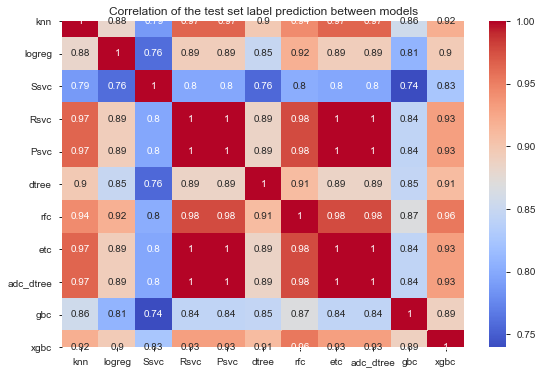

In [215]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))
g = sns.heatmap(pred.corr(), annot=True, cmap='coolwarm', ax=ax)
g.set_title('Correlation of the test set label prediction between models')

In [216]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]

In [217]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(pred, 5))

Top Absolute Correlations
Ssvc    gbc      0.739657
        dtree    0.756234
logreg  Ssvc     0.759191
knn     Ssvc     0.788474
Ssvc    etc      0.797750
dtype: float64


## Stacking Classifier

In [57]:
#Top 4 estimators
estimators_ = [('gbc',gbc_grid.best_estimator_),('psvc',grid_svc_p.best_estimator_),
            ('etc',etc_grid.best_estimator_),('adc_dtree_grid',adc_dtree_grid.best_estimator_)]

In [58]:
from sklearn.ensemble import StackingClassifier
sclf1 = StackingClassifier(estimators=estimators_
                                , final_estimator=RandomForestClassifier(n_estimators=500,criterion='entropy',
                                                                       max_features='auto'))
sclf1_param = {
                 'final_estimator__max_depth' : [7,8,9,10],
             }
sclf1_grid = GridSearchCV(sclf1, sclf1_param,cv=5, return_train_score=True,scoring=f2 )
sclf1_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(cv=None,
                                          estimators=[('gbc',
                                                       GradientBoostingClassifier(ccp_alpha=0.0,
                                                                                  criterion='friedman_mse',
                                                                                  init=None,
                                                                                  learning_rate=2,
                                                                                  loss='deviance',
                                                                                  max_depth=2,
                                                                                  max_features=None,
                                                                                  max_leaf_nodes=None,
                                                        

In [59]:
print('Best Mean Cross Validation Score is :{:.2f}'.format (sclf1_grid.best_score_))
print(f'Best Mean Cross Validation Score is {sclf1_grid.best_params_}')
print('Test score is : {:.2f}'.format(sclf1_grid.score(X_test,y_test)))
print('Train score is : {:.2f}'.format(sclf1_grid.score(X_train,y_train)))

Best Mean Cross Validation Score is :0.79
Best Mean Cross Validation Score is {'final_estimator__max_depth': 7}
Test score is : 0.88
Train score is : 0.97


In [52]:
#Top 3 estimators

estimators_ = [('psvc',grid_svc_p.best_estimator_),
            ('rfc',rfc_grid.best_estimator_),('grid_dtree',grid_dtree.best_estimator_)]

In [59]:
from sklearn.ensemble import StackingClassifier
from  sklearn.ensemble import ExtraTreesClassifier
sclf1a = StackingClassifier(estimators=estimators_, final_estimator=RandomForestClassifier(n_estimators=500,criterion='entropy',
                                                                       max_features='auto'))
sclf1a_param = {
                 'final_estimator__max_depth' : [7,8,9],
             }
sclf1a_grid = GridSearchCV(sclf1a, sclf1a_param,cv=5, return_train_score=True,scoring=f2 )
sclf1a_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(cv=None,
                                          estimators=[('psvc',
                                                       SVC(C=1.0,
                                                           break_ties=False,
                                                           cache_size=200,
                                                           class_weight=None,
                                                           coef0=0.0,
                                                           decision_function_shape='ovr',
                                                           degree=1,
                                                           gamma='scale',
                                                           kernel='poly',
                                                           max_iter=-1,
                                                           probability=False,
                           

In [55]:
print(f'Best Mean Cross Validation Score is {sclf1a_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf1a_grid.best_params_}')
print('Test score is : {:.4f}'.format(sclf1a_grid.score(X_test,y_test)))
print('Train score is : {:.4f}'.format(sclf1a_grid.score(X_train,y_train)))

Best Mean Cross Validation Score is 0.7698033149646054
Best Mean Cross Validation Score is {'final_estimator__max_depth': 7}
Test score is : 0.8955
Train score is : 0.8075


In [61]:
estimators_ = [ ('rfc',rfc_grid.best_estimator_),('grid_dtree',grid_dtree.best_estimator_)]

In [62]:
from sklearn.ensemble import StackingClassifier
from  sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

sclf1a = StackingClassifier(estimators=estimators_, final_estimator=SVC())
sclf1a_param = {
                 'final_estimator__degree' : [1],
                 'final_estimator__kernel' :['poly']
             }
sclf1b_grid = GridSearchCV(sclf1a, sclf1a_param,cv=5, return_train_score=True,scoring=f2 )
sclf1b_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(cv=None,
                                          estimators=[('rfc',
                                                       RandomForestClassifier(bootstrap=True,
                                                                              ccp_alpha=0.0,
                                                                              class_weight=None,
                                                                              criterion='entropy',
                                                                              max_depth=7,
                                                                              max_features='auto',
                                                                              max_leaf_nodes=None,
                                                                              max_samples=None,
                                                                              min_i

In [63]:
print(f'Best Mean Cross Validation Score is {sclf1b_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf1b_grid.best_params_}')
print('Test score is : {:.4f}'.format(sclf1b_grid.score(X_test,y_test)))
print('Train score is : {:.4f}'.format(sclf1b_grid.score(X_train,y_train)))

Best Mean Cross Validation Score is 0.7701477300939009
Best Mean Cross Validation Score is {'final_estimator__degree': 1, 'final_estimator__kernel': 'poly'}
Test score is : 0.9108
Train score is : 0.8385


In [312]:
estimators_ = [('cbc',cbc_grid.best_estimator_),('mlpc1',mlpc1_grid.best_estimator_),
            ('lgbm',lgbm_grid.best_estimator_)]

In [313]:
from sklearn.ensemble import StackingClassifier
from  sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

sclf1a = StackingClassifier(estimators=estimators_, final_estimator=SVC())
sclf1a_param = {
                 'final_estimator__degree' : [1],
                 'final_estimator__kernel' :['poly']
             }
sclf1c_grid = GridSearchCV(sclf1a, sclf1a_param,cv=5, return_train_score=True,scoring=f2 )
sclf1c_grid.fit(X_train,y_train)

0:	learn: 0.6353332	total: 30ms	remaining: 7.48s
1:	learn: 0.5823716	total: 38.1ms	remaining: 4.73s
2:	learn: 0.5367216	total: 46.4ms	remaining: 3.82s
3:	learn: 0.4929907	total: 58.2ms	remaining: 3.58s
4:	learn: 0.4585254	total: 70.6ms	remaining: 3.46s
5:	learn: 0.4240484	total: 83.2ms	remaining: 3.38s
6:	learn: 0.3902455	total: 95.6ms	remaining: 3.32s
7:	learn: 0.3581927	total: 108ms	remaining: 3.27s
8:	learn: 0.3290534	total: 121ms	remaining: 3.24s
9:	learn: 0.3029044	total: 134ms	remaining: 3.21s
10:	learn: 0.2773707	total: 148ms	remaining: 3.22s
11:	learn: 0.2543079	total: 163ms	remaining: 3.24s
12:	learn: 0.2366189	total: 176ms	remaining: 3.2s
13:	learn: 0.2178662	total: 188ms	remaining: 3.17s
14:	learn: 0.2017946	total: 202ms	remaining: 3.16s
15:	learn: 0.1842150	total: 214ms	remaining: 3.13s
16:	learn: 0.1698725	total: 228ms	remaining: 3.13s
17:	learn: 0.1572505	total: 242ms	remaining: 3.12s
18:	learn: 0.1468647	total: 258ms	remaining: 3.14s
19:	learn: 0.1358161	total: 273ms	rem

173:	learn: 0.0068835	total: 2.02s	remaining: 881ms
174:	learn: 0.0068614	total: 2.03s	remaining: 869ms
175:	learn: 0.0068412	total: 2.04s	remaining: 860ms
176:	learn: 0.0068242	total: 2.05s	remaining: 847ms
177:	learn: 0.0067920	total: 2.06s	remaining: 834ms
178:	learn: 0.0067696	total: 2.07s	remaining: 822ms
179:	learn: 0.0067451	total: 2.08s	remaining: 809ms
180:	learn: 0.0067344	total: 2.09s	remaining: 796ms
181:	learn: 0.0067191	total: 2.09s	remaining: 782ms
182:	learn: 0.0067030	total: 2.1s	remaining: 770ms
183:	learn: 0.0066840	total: 2.11s	remaining: 757ms
184:	learn: 0.0066579	total: 2.12s	remaining: 744ms
185:	learn: 0.0066497	total: 2.12s	remaining: 731ms
186:	learn: 0.0066104	total: 2.13s	remaining: 718ms
187:	learn: 0.0065911	total: 2.14s	remaining: 706ms
188:	learn: 0.0065667	total: 2.15s	remaining: 695ms
189:	learn: 0.0065276	total: 2.16s	remaining: 683ms
190:	learn: 0.0065019	total: 2.17s	remaining: 670ms
191:	learn: 0.0064827	total: 2.18s	remaining: 658ms
192:	learn: 0

98:	learn: 0.0067958	total: 1.09s	remaining: 1.67s
99:	learn: 0.0067340	total: 1.1s	remaining: 1.65s
100:	learn: 0.0066517	total: 1.12s	remaining: 1.65s
101:	learn: 0.0065759	total: 1.13s	remaining: 1.64s
102:	learn: 0.0065056	total: 1.14s	remaining: 1.63s
103:	learn: 0.0064672	total: 1.15s	remaining: 1.62s
104:	learn: 0.0064295	total: 1.16s	remaining: 1.61s
105:	learn: 0.0063582	total: 1.17s	remaining: 1.59s
106:	learn: 0.0063005	total: 1.18s	remaining: 1.57s
107:	learn: 0.0062231	total: 1.18s	remaining: 1.56s
108:	learn: 0.0061945	total: 1.19s	remaining: 1.54s
109:	learn: 0.0061283	total: 1.2s	remaining: 1.53s
110:	learn: 0.0060560	total: 1.21s	remaining: 1.52s
111:	learn: 0.0060074	total: 1.22s	remaining: 1.51s
112:	learn: 0.0059716	total: 1.24s	remaining: 1.5s
113:	learn: 0.0059076	total: 1.25s	remaining: 1.49s
114:	learn: 0.0058304	total: 1.26s	remaining: 1.48s
115:	learn: 0.0057791	total: 1.27s	remaining: 1.47s
116:	learn: 0.0057490	total: 1.28s	remaining: 1.46s
117:	learn: 0.005

15:	learn: 0.1894071	total: 221ms	remaining: 3.23s
16:	learn: 0.1749294	total: 231ms	remaining: 3.16s
17:	learn: 0.1620406	total: 240ms	remaining: 3.09s
18:	learn: 0.1511858	total: 248ms	remaining: 3.01s
19:	learn: 0.1399486	total: 254ms	remaining: 2.93s
20:	learn: 0.1302516	total: 261ms	remaining: 2.85s
21:	learn: 0.1215182	total: 269ms	remaining: 2.79s
22:	learn: 0.1136625	total: 276ms	remaining: 2.72s
23:	learn: 0.1059663	total: 282ms	remaining: 2.66s
24:	learn: 0.0991322	total: 289ms	remaining: 2.6s
25:	learn: 0.0921838	total: 296ms	remaining: 2.55s
26:	learn: 0.0867171	total: 304ms	remaining: 2.51s
27:	learn: 0.0812747	total: 313ms	remaining: 2.48s
28:	learn: 0.0758834	total: 327ms	remaining: 2.49s
29:	learn: 0.0716654	total: 339ms	remaining: 2.48s
30:	learn: 0.0674527	total: 348ms	remaining: 2.46s
31:	learn: 0.0639349	total: 356ms	remaining: 2.43s
32:	learn: 0.0600745	total: 364ms	remaining: 2.39s
33:	learn: 0.0566203	total: 372ms	remaining: 2.36s
34:	learn: 0.0536991	total: 379m

179:	learn: 0.0065293	total: 1.98s	remaining: 772ms
180:	learn: 0.0064750	total: 1.99s	remaining: 759ms
181:	learn: 0.0064551	total: 2s	remaining: 747ms
182:	learn: 0.0064299	total: 2.01s	remaining: 735ms
183:	learn: 0.0064085	total: 2.02s	remaining: 724ms
184:	learn: 0.0063670	total: 2.02s	remaining: 711ms
185:	learn: 0.0063504	total: 2.04s	remaining: 700ms
186:	learn: 0.0063256	total: 2.05s	remaining: 691ms
187:	learn: 0.0062952	total: 2.06s	remaining: 680ms
188:	learn: 0.0062906	total: 2.07s	remaining: 669ms
189:	learn: 0.0062511	total: 2.08s	remaining: 658ms
190:	learn: 0.0062151	total: 2.1s	remaining: 648ms
191:	learn: 0.0062083	total: 2.11s	remaining: 638ms
192:	learn: 0.0061940	total: 2.14s	remaining: 632ms
193:	learn: 0.0061706	total: 2.15s	remaining: 620ms
194:	learn: 0.0061514	total: 2.16s	remaining: 609ms
195:	learn: 0.0061377	total: 2.17s	remaining: 597ms
196:	learn: 0.0061094	total: 2.17s	remaining: 585ms
197:	learn: 0.0060759	total: 2.18s	remaining: 573ms
198:	learn: 0.00

100:	learn: 0.0098254	total: 1.12s	remaining: 1.66s
101:	learn: 0.0097552	total: 1.13s	remaining: 1.64s
102:	learn: 0.0096920	total: 1.14s	remaining: 1.62s
103:	learn: 0.0096026	total: 1.15s	remaining: 1.61s
104:	learn: 0.0095280	total: 1.15s	remaining: 1.59s
105:	learn: 0.0094842	total: 1.16s	remaining: 1.57s
106:	learn: 0.0094447	total: 1.17s	remaining: 1.56s
107:	learn: 0.0093976	total: 1.18s	remaining: 1.56s
108:	learn: 0.0093460	total: 1.2s	remaining: 1.55s
109:	learn: 0.0092265	total: 1.21s	remaining: 1.54s
110:	learn: 0.0091603	total: 1.23s	remaining: 1.54s
111:	learn: 0.0091170	total: 1.24s	remaining: 1.52s
112:	learn: 0.0090551	total: 1.25s	remaining: 1.51s
113:	learn: 0.0089938	total: 1.26s	remaining: 1.51s
114:	learn: 0.0089373	total: 1.28s	remaining: 1.5s
115:	learn: 0.0088978	total: 1.29s	remaining: 1.49s
116:	learn: 0.0088465	total: 1.3s	remaining: 1.48s
117:	learn: 0.0088043	total: 1.31s	remaining: 1.46s
118:	learn: 0.0087688	total: 1.31s	remaining: 1.45s
119:	learn: 0.0

13:	learn: 0.2243173	total: 223ms	remaining: 3.76s
14:	learn: 0.2073344	total: 232ms	remaining: 3.64s
15:	learn: 0.1900160	total: 239ms	remaining: 3.5s
16:	learn: 0.1754592	total: 247ms	remaining: 3.38s
17:	learn: 0.1618428	total: 256ms	remaining: 3.3s
18:	learn: 0.1510077	total: 272ms	remaining: 3.31s
19:	learn: 0.1400431	total: 285ms	remaining: 3.28s
20:	learn: 0.1306927	total: 294ms	remaining: 3.21s
21:	learn: 0.1220145	total: 301ms	remaining: 3.12s
22:	learn: 0.1141780	total: 308ms	remaining: 3.04s
23:	learn: 0.1062774	total: 316ms	remaining: 2.98s
24:	learn: 0.0993533	total: 325ms	remaining: 2.93s
25:	learn: 0.0929727	total: 336ms	remaining: 2.9s
26:	learn: 0.0868612	total: 350ms	remaining: 2.89s
27:	learn: 0.0816590	total: 364ms	remaining: 2.89s
28:	learn: 0.0767404	total: 374ms	remaining: 2.85s
29:	learn: 0.0723971	total: 383ms	remaining: 2.81s
30:	learn: 0.0681508	total: 391ms	remaining: 2.76s
31:	learn: 0.0645138	total: 400ms	remaining: 2.72s
32:	learn: 0.0604961	total: 411ms	

187:	learn: 0.0072470	total: 2.01s	remaining: 664ms
188:	learn: 0.0072241	total: 2.02s	remaining: 654ms
189:	learn: 0.0072020	total: 2.04s	remaining: 643ms
190:	learn: 0.0071693	total: 2.05s	remaining: 632ms
191:	learn: 0.0071419	total: 2.06s	remaining: 621ms
192:	learn: 0.0071320	total: 2.07s	remaining: 611ms
193:	learn: 0.0071184	total: 2.08s	remaining: 600ms
194:	learn: 0.0070978	total: 2.09s	remaining: 589ms
195:	learn: 0.0070744	total: 2.1s	remaining: 578ms
196:	learn: 0.0070483	total: 2.1s	remaining: 566ms
197:	learn: 0.0070288	total: 2.11s	remaining: 555ms
198:	learn: 0.0070162	total: 2.13s	remaining: 545ms
199:	learn: 0.0069897	total: 2.14s	remaining: 535ms
200:	learn: 0.0069754	total: 2.15s	remaining: 525ms
201:	learn: 0.0069392	total: 2.16s	remaining: 514ms
202:	learn: 0.0069235	total: 2.17s	remaining: 502ms
203:	learn: 0.0068687	total: 2.17s	remaining: 490ms
204:	learn: 0.0068504	total: 2.18s	remaining: 479ms
205:	learn: 0.0068296	total: 2.19s	remaining: 468ms
206:	learn: 0.

106:	learn: 0.0092878	total: 1.26s	remaining: 1.69s
107:	learn: 0.0092112	total: 1.27s	remaining: 1.67s
108:	learn: 0.0091619	total: 1.28s	remaining: 1.66s
109:	learn: 0.0091017	total: 1.29s	remaining: 1.64s
110:	learn: 0.0090184	total: 1.3s	remaining: 1.63s
111:	learn: 0.0089607	total: 1.31s	remaining: 1.62s
112:	learn: 0.0089201	total: 1.33s	remaining: 1.61s
113:	learn: 0.0088800	total: 1.34s	remaining: 1.6s
114:	learn: 0.0088221	total: 1.35s	remaining: 1.58s
115:	learn: 0.0087758	total: 1.36s	remaining: 1.57s
116:	learn: 0.0087434	total: 1.36s	remaining: 1.55s
117:	learn: 0.0087051	total: 1.37s	remaining: 1.53s
118:	learn: 0.0086582	total: 1.38s	remaining: 1.52s
119:	learn: 0.0085708	total: 1.39s	remaining: 1.51s
120:	learn: 0.0085430	total: 1.41s	remaining: 1.51s
121:	learn: 0.0085106	total: 1.43s	remaining: 1.5s
122:	learn: 0.0084705	total: 1.44s	remaining: 1.49s
123:	learn: 0.0084464	total: 1.45s	remaining: 1.48s
124:	learn: 0.0084222	total: 1.46s	remaining: 1.46s
125:	learn: 0.0

16:	learn: 0.1665228	total: 207ms	remaining: 2.84s
17:	learn: 0.1537594	total: 221ms	remaining: 2.84s
18:	learn: 0.1432749	total: 232ms	remaining: 2.81s
19:	learn: 0.1327252	total: 242ms	remaining: 2.78s
20:	learn: 0.1233760	total: 252ms	remaining: 2.75s
21:	learn: 0.1149220	total: 266ms	remaining: 2.76s
22:	learn: 0.1072295	total: 280ms	remaining: 2.77s
23:	learn: 0.0997133	total: 297ms	remaining: 2.8s
24:	learn: 0.0928529	total: 307ms	remaining: 2.77s
25:	learn: 0.0870598	total: 317ms	remaining: 2.73s
26:	learn: 0.0805764	total: 328ms	remaining: 2.71s
27:	learn: 0.0751557	total: 341ms	remaining: 2.7s
28:	learn: 0.0700653	total: 353ms	remaining: 2.69s
29:	learn: 0.0661161	total: 364ms	remaining: 2.67s
30:	learn: 0.0620211	total: 377ms	remaining: 2.66s
31:	learn: 0.0585610	total: 391ms	remaining: 2.66s
32:	learn: 0.0550168	total: 402ms	remaining: 2.64s
33:	learn: 0.0514922	total: 414ms	remaining: 2.63s
34:	learn: 0.0482033	total: 426ms	remaining: 2.62s
35:	learn: 0.0450887	total: 434ms

183:	learn: 0.0048471	total: 2.17s	remaining: 779ms
184:	learn: 0.0048042	total: 2.18s	remaining: 766ms
185:	learn: 0.0047831	total: 2.19s	remaining: 754ms
186:	learn: 0.0047582	total: 2.2s	remaining: 741ms
187:	learn: 0.0047457	total: 2.21s	remaining: 727ms
188:	learn: 0.0047152	total: 2.21s	remaining: 714ms
189:	learn: 0.0046935	total: 2.22s	remaining: 700ms
190:	learn: 0.0046581	total: 2.22s	remaining: 687ms
191:	learn: 0.0046499	total: 2.23s	remaining: 674ms
192:	learn: 0.0046222	total: 2.24s	remaining: 660ms
193:	learn: 0.0045891	total: 2.24s	remaining: 648ms
194:	learn: 0.0045749	total: 2.25s	remaining: 635ms
195:	learn: 0.0045593	total: 2.25s	remaining: 621ms
196:	learn: 0.0045321	total: 2.26s	remaining: 608ms
197:	learn: 0.0045064	total: 2.27s	remaining: 596ms
198:	learn: 0.0044597	total: 2.28s	remaining: 583ms
199:	learn: 0.0044397	total: 2.28s	remaining: 571ms
200:	learn: 0.0044264	total: 2.3s	remaining: 560ms
201:	learn: 0.0044101	total: 2.31s	remaining: 548ms
202:	learn: 0.

98:	learn: 0.0060269	total: 1.29s	remaining: 1.97s
99:	learn: 0.0059694	total: 1.3s	remaining: 1.95s
100:	learn: 0.0059288	total: 1.3s	remaining: 1.92s
101:	learn: 0.0058499	total: 1.31s	remaining: 1.9s
102:	learn: 0.0057723	total: 1.31s	remaining: 1.88s
103:	learn: 0.0057356	total: 1.33s	remaining: 1.86s
104:	learn: 0.0056619	total: 1.34s	remaining: 1.85s
105:	learn: 0.0056121	total: 1.35s	remaining: 1.83s
106:	learn: 0.0055723	total: 1.36s	remaining: 1.82s
107:	learn: 0.0055381	total: 1.37s	remaining: 1.8s
108:	learn: 0.0055021	total: 1.38s	remaining: 1.78s
109:	learn: 0.0054187	total: 1.38s	remaining: 1.76s
110:	learn: 0.0053454	total: 1.39s	remaining: 1.74s
111:	learn: 0.0052776	total: 1.39s	remaining: 1.72s
112:	learn: 0.0052484	total: 1.4s	remaining: 1.7s
113:	learn: 0.0051674	total: 1.41s	remaining: 1.68s
114:	learn: 0.0050926	total: 1.41s	remaining: 1.66s
115:	learn: 0.0050211	total: 1.43s	remaining: 1.65s
116:	learn: 0.0049789	total: 1.44s	remaining: 1.64s
117:	learn: 0.004925

15:	learn: 0.1864769	total: 195ms	remaining: 2.86s
16:	learn: 0.1716199	total: 204ms	remaining: 2.79s
17:	learn: 0.1578152	total: 212ms	remaining: 2.73s
18:	learn: 0.1471062	total: 217ms	remaining: 2.64s
19:	learn: 0.1360568	total: 223ms	remaining: 2.56s
20:	learn: 0.1265361	total: 232ms	remaining: 2.53s
21:	learn: 0.1179722	total: 245ms	remaining: 2.54s
22:	learn: 0.1104344	total: 256ms	remaining: 2.52s
23:	learn: 0.1028370	total: 268ms	remaining: 2.52s
24:	learn: 0.0957874	total: 276ms	remaining: 2.48s
25:	learn: 0.0893372	total: 287ms	remaining: 2.47s
26:	learn: 0.0836537	total: 299ms	remaining: 2.47s
27:	learn: 0.0788686	total: 310ms	remaining: 2.46s
28:	learn: 0.0734961	total: 321ms	remaining: 2.45s
29:	learn: 0.0691246	total: 332ms	remaining: 2.43s
30:	learn: 0.0651325	total: 342ms	remaining: 2.41s
31:	learn: 0.0614699	total: 352ms	remaining: 2.4s
32:	learn: 0.0578235	total: 362ms	remaining: 2.38s
33:	learn: 0.0545633	total: 373ms	remaining: 2.37s
34:	learn: 0.0511917	total: 382m

179:	learn: 0.0050720	total: 1.97s	remaining: 766ms
180:	learn: 0.0050399	total: 1.99s	remaining: 758ms
181:	learn: 0.0050228	total: 2s	remaining: 748ms
182:	learn: 0.0049938	total: 2.02s	remaining: 739ms
183:	learn: 0.0049655	total: 2.03s	remaining: 729ms
184:	learn: 0.0049336	total: 2.05s	remaining: 719ms
185:	learn: 0.0049242	total: 2.06s	remaining: 709ms
186:	learn: 0.0048981	total: 2.08s	remaining: 700ms
187:	learn: 0.0048704	total: 2.1s	remaining: 691ms
188:	learn: 0.0048554	total: 2.11s	remaining: 682ms
189:	learn: 0.0048331	total: 2.12s	remaining: 671ms
190:	learn: 0.0048071	total: 2.14s	remaining: 662ms
191:	learn: 0.0047843	total: 2.15s	remaining: 650ms
192:	learn: 0.0047700	total: 2.16s	remaining: 639ms
193:	learn: 0.0047216	total: 2.17s	remaining: 627ms
194:	learn: 0.0047083	total: 2.18s	remaining: 615ms
195:	learn: 0.0046683	total: 2.19s	remaining: 603ms
196:	learn: 0.0046482	total: 2.2s	remaining: 591ms
197:	learn: 0.0046289	total: 2.21s	remaining: 580ms
198:	learn: 0.004

91:	learn: 0.0083543	total: 988ms	remaining: 1.7s
92:	learn: 0.0082667	total: 999ms	remaining: 1.69s
93:	learn: 0.0081590	total: 1.01s	remaining: 1.68s
94:	learn: 0.0080440	total: 1.02s	remaining: 1.67s
95:	learn: 0.0079480	total: 1.03s	remaining: 1.65s
96:	learn: 0.0078744	total: 1.04s	remaining: 1.65s
97:	learn: 0.0077862	total: 1.06s	remaining: 1.64s
98:	learn: 0.0076866	total: 1.07s	remaining: 1.63s
99:	learn: 0.0076267	total: 1.08s	remaining: 1.62s
100:	learn: 0.0075099	total: 1.09s	remaining: 1.61s
101:	learn: 0.0074492	total: 1.1s	remaining: 1.6s
102:	learn: 0.0073659	total: 1.11s	remaining: 1.59s
103:	learn: 0.0072498	total: 1.13s	remaining: 1.58s
104:	learn: 0.0071664	total: 1.14s	remaining: 1.57s
105:	learn: 0.0070872	total: 1.16s	remaining: 1.57s
106:	learn: 0.0070565	total: 1.17s	remaining: 1.56s
107:	learn: 0.0070024	total: 1.18s	remaining: 1.54s
108:	learn: 0.0069138	total: 1.18s	remaining: 1.53s
109:	learn: 0.0068272	total: 1.19s	remaining: 1.52s
110:	learn: 0.0067870	to

0:	learn: 0.6369528	total: 14.4ms	remaining: 3.59s
1:	learn: 0.5859129	total: 21.6ms	remaining: 2.68s
2:	learn: 0.5409845	total: 33.1ms	remaining: 2.73s
3:	learn: 0.4982088	total: 43.8ms	remaining: 2.69s
4:	learn: 0.4647393	total: 53.4ms	remaining: 2.62s
5:	learn: 0.4295793	total: 61.9ms	remaining: 2.52s
6:	learn: 0.3958053	total: 74.8ms	remaining: 2.6s
7:	learn: 0.3657187	total: 81.6ms	remaining: 2.47s
8:	learn: 0.3365673	total: 87.5ms	remaining: 2.34s
9:	learn: 0.3105136	total: 94ms	remaining: 2.25s
10:	learn: 0.2847370	total: 102ms	remaining: 2.22s
11:	learn: 0.2602263	total: 112ms	remaining: 2.23s
12:	learn: 0.2414704	total: 119ms	remaining: 2.17s
13:	learn: 0.2225911	total: 126ms	remaining: 2.12s
14:	learn: 0.2044301	total: 134ms	remaining: 2.09s
15:	learn: 0.1866137	total: 146ms	remaining: 2.14s
16:	learn: 0.1722634	total: 157ms	remaining: 2.15s
17:	learn: 0.1584502	total: 166ms	remaining: 2.14s
18:	learn: 0.1479121	total: 173ms	remaining: 2.11s
19:	learn: 0.1371882	total: 180ms	

174:	learn: 0.0053182	total: 1.98s	remaining: 847ms
175:	learn: 0.0053066	total: 1.99s	remaining: 836ms
176:	learn: 0.0052662	total: 2s	remaining: 824ms
177:	learn: 0.0052307	total: 2.01s	remaining: 813ms
178:	learn: 0.0052175	total: 2.02s	remaining: 801ms
179:	learn: 0.0051763	total: 2.03s	remaining: 791ms
180:	learn: 0.0051570	total: 2.04s	remaining: 778ms
181:	learn: 0.0051249	total: 2.05s	remaining: 766ms
182:	learn: 0.0050918	total: 2.06s	remaining: 753ms
183:	learn: 0.0050388	total: 2.06s	remaining: 740ms
184:	learn: 0.0050012	total: 2.07s	remaining: 727ms
185:	learn: 0.0049816	total: 2.08s	remaining: 716ms
186:	learn: 0.0049477	total: 2.09s	remaining: 704ms
187:	learn: 0.0049302	total: 2.1s	remaining: 693ms
188:	learn: 0.0049065	total: 2.11s	remaining: 680ms
189:	learn: 0.0048811	total: 2.12s	remaining: 668ms
190:	learn: 0.0048593	total: 2.12s	remaining: 655ms
191:	learn: 0.0048476	total: 2.13s	remaining: 643ms
192:	learn: 0.0048245	total: 2.13s	remaining: 630ms
193:	learn: 0.00

84:	learn: 0.0092226	total: 1.11s	remaining: 2.15s
85:	learn: 0.0091067	total: 1.12s	remaining: 2.14s
86:	learn: 0.0089810	total: 1.14s	remaining: 2.13s
87:	learn: 0.0088331	total: 1.15s	remaining: 2.11s
88:	learn: 0.0087164	total: 1.17s	remaining: 2.11s
89:	learn: 0.0085731	total: 1.18s	remaining: 2.1s
90:	learn: 0.0084072	total: 1.19s	remaining: 2.09s
91:	learn: 0.0082543	total: 1.21s	remaining: 2.08s
92:	learn: 0.0081628	total: 1.22s	remaining: 2.06s
93:	learn: 0.0080766	total: 1.23s	remaining: 2.04s
94:	learn: 0.0079744	total: 1.24s	remaining: 2.03s
95:	learn: 0.0078633	total: 1.26s	remaining: 2.02s
96:	learn: 0.0077165	total: 1.26s	remaining: 2s
97:	learn: 0.0076026	total: 1.28s	remaining: 1.98s
98:	learn: 0.0075177	total: 1.29s	remaining: 1.97s
99:	learn: 0.0073697	total: 1.3s	remaining: 1.95s
100:	learn: 0.0072763	total: 1.31s	remaining: 1.94s
101:	learn: 0.0071540	total: 1.33s	remaining: 1.92s
102:	learn: 0.0070822	total: 1.34s	remaining: 1.91s
103:	learn: 0.0070109	total: 1.35

0:	learn: 0.6380048	total: 12.6ms	remaining: 3.14s
1:	learn: 0.5866597	total: 22.6ms	remaining: 2.8s
2:	learn: 0.5413998	total: 35.4ms	remaining: 2.92s
3:	learn: 0.4984365	total: 48.9ms	remaining: 3s
4:	learn: 0.4641162	total: 60.7ms	remaining: 2.97s
5:	learn: 0.4296671	total: 73.8ms	remaining: 3s
6:	learn: 0.3985732	total: 88.2ms	remaining: 3.06s
7:	learn: 0.3687079	total: 106ms	remaining: 3.19s
8:	learn: 0.3396066	total: 118ms	remaining: 3.16s
9:	learn: 0.3137387	total: 133ms	remaining: 3.19s
10:	learn: 0.2878891	total: 148ms	remaining: 3.22s
11:	learn: 0.2638615	total: 163ms	remaining: 3.23s
12:	learn: 0.2457959	total: 176ms	remaining: 3.21s
13:	learn: 0.2264879	total: 188ms	remaining: 3.17s
14:	learn: 0.2097664	total: 206ms	remaining: 3.23s
15:	learn: 0.1932208	total: 220ms	remaining: 3.22s
16:	learn: 0.1788630	total: 236ms	remaining: 3.24s
17:	learn: 0.1647760	total: 252ms	remaining: 3.24s
18:	learn: 0.1536000	total: 271ms	remaining: 3.3s
19:	learn: 0.1424411	total: 286ms	remainin

164:	learn: 0.0082275	total: 2.38s	remaining: 1.23s
165:	learn: 0.0081633	total: 2.4s	remaining: 1.21s
166:	learn: 0.0081386	total: 2.41s	remaining: 1.2s
167:	learn: 0.0081090	total: 2.42s	remaining: 1.18s
168:	learn: 0.0080556	total: 2.44s	remaining: 1.17s
169:	learn: 0.0080310	total: 2.46s	remaining: 1.16s
170:	learn: 0.0080063	total: 2.47s	remaining: 1.14s
171:	learn: 0.0079507	total: 2.49s	remaining: 1.13s
172:	learn: 0.0079012	total: 2.5s	remaining: 1.11s
173:	learn: 0.0078373	total: 2.51s	remaining: 1.1s
174:	learn: 0.0077917	total: 2.52s	remaining: 1.08s
175:	learn: 0.0077688	total: 2.54s	remaining: 1.07s
176:	learn: 0.0077268	total: 2.55s	remaining: 1.05s
177:	learn: 0.0076912	total: 2.57s	remaining: 1.04s
178:	learn: 0.0076585	total: 2.58s	remaining: 1.02s
179:	learn: 0.0076275	total: 2.6s	remaining: 1.01s
180:	learn: 0.0076102	total: 2.61s	remaining: 994ms
181:	learn: 0.0075649	total: 2.62s	remaining: 979ms
182:	learn: 0.0075230	total: 2.64s	remaining: 965ms
183:	learn: 0.007

86:	learn: 0.0127533	total: 1.11s	remaining: 2.08s
87:	learn: 0.0126577	total: 1.13s	remaining: 2.07s
88:	learn: 0.0125069	total: 1.14s	remaining: 2.07s
89:	learn: 0.0124051	total: 1.15s	remaining: 2.04s
90:	learn: 0.0122971	total: 1.16s	remaining: 2.02s
91:	learn: 0.0121713	total: 1.17s	remaining: 2s
92:	learn: 0.0120716	total: 1.18s	remaining: 1.98s
93:	learn: 0.0119859	total: 1.18s	remaining: 1.96s
94:	learn: 0.0118313	total: 1.19s	remaining: 1.94s
95:	learn: 0.0116850	total: 1.2s	remaining: 1.93s
96:	learn: 0.0116181	total: 1.22s	remaining: 1.92s
97:	learn: 0.0114636	total: 1.23s	remaining: 1.9s
98:	learn: 0.0113446	total: 1.24s	remaining: 1.9s
99:	learn: 0.0112755	total: 1.25s	remaining: 1.88s
100:	learn: 0.0111650	total: 1.27s	remaining: 1.87s
101:	learn: 0.0110867	total: 1.28s	remaining: 1.86s
102:	learn: 0.0109957	total: 1.3s	remaining: 1.86s
103:	learn: 0.0109049	total: 1.32s	remaining: 1.85s
104:	learn: 0.0108584	total: 1.33s	remaining: 1.84s
105:	learn: 0.0107919	total: 1.34

0:	learn: 0.6379270	total: 19.6ms	remaining: 4.89s
1:	learn: 0.5868196	total: 33.9ms	remaining: 4.2s
2:	learn: 0.5422833	total: 47.2ms	remaining: 3.88s
3:	learn: 0.4994511	total: 59.1ms	remaining: 3.63s
4:	learn: 0.4657188	total: 69.9ms	remaining: 3.43s
5:	learn: 0.4308606	total: 88ms	remaining: 3.58s
6:	learn: 0.3996957	total: 100ms	remaining: 3.48s
7:	learn: 0.3696224	total: 112ms	remaining: 3.4s
8:	learn: 0.3407428	total: 125ms	remaining: 3.34s
9:	learn: 0.3150628	total: 136ms	remaining: 3.26s
10:	learn: 0.2893142	total: 151ms	remaining: 3.28s
11:	learn: 0.2651100	total: 166ms	remaining: 3.29s
12:	learn: 0.2471002	total: 177ms	remaining: 3.23s
13:	learn: 0.2279718	total: 191ms	remaining: 3.21s
14:	learn: 0.2104846	total: 204ms	remaining: 3.19s
15:	learn: 0.1927090	total: 220ms	remaining: 3.22s
16:	learn: 0.1783968	total: 232ms	remaining: 3.18s
17:	learn: 0.1631995	total: 243ms	remaining: 3.14s
18:	learn: 0.1519958	total: 260ms	remaining: 3.16s
19:	learn: 0.1413471	total: 272ms	remai

172:	learn: 0.0065716	total: 2.17s	remaining: 966ms
173:	learn: 0.0065442	total: 2.19s	remaining: 956ms
174:	learn: 0.0065068	total: 2.2s	remaining: 943ms
175:	learn: 0.0064728	total: 2.21s	remaining: 931ms
176:	learn: 0.0064451	total: 2.22s	remaining: 917ms
177:	learn: 0.0063954	total: 2.23s	remaining: 903ms
178:	learn: 0.0063763	total: 2.25s	remaining: 891ms
179:	learn: 0.0063476	total: 2.25s	remaining: 877ms
180:	learn: 0.0063239	total: 2.27s	remaining: 864ms
181:	learn: 0.0062746	total: 2.28s	remaining: 852ms
182:	learn: 0.0062464	total: 2.29s	remaining: 839ms
183:	learn: 0.0062139	total: 2.3s	remaining: 825ms
184:	learn: 0.0061622	total: 2.31s	remaining: 813ms
185:	learn: 0.0061187	total: 2.32s	remaining: 799ms
186:	learn: 0.0061001	total: 2.33s	remaining: 785ms
187:	learn: 0.0060568	total: 2.34s	remaining: 772ms
188:	learn: 0.0060194	total: 2.35s	remaining: 760ms
189:	learn: 0.0059899	total: 2.37s	remaining: 748ms
190:	learn: 0.0059578	total: 2.38s	remaining: 734ms
191:	learn: 0.

95:	learn: 0.0112844	total: 1.13s	remaining: 1.81s
96:	learn: 0.0111382	total: 1.14s	remaining: 1.8s
97:	learn: 0.0110156	total: 1.16s	remaining: 1.79s
98:	learn: 0.0108977	total: 1.17s	remaining: 1.78s
99:	learn: 0.0107893	total: 1.19s	remaining: 1.79s
100:	learn: 0.0107039	total: 1.22s	remaining: 1.8s
101:	learn: 0.0105819	total: 1.24s	remaining: 1.79s
102:	learn: 0.0104900	total: 1.25s	remaining: 1.78s
103:	learn: 0.0103542	total: 1.26s	remaining: 1.77s
104:	learn: 0.0102901	total: 1.28s	remaining: 1.77s
105:	learn: 0.0102213	total: 1.3s	remaining: 1.76s
106:	learn: 0.0101608	total: 1.31s	remaining: 1.75s
107:	learn: 0.0100511	total: 1.32s	remaining: 1.74s
108:	learn: 0.0099554	total: 1.33s	remaining: 1.72s
109:	learn: 0.0098870	total: 1.34s	remaining: 1.71s
110:	learn: 0.0098415	total: 1.35s	remaining: 1.7s
111:	learn: 0.0097647	total: 1.37s	remaining: 1.69s
112:	learn: 0.0096983	total: 1.38s	remaining: 1.67s
113:	learn: 0.0096203	total: 1.39s	remaining: 1.66s
114:	learn: 0.0095638

14:	learn: 0.2163877	total: 228ms	remaining: 3.57s
15:	learn: 0.1986041	total: 238ms	remaining: 3.48s
16:	learn: 0.1843976	total: 261ms	remaining: 3.58s
17:	learn: 0.1707570	total: 271ms	remaining: 3.49s
18:	learn: 0.1597467	total: 278ms	remaining: 3.38s
19:	learn: 0.1492609	total: 286ms	remaining: 3.29s
20:	learn: 0.1393426	total: 293ms	remaining: 3.2s
21:	learn: 0.1305266	total: 299ms	remaining: 3.1s
22:	learn: 0.1224130	total: 311ms	remaining: 3.06s
23:	learn: 0.1143542	total: 325ms	remaining: 3.06s
24:	learn: 0.1072952	total: 334ms	remaining: 3s
25:	learn: 0.1008501	total: 343ms	remaining: 2.96s
26:	learn: 0.0948106	total: 349ms	remaining: 2.89s
27:	learn: 0.0893893	total: 362ms	remaining: 2.87s
28:	learn: 0.0840295	total: 371ms	remaining: 2.83s
29:	learn: 0.0797375	total: 379ms	remaining: 2.78s
30:	learn: 0.0750803	total: 389ms	remaining: 2.75s
31:	learn: 0.0710550	total: 396ms	remaining: 2.7s
32:	learn: 0.0671593	total: 404ms	remaining: 2.66s
33:	learn: 0.0638979	total: 413ms	rem

174:	learn: 0.0090425	total: 1.83s	remaining: 784ms
175:	learn: 0.0090026	total: 1.84s	remaining: 773ms
176:	learn: 0.0089521	total: 1.85s	remaining: 763ms
177:	learn: 0.0089089	total: 1.86s	remaining: 753ms
178:	learn: 0.0088677	total: 1.87s	remaining: 743ms
179:	learn: 0.0088330	total: 1.89s	remaining: 734ms
180:	learn: 0.0087526	total: 1.9s	remaining: 724ms
181:	learn: 0.0087021	total: 1.91s	remaining: 715ms
182:	learn: 0.0086536	total: 1.92s	remaining: 704ms
183:	learn: 0.0085917	total: 1.94s	remaining: 695ms
184:	learn: 0.0085288	total: 1.95s	remaining: 684ms
185:	learn: 0.0084718	total: 1.96s	remaining: 675ms
186:	learn: 0.0084363	total: 1.97s	remaining: 665ms
187:	learn: 0.0083966	total: 1.99s	remaining: 656ms
188:	learn: 0.0083264	total: 2s	remaining: 645ms
189:	learn: 0.0083039	total: 2.01s	remaining: 635ms
190:	learn: 0.0082571	total: 2.02s	remaining: 625ms
191:	learn: 0.0082379	total: 2.04s	remaining: 615ms
192:	learn: 0.0082067	total: 2.04s	remaining: 604ms
193:	learn: 0.00

89:	learn: 0.0136682	total: 1.1s	remaining: 1.96s
90:	learn: 0.0135427	total: 1.11s	remaining: 1.94s
91:	learn: 0.0134414	total: 1.13s	remaining: 1.93s
92:	learn: 0.0133379	total: 1.14s	remaining: 1.92s
93:	learn: 0.0131902	total: 1.15s	remaining: 1.91s
94:	learn: 0.0130923	total: 1.17s	remaining: 1.9s
95:	learn: 0.0128977	total: 1.18s	remaining: 1.89s
96:	learn: 0.0127979	total: 1.19s	remaining: 1.87s
97:	learn: 0.0126960	total: 1.2s	remaining: 1.85s
98:	learn: 0.0125657	total: 1.22s	remaining: 1.85s
99:	learn: 0.0124454	total: 1.22s	remaining: 1.83s
100:	learn: 0.0123406	total: 1.23s	remaining: 1.82s
101:	learn: 0.0122622	total: 1.25s	remaining: 1.81s
102:	learn: 0.0121827	total: 1.26s	remaining: 1.8s
103:	learn: 0.0121377	total: 1.27s	remaining: 1.79s
104:	learn: 0.0120903	total: 1.29s	remaining: 1.78s
105:	learn: 0.0120333	total: 1.3s	remaining: 1.76s
106:	learn: 0.0119600	total: 1.31s	remaining: 1.75s
107:	learn: 0.0117588	total: 1.32s	remaining: 1.74s
108:	learn: 0.0116838	total:

0:	learn: 0.6373364	total: 20.4ms	remaining: 5.08s
1:	learn: 0.5857118	total: 37ms	remaining: 4.59s
2:	learn: 0.5401586	total: 50.1ms	remaining: 4.12s
3:	learn: 0.4974650	total: 64ms	remaining: 3.94s
4:	learn: 0.4626856	total: 75.9ms	remaining: 3.72s
5:	learn: 0.4278991	total: 88.3ms	remaining: 3.59s
6:	learn: 0.3939328	total: 101ms	remaining: 3.52s
7:	learn: 0.3627410	total: 114ms	remaining: 3.45s
8:	learn: 0.3342476	total: 128ms	remaining: 3.43s
9:	learn: 0.3083876	total: 142ms	remaining: 3.41s
10:	learn: 0.2832101	total: 155ms	remaining: 3.37s
11:	learn: 0.2597939	total: 168ms	remaining: 3.33s
12:	learn: 0.2416697	total: 181ms	remaining: 3.29s
13:	learn: 0.2230309	total: 193ms	remaining: 3.26s
14:	learn: 0.2055041	total: 206ms	remaining: 3.23s
15:	learn: 0.1885675	total: 220ms	remaining: 3.21s
16:	learn: 0.1743029	total: 232ms	remaining: 3.19s
17:	learn: 0.1603110	total: 245ms	remaining: 3.16s
18:	learn: 0.1495369	total: 258ms	remaining: 3.13s
19:	learn: 0.1387886	total: 271ms	remai

170:	learn: 0.0087875	total: 2.37s	remaining: 1.09s
171:	learn: 0.0087181	total: 2.39s	remaining: 1.08s
172:	learn: 0.0086969	total: 2.4s	remaining: 1.07s
173:	learn: 0.0086885	total: 2.42s	remaining: 1.06s
174:	learn: 0.0086624	total: 2.43s	remaining: 1.04s
175:	learn: 0.0086283	total: 2.44s	remaining: 1.02s
176:	learn: 0.0086077	total: 2.45s	remaining: 1.01s
177:	learn: 0.0085808	total: 2.47s	remaining: 998ms
178:	learn: 0.0085420	total: 2.48s	remaining: 984ms
179:	learn: 0.0085195	total: 2.49s	remaining: 970ms
180:	learn: 0.0084905	total: 2.51s	remaining: 956ms
181:	learn: 0.0084485	total: 2.52s	remaining: 942ms
182:	learn: 0.0084150	total: 2.53s	remaining: 928ms
183:	learn: 0.0083800	total: 2.55s	remaining: 914ms
184:	learn: 0.0083591	total: 2.56s	remaining: 900ms
185:	learn: 0.0083465	total: 2.58s	remaining: 886ms
186:	learn: 0.0083173	total: 2.6s	remaining: 875ms
187:	learn: 0.0082840	total: 2.61s	remaining: 860ms
188:	learn: 0.0082629	total: 2.62s	remaining: 846ms
189:	learn: 0.

84:	learn: 0.0129283	total: 1.1s	remaining: 2.13s
85:	learn: 0.0128001	total: 1.1s	remaining: 2.11s
86:	learn: 0.0126829	total: 1.11s	remaining: 2.09s
87:	learn: 0.0125686	total: 1.13s	remaining: 2.08s
88:	learn: 0.0124588	total: 1.14s	remaining: 2.06s
89:	learn: 0.0123536	total: 1.15s	remaining: 2.04s
90:	learn: 0.0122143	total: 1.17s	remaining: 2.04s
91:	learn: 0.0121010	total: 1.18s	remaining: 2.02s
92:	learn: 0.0120132	total: 1.19s	remaining: 2.01s
93:	learn: 0.0119483	total: 1.21s	remaining: 2.01s
94:	learn: 0.0118330	total: 1.22s	remaining: 1.99s
95:	learn: 0.0116234	total: 1.23s	remaining: 1.98s
96:	learn: 0.0115469	total: 1.25s	remaining: 1.97s
97:	learn: 0.0113603	total: 1.28s	remaining: 1.99s
98:	learn: 0.0112336	total: 1.29s	remaining: 1.97s
99:	learn: 0.0111349	total: 1.3s	remaining: 1.95s
100:	learn: 0.0110934	total: 1.31s	remaining: 1.94s
101:	learn: 0.0110099	total: 1.32s	remaining: 1.92s
102:	learn: 0.0109436	total: 1.33s	remaining: 1.9s
103:	learn: 0.0108429	total: 1.3

249:	learn: 0.0060270	total: 3.06s	remaining: 0us
0:	learn: 0.6368472	total: 30.3ms	remaining: 7.54s
1:	learn: 0.5860674	total: 43.4ms	remaining: 5.38s
2:	learn: 0.5413789	total: 57.5ms	remaining: 4.73s
3:	learn: 0.4989859	total: 70.4ms	remaining: 4.33s
4:	learn: 0.4648557	total: 80.1ms	remaining: 3.92s
5:	learn: 0.4293479	total: 92.1ms	remaining: 3.74s
6:	learn: 0.3947915	total: 108ms	remaining: 3.73s
7:	learn: 0.3649957	total: 120ms	remaining: 3.63s
8:	learn: 0.3364153	total: 135ms	remaining: 3.62s
9:	learn: 0.3104975	total: 149ms	remaining: 3.57s
10:	learn: 0.2848934	total: 164ms	remaining: 3.56s
11:	learn: 0.2608346	total: 176ms	remaining: 3.5s
12:	learn: 0.2419193	total: 191ms	remaining: 3.48s
13:	learn: 0.2233496	total: 207ms	remaining: 3.48s
14:	learn: 0.2050857	total: 220ms	remaining: 3.45s
15:	learn: 0.1879777	total: 243ms	remaining: 3.55s
16:	learn: 0.1736818	total: 257ms	remaining: 3.52s
17:	learn: 0.1599459	total: 274ms	remaining: 3.53s
18:	learn: 0.1493797	total: 290ms	rem

163:	learn: 0.0074277	total: 2.18s	remaining: 1.14s
164:	learn: 0.0074047	total: 2.19s	remaining: 1.13s
165:	learn: 0.0073781	total: 2.2s	remaining: 1.11s
166:	learn: 0.0073482	total: 2.21s	remaining: 1.1s
167:	learn: 0.0073153	total: 2.22s	remaining: 1.08s
168:	learn: 0.0072981	total: 2.23s	remaining: 1.07s
169:	learn: 0.0072759	total: 2.25s	remaining: 1.06s
170:	learn: 0.0072004	total: 2.26s	remaining: 1.04s
171:	learn: 0.0071488	total: 2.27s	remaining: 1.03s
172:	learn: 0.0070763	total: 2.29s	remaining: 1.02s
173:	learn: 0.0070492	total: 2.3s	remaining: 1.01s
174:	learn: 0.0070250	total: 2.31s	remaining: 993ms
175:	learn: 0.0069997	total: 2.33s	remaining: 978ms
176:	learn: 0.0069863	total: 2.33s	remaining: 963ms
177:	learn: 0.0069611	total: 2.34s	remaining: 948ms
178:	learn: 0.0069129	total: 2.36s	remaining: 935ms
179:	learn: 0.0068739	total: 2.37s	remaining: 921ms
180:	learn: 0.0068473	total: 2.38s	remaining: 906ms
181:	learn: 0.0068102	total: 2.39s	remaining: 891ms
182:	learn: 0.0

82:	learn: 0.0136261	total: 929ms	remaining: 1.87s
83:	learn: 0.0133792	total: 944ms	remaining: 1.86s
84:	learn: 0.0131653	total: 951ms	remaining: 1.85s
85:	learn: 0.0129983	total: 958ms	remaining: 1.83s
86:	learn: 0.0128907	total: 965ms	remaining: 1.81s
87:	learn: 0.0127049	total: 973ms	remaining: 1.79s
88:	learn: 0.0125451	total: 981ms	remaining: 1.77s
89:	learn: 0.0123932	total: 987ms	remaining: 1.75s
90:	learn: 0.0122825	total: 996ms	remaining: 1.74s
91:	learn: 0.0120866	total: 1s	remaining: 1.72s
92:	learn: 0.0119769	total: 1.02s	remaining: 1.72s
93:	learn: 0.0118912	total: 1.03s	remaining: 1.71s
94:	learn: 0.0117466	total: 1.04s	remaining: 1.7s
95:	learn: 0.0116440	total: 1.06s	remaining: 1.7s
96:	learn: 0.0115622	total: 1.07s	remaining: 1.69s
97:	learn: 0.0113911	total: 1.08s	remaining: 1.67s
98:	learn: 0.0112385	total: 1.08s	remaining: 1.66s
99:	learn: 0.0111382	total: 1.1s	remaining: 1.65s
100:	learn: 0.0110441	total: 1.11s	remaining: 1.64s
101:	learn: 0.0109789	total: 1.13s	r

0:	learn: 0.6394947	total: 34.2ms	remaining: 8.53s
1:	learn: 0.5895122	total: 50.2ms	remaining: 6.23s
2:	learn: 0.5450296	total: 65.7ms	remaining: 5.41s
3:	learn: 0.5030807	total: 78.6ms	remaining: 4.83s
4:	learn: 0.4691287	total: 92ms	remaining: 4.51s
5:	learn: 0.4350397	total: 106ms	remaining: 4.29s
6:	learn: 0.4042180	total: 119ms	remaining: 4.14s
7:	learn: 0.3740447	total: 133ms	remaining: 4.01s
8:	learn: 0.3453855	total: 145ms	remaining: 3.89s
9:	learn: 0.3196419	total: 158ms	remaining: 3.79s
10:	learn: 0.2942374	total: 171ms	remaining: 3.71s
11:	learn: 0.2701826	total: 185ms	remaining: 3.67s
12:	learn: 0.2508832	total: 197ms	remaining: 3.59s
13:	learn: 0.2322344	total: 212ms	remaining: 3.56s
14:	learn: 0.2141053	total: 226ms	remaining: 3.54s
15:	learn: 0.1964623	total: 250ms	remaining: 3.65s
16:	learn: 0.1822325	total: 259ms	remaining: 3.55s
17:	learn: 0.1687164	total: 268ms	remaining: 3.46s
18:	learn: 0.1577981	total: 280ms	remaining: 3.41s
19:	learn: 0.1475516	total: 293ms	rema

168:	learn: 0.0090947	total: 2s	remaining: 960ms
169:	learn: 0.0090365	total: 2.02s	remaining: 950ms
170:	learn: 0.0090067	total: 2.03s	remaining: 940ms
171:	learn: 0.0089644	total: 2.04s	remaining: 928ms
172:	learn: 0.0089234	total: 2.06s	remaining: 917ms
173:	learn: 0.0089025	total: 2.08s	remaining: 908ms
174:	learn: 0.0088499	total: 2.09s	remaining: 895ms
175:	learn: 0.0088187	total: 2.1s	remaining: 883ms
176:	learn: 0.0087911	total: 2.11s	remaining: 871ms
177:	learn: 0.0087312	total: 2.12s	remaining: 859ms
178:	learn: 0.0086918	total: 2.13s	remaining: 846ms
179:	learn: 0.0086502	total: 2.14s	remaining: 833ms
180:	learn: 0.0086246	total: 2.15s	remaining: 821ms
181:	learn: 0.0085791	total: 2.17s	remaining: 809ms
182:	learn: 0.0084926	total: 2.18s	remaining: 797ms
183:	learn: 0.0084488	total: 2.19s	remaining: 785ms
184:	learn: 0.0083836	total: 2.2s	remaining: 772ms
185:	learn: 0.0083712	total: 2.21s	remaining: 760ms
186:	learn: 0.0083503	total: 2.22s	remaining: 748ms
187:	learn: 0.008

84:	learn: 0.0143175	total: 1.11s	remaining: 2.15s
85:	learn: 0.0141472	total: 1.12s	remaining: 2.14s
86:	learn: 0.0140382	total: 1.13s	remaining: 2.12s
87:	learn: 0.0138511	total: 1.15s	remaining: 2.11s
88:	learn: 0.0137383	total: 1.16s	remaining: 2.1s
89:	learn: 0.0136397	total: 1.17s	remaining: 2.08s
90:	learn: 0.0135165	total: 1.18s	remaining: 2.06s
91:	learn: 0.0134472	total: 1.19s	remaining: 2.05s
92:	learn: 0.0133052	total: 1.2s	remaining: 2.03s
93:	learn: 0.0131963	total: 1.22s	remaining: 2.02s
94:	learn: 0.0130947	total: 1.23s	remaining: 2s
95:	learn: 0.0129778	total: 1.24s	remaining: 1.99s
96:	learn: 0.0128866	total: 1.25s	remaining: 1.98s
97:	learn: 0.0128227	total: 1.26s	remaining: 1.96s
98:	learn: 0.0127139	total: 1.27s	remaining: 1.94s
99:	learn: 0.0126433	total: 1.28s	remaining: 1.93s
100:	learn: 0.0125637	total: 1.3s	remaining: 1.91s
101:	learn: 0.0124982	total: 1.31s	remaining: 1.9s
102:	learn: 0.0124149	total: 1.32s	remaining: 1.89s
103:	learn: 0.0122717	total: 1.34s	

0:	learn: 0.6374479	total: 26.8ms	remaining: 6.66s
1:	learn: 0.5856731	total: 40.8ms	remaining: 5.06s
2:	learn: 0.5402111	total: 55.2ms	remaining: 4.55s
3:	learn: 0.4969298	total: 69.1ms	remaining: 4.25s
4:	learn: 0.4626820	total: 84.6ms	remaining: 4.14s
5:	learn: 0.4279736	total: 99.7ms	remaining: 4.05s
6:	learn: 0.3940733	total: 117ms	remaining: 4.07s
7:	learn: 0.3625687	total: 134ms	remaining: 4.06s
8:	learn: 0.3339418	total: 150ms	remaining: 4.01s
9:	learn: 0.3078836	total: 166ms	remaining: 3.98s
10:	learn: 0.2821666	total: 183ms	remaining: 3.97s
11:	learn: 0.2583807	total: 204ms	remaining: 4.05s
12:	learn: 0.2396105	total: 217ms	remaining: 3.96s
13:	learn: 0.2208371	total: 227ms	remaining: 3.83s
14:	learn: 0.2029594	total: 236ms	remaining: 3.69s
15:	learn: 0.1859765	total: 248ms	remaining: 3.63s
16:	learn: 0.1714986	total: 262ms	remaining: 3.58s
17:	learn: 0.1577957	total: 275ms	remaining: 3.54s
18:	learn: 0.1468552	total: 289ms	remaining: 3.51s
19:	learn: 0.1359251	total: 306ms	r

171:	learn: 0.0075340	total: 2.57s	remaining: 1.16s
172:	learn: 0.0075041	total: 2.58s	remaining: 1.15s
173:	learn: 0.0074672	total: 2.6s	remaining: 1.13s
174:	learn: 0.0074250	total: 2.61s	remaining: 1.12s
175:	learn: 0.0073980	total: 2.63s	remaining: 1.1s
176:	learn: 0.0073420	total: 2.64s	remaining: 1.09s
177:	learn: 0.0072941	total: 2.66s	remaining: 1.07s
178:	learn: 0.0072738	total: 2.67s	remaining: 1.06s
179:	learn: 0.0072372	total: 2.69s	remaining: 1.04s
180:	learn: 0.0072163	total: 2.7s	remaining: 1.03s
181:	learn: 0.0071701	total: 2.72s	remaining: 1.01s
182:	learn: 0.0071364	total: 2.73s	remaining: 1000ms
183:	learn: 0.0071196	total: 2.74s	remaining: 984ms
184:	learn: 0.0071049	total: 2.76s	remaining: 970ms
185:	learn: 0.0070721	total: 2.77s	remaining: 955ms
186:	learn: 0.0070404	total: 2.79s	remaining: 939ms
187:	learn: 0.0069883	total: 2.8s	remaining: 924ms
188:	learn: 0.0069600	total: 2.81s	remaining: 909ms
189:	learn: 0.0069178	total: 2.83s	remaining: 894ms
190:	learn: 0.0

92:	learn: 0.0114194	total: 1.32s	remaining: 2.23s
93:	learn: 0.0112456	total: 1.33s	remaining: 2.21s
94:	learn: 0.0111551	total: 1.34s	remaining: 2.19s
95:	learn: 0.0110210	total: 1.36s	remaining: 2.18s
96:	learn: 0.0109609	total: 1.37s	remaining: 2.16s
97:	learn: 0.0108941	total: 1.38s	remaining: 2.14s
98:	learn: 0.0108329	total: 1.39s	remaining: 2.13s
99:	learn: 0.0106809	total: 1.41s	remaining: 2.11s
100:	learn: 0.0106166	total: 1.42s	remaining: 2.1s
101:	learn: 0.0105156	total: 1.43s	remaining: 2.08s
102:	learn: 0.0104171	total: 1.45s	remaining: 2.06s
103:	learn: 0.0103396	total: 1.46s	remaining: 2.05s
104:	learn: 0.0102921	total: 1.47s	remaining: 2.03s
105:	learn: 0.0102381	total: 1.49s	remaining: 2.02s
106:	learn: 0.0101939	total: 1.5s	remaining: 2s
107:	learn: 0.0101091	total: 1.51s	remaining: 1.99s
108:	learn: 0.0100348	total: 1.52s	remaining: 1.97s
109:	learn: 0.0099575	total: 1.54s	remaining: 1.96s
110:	learn: 0.0098367	total: 1.55s	remaining: 1.94s
111:	learn: 0.0097574	tot

2:	learn: 0.5411199	total: 49.1ms	remaining: 4.04s
3:	learn: 0.4980631	total: 63.1ms	remaining: 3.88s
4:	learn: 0.4644084	total: 76.5ms	remaining: 3.75s
5:	learn: 0.4291672	total: 90.1ms	remaining: 3.67s
6:	learn: 0.3945757	total: 105ms	remaining: 3.65s
7:	learn: 0.3644570	total: 119ms	remaining: 3.59s
8:	learn: 0.3359613	total: 134ms	remaining: 3.6s
9:	learn: 0.3094810	total: 146ms	remaining: 3.51s
10:	learn: 0.2837701	total: 163ms	remaining: 3.54s
11:	learn: 0.2597386	total: 178ms	remaining: 3.52s
12:	learn: 0.2405928	total: 196ms	remaining: 3.58s
13:	learn: 0.2219710	total: 210ms	remaining: 3.54s
14:	learn: 0.2029989	total: 226ms	remaining: 3.54s
15:	learn: 0.1859346	total: 241ms	remaining: 3.52s
16:	learn: 0.1714899	total: 255ms	remaining: 3.5s
17:	learn: 0.1577655	total: 267ms	remaining: 3.44s
18:	learn: 0.1468795	total: 281ms	remaining: 3.41s
19:	learn: 0.1360485	total: 293ms	remaining: 3.37s
20:	learn: 0.1266121	total: 306ms	remaining: 3.34s
21:	learn: 0.1184104	total: 320ms	rem

165:	learn: 0.0061256	total: 2.37s	remaining: 1.2s
166:	learn: 0.0061080	total: 2.39s	remaining: 1.19s
167:	learn: 0.0060911	total: 2.4s	remaining: 1.17s
168:	learn: 0.0060750	total: 2.42s	remaining: 1.16s
169:	learn: 0.0060538	total: 2.43s	remaining: 1.14s
170:	learn: 0.0059831	total: 2.44s	remaining: 1.13s
171:	learn: 0.0059374	total: 2.46s	remaining: 1.11s
172:	learn: 0.0059020	total: 2.47s	remaining: 1.1s
173:	learn: 0.0058837	total: 2.49s	remaining: 1.09s
174:	learn: 0.0058692	total: 2.5s	remaining: 1.07s
175:	learn: 0.0058406	total: 2.51s	remaining: 1.06s
176:	learn: 0.0058221	total: 2.53s	remaining: 1.04s
177:	learn: 0.0057804	total: 2.54s	remaining: 1.03s
178:	learn: 0.0057558	total: 2.55s	remaining: 1.01s
179:	learn: 0.0057357	total: 2.56s	remaining: 996ms
180:	learn: 0.0057065	total: 2.57s	remaining: 981ms
181:	learn: 0.0056861	total: 2.58s	remaining: 966ms
182:	learn: 0.0056607	total: 2.6s	remaining: 951ms
183:	learn: 0.0056073	total: 2.61s	remaining: 936ms
184:	learn: 0.005

86:	learn: 0.0122831	total: 1.11s	remaining: 2.08s
87:	learn: 0.0121680	total: 1.12s	remaining: 2.06s
88:	learn: 0.0120555	total: 1.15s	remaining: 2.09s
89:	learn: 0.0119696	total: 1.17s	remaining: 2.07s
90:	learn: 0.0118462	total: 1.18s	remaining: 2.06s
91:	learn: 0.0116993	total: 1.19s	remaining: 2.04s
92:	learn: 0.0115827	total: 1.21s	remaining: 2.04s
93:	learn: 0.0114716	total: 1.22s	remaining: 2.03s
94:	learn: 0.0113835	total: 1.24s	remaining: 2.02s
95:	learn: 0.0112317	total: 1.25s	remaining: 2s
96:	learn: 0.0111233	total: 1.25s	remaining: 1.98s
97:	learn: 0.0110612	total: 1.26s	remaining: 1.96s
98:	learn: 0.0110071	total: 1.27s	remaining: 1.94s
99:	learn: 0.0109353	total: 1.28s	remaining: 1.93s
100:	learn: 0.0107972	total: 1.29s	remaining: 1.91s
101:	learn: 0.0106687	total: 1.31s	remaining: 1.9s
102:	learn: 0.0105752	total: 1.32s	remaining: 1.89s
103:	learn: 0.0104157	total: 1.34s	remaining: 1.88s
104:	learn: 0.0103397	total: 1.35s	remaining: 1.86s
105:	learn: 0.0102196	total: 1

0:	learn: 0.6388792	total: 17ms	remaining: 4.25s
1:	learn: 0.5881921	total: 36.9ms	remaining: 4.57s
2:	learn: 0.5436004	total: 52.1ms	remaining: 4.29s
3:	learn: 0.5011030	total: 66.7ms	remaining: 4.1s
4:	learn: 0.4674341	total: 81.1ms	remaining: 3.98s
5:	learn: 0.4331410	total: 99.8ms	remaining: 4.06s
6:	learn: 0.4021894	total: 119ms	remaining: 4.12s
7:	learn: 0.3718508	total: 138ms	remaining: 4.18s
8:	learn: 0.3430707	total: 152ms	remaining: 4.08s
9:	learn: 0.3171603	total: 166ms	remaining: 3.99s
10:	learn: 0.2914695	total: 179ms	remaining: 3.88s
11:	learn: 0.2674455	total: 188ms	remaining: 3.72s
12:	learn: 0.2479214	total: 198ms	remaining: 3.6s
13:	learn: 0.2291086	total: 212ms	remaining: 3.57s
14:	learn: 0.2107865	total: 224ms	remaining: 3.5s
15:	learn: 0.1941952	total: 236ms	remaining: 3.45s
16:	learn: 0.1799954	total: 249ms	remaining: 3.41s
17:	learn: 0.1663462	total: 263ms	remaining: 3.39s
18:	learn: 0.1552478	total: 274ms	remaining: 3.33s
19:	learn: 0.1440346	total: 286ms	remain

168:	learn: 0.0083037	total: 2.37s	remaining: 1.14s
169:	learn: 0.0082556	total: 2.38s	remaining: 1.12s
170:	learn: 0.0082246	total: 2.4s	remaining: 1.11s
171:	learn: 0.0081695	total: 2.41s	remaining: 1.09s
172:	learn: 0.0081266	total: 2.42s	remaining: 1.08s
173:	learn: 0.0080846	total: 2.43s	remaining: 1.06s
174:	learn: 0.0080002	total: 2.44s	remaining: 1.05s
175:	learn: 0.0079759	total: 2.46s	remaining: 1.03s
176:	learn: 0.0079294	total: 2.47s	remaining: 1.02s
177:	learn: 0.0078897	total: 2.48s	remaining: 1s
178:	learn: 0.0078293	total: 2.5s	remaining: 990ms
179:	learn: 0.0077868	total: 2.51s	remaining: 977ms
180:	learn: 0.0077631	total: 2.52s	remaining: 963ms
181:	learn: 0.0077085	total: 2.54s	remaining: 949ms
182:	learn: 0.0076151	total: 2.55s	remaining: 935ms
183:	learn: 0.0075769	total: 2.57s	remaining: 922ms
184:	learn: 0.0075614	total: 2.58s	remaining: 908ms
185:	learn: 0.0075163	total: 2.6s	remaining: 893ms
186:	learn: 0.0074465	total: 2.61s	remaining: 879ms
187:	learn: 0.0073

80:	learn: 0.0158945	total: 1.12s	remaining: 2.35s
81:	learn: 0.0156945	total: 1.13s	remaining: 2.32s
82:	learn: 0.0155030	total: 1.15s	remaining: 2.31s
83:	learn: 0.0152676	total: 1.16s	remaining: 2.3s
84:	learn: 0.0150564	total: 1.18s	remaining: 2.28s
85:	learn: 0.0149027	total: 1.19s	remaining: 2.27s
86:	learn: 0.0147749	total: 1.2s	remaining: 2.25s
87:	learn: 0.0146634	total: 1.22s	remaining: 2.24s
88:	learn: 0.0145578	total: 1.23s	remaining: 2.23s
89:	learn: 0.0143981	total: 1.25s	remaining: 2.22s
90:	learn: 0.0142662	total: 1.26s	remaining: 2.21s
91:	learn: 0.0141446	total: 1.27s	remaining: 2.19s
92:	learn: 0.0140316	total: 1.29s	remaining: 2.18s
93:	learn: 0.0138703	total: 1.3s	remaining: 2.16s
94:	learn: 0.0137133	total: 1.32s	remaining: 2.15s
95:	learn: 0.0136092	total: 1.33s	remaining: 2.13s
96:	learn: 0.0134973	total: 1.35s	remaining: 2.13s
97:	learn: 0.0133499	total: 1.37s	remaining: 2.12s
98:	learn: 0.0132155	total: 1.39s	remaining: 2.12s
99:	learn: 0.0130952	total: 1.4s	r

249:	learn: 0.0059871	total: 3.45s	remaining: 0us
0:	learn: 0.6361241	total: 23.6ms	remaining: 5.87s
1:	learn: 0.5829985	total: 42.1ms	remaining: 5.22s
2:	learn: 0.5369692	total: 58.4ms	remaining: 4.81s
3:	learn: 0.4933543	total: 74.6ms	remaining: 4.59s
4:	learn: 0.4585067	total: 88.9ms	remaining: 4.35s
5:	learn: 0.4235567	total: 111ms	remaining: 4.51s
6:	learn: 0.3895078	total: 129ms	remaining: 4.47s
7:	learn: 0.3580189	total: 148ms	remaining: 4.47s
8:	learn: 0.3291279	total: 162ms	remaining: 4.33s
9:	learn: 0.3026454	total: 177ms	remaining: 4.25s
10:	learn: 0.2779248	total: 193ms	remaining: 4.19s
11:	learn: 0.2539395	total: 206ms	remaining: 4.08s
12:	learn: 0.2353764	total: 217ms	remaining: 3.95s
13:	learn: 0.2163440	total: 226ms	remaining: 3.81s
14:	learn: 0.1989036	total: 242ms	remaining: 3.79s
15:	learn: 0.1823147	total: 260ms	remaining: 3.8s
16:	learn: 0.1686870	total: 277ms	remaining: 3.79s
17:	learn: 0.1552265	total: 289ms	remaining: 3.73s
18:	learn: 0.1443036	total: 305ms	rema

163:	learn: 0.0079323	total: 2.56s	remaining: 1.34s
164:	learn: 0.0078859	total: 2.57s	remaining: 1.32s
165:	learn: 0.0078518	total: 2.58s	remaining: 1.31s
166:	learn: 0.0078259	total: 2.6s	remaining: 1.29s
167:	learn: 0.0078135	total: 2.62s	remaining: 1.28s
168:	learn: 0.0078048	total: 2.63s	remaining: 1.26s
169:	learn: 0.0077846	total: 2.65s	remaining: 1.25s
170:	learn: 0.0077500	total: 2.67s	remaining: 1.23s
171:	learn: 0.0077242	total: 2.68s	remaining: 1.22s
172:	learn: 0.0076975	total: 2.7s	remaining: 1.2s
173:	learn: 0.0076721	total: 2.72s	remaining: 1.19s
174:	learn: 0.0076299	total: 2.73s	remaining: 1.17s
175:	learn: 0.0076206	total: 2.75s	remaining: 1.15s
176:	learn: 0.0076060	total: 2.76s	remaining: 1.14s
177:	learn: 0.0075664	total: 2.77s	remaining: 1.12s
178:	learn: 0.0075425	total: 2.79s	remaining: 1.11s
179:	learn: 0.0075282	total: 2.8s	remaining: 1.09s
180:	learn: 0.0075025	total: 2.82s	remaining: 1.07s
181:	learn: 0.0074591	total: 2.83s	remaining: 1.06s
182:	learn: 0.00

76:	learn: 0.0126533	total: 1.13s	remaining: 2.53s
77:	learn: 0.0124497	total: 1.14s	remaining: 2.52s
78:	learn: 0.0122173	total: 1.16s	remaining: 2.51s
79:	learn: 0.0120094	total: 1.18s	remaining: 2.5s
80:	learn: 0.0118138	total: 1.19s	remaining: 2.49s
81:	learn: 0.0116221	total: 1.21s	remaining: 2.47s
82:	learn: 0.0114528	total: 1.22s	remaining: 2.46s
83:	learn: 0.0113184	total: 1.24s	remaining: 2.44s
84:	learn: 0.0111943	total: 1.25s	remaining: 2.44s
85:	learn: 0.0110933	total: 1.27s	remaining: 2.42s
86:	learn: 0.0109875	total: 1.29s	remaining: 2.41s
87:	learn: 0.0108560	total: 1.3s	remaining: 2.4s
88:	learn: 0.0107424	total: 1.32s	remaining: 2.39s
89:	learn: 0.0106213	total: 1.33s	remaining: 2.37s
90:	learn: 0.0105114	total: 1.35s	remaining: 2.36s
91:	learn: 0.0104068	total: 1.36s	remaining: 2.34s
92:	learn: 0.0103431	total: 1.38s	remaining: 2.32s
93:	learn: 0.0102550	total: 1.39s	remaining: 2.31s
94:	learn: 0.0101483	total: 1.4s	remaining: 2.29s
95:	learn: 0.0100358	total: 1.42s	r

237:	learn: 0.0056375	total: 3.49s	remaining: 176ms
238:	learn: 0.0056219	total: 3.5s	remaining: 161ms
239:	learn: 0.0056004	total: 3.52s	remaining: 147ms
240:	learn: 0.0055677	total: 3.53s	remaining: 132ms
241:	learn: 0.0055518	total: 3.55s	remaining: 117ms
242:	learn: 0.0055451	total: 3.57s	remaining: 103ms
243:	learn: 0.0055231	total: 3.58s	remaining: 88ms
244:	learn: 0.0055035	total: 3.6s	remaining: 73.4ms
245:	learn: 0.0054923	total: 3.61s	remaining: 58.8ms
246:	learn: 0.0054763	total: 3.63s	remaining: 44.1ms
247:	learn: 0.0054708	total: 3.64s	remaining: 29.4ms
248:	learn: 0.0054490	total: 3.66s	remaining: 14.7ms
249:	learn: 0.0054357	total: 3.67s	remaining: 0us
0:	learn: 0.6353815	total: 23.9ms	remaining: 5.95s
1:	learn: 0.5825624	total: 46.9ms	remaining: 5.81s
2:	learn: 0.5368969	total: 63.3ms	remaining: 5.21s
3:	learn: 0.4931755	total: 78.6ms	remaining: 4.83s
4:	learn: 0.4589105	total: 94ms	remaining: 4.61s
5:	learn: 0.4234133	total: 109ms	remaining: 4.43s
6:	learn: 0.3893037	t

154:	learn: 0.0055839	total: 2.21s	remaining: 1.36s
155:	learn: 0.0055384	total: 2.22s	remaining: 1.34s
156:	learn: 0.0054932	total: 2.24s	remaining: 1.32s
157:	learn: 0.0054672	total: 2.25s	remaining: 1.31s
158:	learn: 0.0054486	total: 2.27s	remaining: 1.3s
159:	learn: 0.0054348	total: 2.28s	remaining: 1.28s
160:	learn: 0.0054014	total: 2.3s	remaining: 1.27s
161:	learn: 0.0053967	total: 2.31s	remaining: 1.26s
162:	learn: 0.0053811	total: 2.33s	remaining: 1.24s
163:	learn: 0.0053516	total: 2.35s	remaining: 1.23s
164:	learn: 0.0053255	total: 2.36s	remaining: 1.22s
165:	learn: 0.0052749	total: 2.37s	remaining: 1.2s
166:	learn: 0.0052400	total: 2.38s	remaining: 1.18s
167:	learn: 0.0052240	total: 2.39s	remaining: 1.17s
168:	learn: 0.0051971	total: 2.4s	remaining: 1.15s
169:	learn: 0.0051753	total: 2.41s	remaining: 1.14s
170:	learn: 0.0051447	total: 2.42s	remaining: 1.12s
171:	learn: 0.0051034	total: 2.43s	remaining: 1.1s
172:	learn: 0.0050864	total: 2.44s	remaining: 1.08s
173:	learn: 0.005

65:	learn: 0.0182952	total: 916ms	remaining: 2.56s
66:	learn: 0.0179461	total: 939ms	remaining: 2.56s
67:	learn: 0.0176551	total: 955ms	remaining: 2.56s
68:	learn: 0.0173011	total: 982ms	remaining: 2.58s
69:	learn: 0.0169895	total: 998ms	remaining: 2.57s
70:	learn: 0.0167237	total: 1.01s	remaining: 2.56s
71:	learn: 0.0165143	total: 1.03s	remaining: 2.54s
72:	learn: 0.0162267	total: 1.04s	remaining: 2.52s
73:	learn: 0.0159756	total: 1.05s	remaining: 2.51s
74:	learn: 0.0157508	total: 1.07s	remaining: 2.49s
75:	learn: 0.0155724	total: 1.08s	remaining: 2.48s
76:	learn: 0.0153981	total: 1.1s	remaining: 2.46s
77:	learn: 0.0151933	total: 1.11s	remaining: 2.45s
78:	learn: 0.0149429	total: 1.13s	remaining: 2.44s
79:	learn: 0.0147027	total: 1.14s	remaining: 2.42s
80:	learn: 0.0145243	total: 1.15s	remaining: 2.4s
81:	learn: 0.0143739	total: 1.17s	remaining: 2.39s
82:	learn: 0.0142164	total: 1.18s	remaining: 2.38s
83:	learn: 0.0140719	total: 1.2s	remaining: 2.37s
84:	learn: 0.0138927	total: 1.22s	

226:	learn: 0.0063190	total: 3.07s	remaining: 311ms
227:	learn: 0.0062946	total: 3.08s	remaining: 297ms
228:	learn: 0.0062784	total: 3.09s	remaining: 283ms
229:	learn: 0.0062410	total: 3.1s	remaining: 270ms
230:	learn: 0.0062087	total: 3.11s	remaining: 256ms
231:	learn: 0.0061936	total: 3.12s	remaining: 242ms
232:	learn: 0.0061651	total: 3.13s	remaining: 229ms
233:	learn: 0.0061223	total: 3.14s	remaining: 215ms
234:	learn: 0.0060985	total: 3.15s	remaining: 201ms
235:	learn: 0.0060623	total: 3.17s	remaining: 188ms
236:	learn: 0.0060435	total: 3.19s	remaining: 175ms
237:	learn: 0.0060147	total: 3.2s	remaining: 161ms
238:	learn: 0.0059834	total: 3.21s	remaining: 148ms
239:	learn: 0.0059524	total: 3.22s	remaining: 134ms
240:	learn: 0.0059314	total: 3.23s	remaining: 120ms
241:	learn: 0.0059045	total: 3.24s	remaining: 107ms
242:	learn: 0.0058913	total: 3.24s	remaining: 93.5ms
243:	learn: 0.0058461	total: 3.26s	remaining: 80.1ms
244:	learn: 0.0058358	total: 3.27s	remaining: 66.8ms
245:	learn:

149:	learn: 0.0094224	total: 1.82s	remaining: 1.21s
150:	learn: 0.0094061	total: 1.83s	remaining: 1.2s
151:	learn: 0.0093860	total: 1.83s	remaining: 1.18s
152:	learn: 0.0093685	total: 1.85s	remaining: 1.17s
153:	learn: 0.0093515	total: 1.86s	remaining: 1.16s
154:	learn: 0.0093163	total: 1.86s	remaining: 1.14s
155:	learn: 0.0092742	total: 1.88s	remaining: 1.13s
156:	learn: 0.0092629	total: 1.89s	remaining: 1.12s
157:	learn: 0.0092390	total: 1.9s	remaining: 1.11s
158:	learn: 0.0092305	total: 1.92s	remaining: 1.1s
159:	learn: 0.0091415	total: 1.93s	remaining: 1.08s
160:	learn: 0.0091296	total: 1.94s	remaining: 1.07s
161:	learn: 0.0091093	total: 1.95s	remaining: 1.06s
162:	learn: 0.0090869	total: 1.96s	remaining: 1.05s
163:	learn: 0.0090500	total: 1.98s	remaining: 1.03s
164:	learn: 0.0090101	total: 1.99s	remaining: 1.02s
165:	learn: 0.0089642	total: 2s	remaining: 1.01s
166:	learn: 0.0089421	total: 2.01s	remaining: 1000ms
167:	learn: 0.0089182	total: 2.02s	remaining: 986ms
168:	learn: 0.008

72:	learn: 0.0155964	total: 727ms	remaining: 1.76s
73:	learn: 0.0153277	total: 740ms	remaining: 1.76s
74:	learn: 0.0150600	total: 747ms	remaining: 1.74s
75:	learn: 0.0148912	total: 756ms	remaining: 1.73s
76:	learn: 0.0146892	total: 769ms	remaining: 1.73s
77:	learn: 0.0144434	total: 780ms	remaining: 1.72s
78:	learn: 0.0142618	total: 790ms	remaining: 1.71s
79:	learn: 0.0141127	total: 799ms	remaining: 1.7s
80:	learn: 0.0139519	total: 807ms	remaining: 1.68s
81:	learn: 0.0138173	total: 814ms	remaining: 1.67s
82:	learn: 0.0136608	total: 824ms	remaining: 1.66s
83:	learn: 0.0135221	total: 839ms	remaining: 1.66s
84:	learn: 0.0133753	total: 854ms	remaining: 1.66s
85:	learn: 0.0132478	total: 867ms	remaining: 1.65s
86:	learn: 0.0131338	total: 882ms	remaining: 1.65s
87:	learn: 0.0130058	total: 894ms	remaining: 1.65s
88:	learn: 0.0128297	total: 908ms	remaining: 1.64s
89:	learn: 0.0126596	total: 922ms	remaining: 1.64s
90:	learn: 0.0125169	total: 935ms	remaining: 1.63s
91:	learn: 0.0124234	total: 947m

241:	learn: 0.0054982	total: 3.12s	remaining: 103ms
242:	learn: 0.0054852	total: 3.13s	remaining: 90.1ms
243:	learn: 0.0054543	total: 3.14s	remaining: 77.3ms
244:	learn: 0.0054408	total: 3.16s	remaining: 64.5ms
245:	learn: 0.0054229	total: 3.17s	remaining: 51.6ms
246:	learn: 0.0054100	total: 3.18s	remaining: 38.7ms
247:	learn: 0.0053961	total: 3.2s	remaining: 25.8ms
248:	learn: 0.0053719	total: 3.21s	remaining: 12.9ms
249:	learn: 0.0053481	total: 3.22s	remaining: 0us


GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(cv=None,
                                          estimators=[('cbc',
                                                       <catboost.core.CatBoostClassifier object at 0x000001F9414CD148>),
                                                      ('mlpc1',
                                                       MLPClassifier(activation='logistic',
                                                                     alpha=0.001,
                                                                     batch_size='auto',
                                                                     beta_1=0.9,
                                                                     beta_2=0.999,
                                                                     early_stopping=False,
                                                                     epsilon=1e-08,
                                                                 

In [314]:
print(f'Best Mean Cross Validation Score is {sclf1c_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf1c_grid.best_params_}')
print('Test score is : {:.4f}'.format(sclf1c_grid.score(X_test,y_test)))
print('Train score is : {:.4f}'.format(sclf1c_grid.score(X_train,y_train)))

Best Mean Cross Validation Score is 0.7838970690679887
Best Mean Cross Validation Score is {'final_estimator__degree': 1, 'final_estimator__kernel': 'poly'}
Test score is : 0.9410
Train score is : 0.8308


# Cost Sensitive Learning Algorithms

In [103]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

## Logistic Regression

In [219]:
logreg = LogisticRegression(solver='lbfgs')
c=np.logspace(-3,2,10)
param_grid = {
    'C': c,
    'class_weight': [ {0:10,1:1}, {0:1,1:1}, {0:1,1:10}],
}

cost_grid_logreg= GridSearchCV(logreg, param_grid, cv=5, n_jobs=2, scoring=f2)
cost_grid_logreg.fit(X_train, y_train)

print("Best parameters: {}".format(cost_grid_logreg.best_params_))
print("Best Mean cross-validation score: {:.5f}".format(cost_grid_logreg.best_score_))

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=2,
             param_grid={'C': array([1.00000000e-03, 3.59381366e-03, 1.29154967e-02, 4.64158883e-02,
       1.66810054e-01, 5.99484250e-01, 2.15443469e+00, 7.74263683e+00,
       2.78255940e+01, 1.00000000e+02]),
                         'class_weight': [{0: 10, 1: 1}, {0: 1, 1: 1},
                                          {0: 1, 1: 10}]},
            

Best parameters: {'C': 0.003593813663804626, 'class_weight': {0: 1, 1: 10}}
Best Mean cross-validation score: 0.76111


In [220]:
print('Test score is : {:.3f}'.format(cost_grid_logreg.score(X_test,y_test)))
print('Train score is : {:.3f}'.format(cost_grid_logreg.score(X_train,y_train)))

Test score is : 0.968
Train score is : 0.778


## SVC

In [221]:
svc = SVC()
param_grid = {
    'kernel': ['rbf'],
    'C': [1.0],
    'gamma': [0.001],
    'class_weight': [ {0:10,1:1}, {0:1,1:1}, {0:1,1:10}],
}


cost_grid_svc= GridSearchCV(svc, param_grid, cv=5, n_jobs=2, scoring=f2)
cost_grid_svc.fit(X_train, y_train)

print("Best parameters: {}".format(cost_grid_svc.best_params_))
print("Best Mean cross-validation score: {:.5f}".format(cost_grid_svc.best_score_))

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid={'C': [1.0],
                         'class_weight': [{0: 10, 1: 1}, {0: 1, 1: 1},
                                          {0: 1, 1: 10}],
                         'gamma': [0.001], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(fbeta_score, beta=2), verbose=0)

Best parameters: {'C': 1.0, 'class_weight': {0: 1, 1: 1}, 'gamma': 0.001, 'kernel': 'rbf'}
Best Mean cross-validation score: 0.76641


In [222]:
print('Test score is : {:.2f}'.format(cost_grid_svc.score(X_test,y_test)))
print('Train score is : {:.2f}'.format(cost_grid_svc.score(X_train,y_train)))

Test score is : 0.88
Train score is : 0.79


In [65]:
svc = SVC()
param_grid = {
    'kernel': ['poly'],
    'degree': [1,2],
    'class_weight': [ {0:10,1:1}, {0:1,1:1}, {0:1,1:10}],
}


cost_grid_svcp= GridSearchCV(svc, param_grid, cv=10, n_jobs=2, scoring=f2)
cost_grid_svcp.fit(X_train, y_train)

print("Best parameters: {}".format(cost_grid_svcp.best_params_))
print("Best Mean cross-validation score: {:.5f}".format(cost_grid_svcp.best_score_))

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=2,
             param_grid={'class_weight': [{0: 1, 1: 1}], 'degree': [1],
                         'kernel': ['poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(fbeta_score, beta=2), verbose=0)

Best parameters: {'class_weight': {0: 1, 1: 1}, 'degree': 1, 'kernel': 'poly'}
Best Mean cross-validation score: 0.80003


In [66]:
print('Test score is : {:.2f}'.format(cost_grid_svcp.score(X_test,y_test)))
print('Train score is : {:.2f}'.format(cost_grid_svcp.score(X_train,y_train)))

Test score is : 0.86
Train score is : 0.80


## Decision Tree Classifier

In [223]:
dtree = DecisionTreeClassifier()
param_grid = {
    'max_depth': range(1,6),'criterion':['entropy'],'splitter':['random'],
    'class_weight': [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}],
}


cost_grid_dtree= GridSearchCV(dtree, param_grid, cv=5, n_jobs=2, scoring=f2)
cost_grid_dtree.fit(X_train, y_train)

print("Best parameters: {}".format(cost_grid_dtree.best_params_))
print("Best Mean cross-validation score: {:.4f}".format(cost_grid_dtree.best_score_))

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=2,
             param_grid={'class_weight': [{0: 100, 1: 1}, {0: 10, 1: 1},
        

Best parameters: {'class_weight': {0: 100, 1: 1}, 'criterion': 'entropy', 'max_depth': 5, 'splitter': 'random'}
Best Mean cross-validation score: 0.7233


In [224]:
print('Test score is : {:.4f}'.format(cost_grid_dtree.score(X_test,y_test)))
print('Train score is : {:.4f}'.format(cost_grid_dtree.score(X_train,y_train)))

Test score is : 0.7234
Train score is : 0.7396


## XGB Classifier

In [225]:
from  xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
xgboost = XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic')
param_grid = {
    'max_depth' : [2],
    'n_estimators' : [100],
    'learning_rate' : [0.1],
    'min_child_weight' : [3],
    'subsample':[0.6],
    'scale_pos_weight': [1],
}

cost_grid_xgboost= GridSearchCV(xgboost, param_grid, cv=5, n_jobs=2, scoring=f2)
cost_grid_xgboost.fit(X_train, y_train)

print("Best parameters: {}".format(cost_grid_xgboost.best_params_))
print("Best Mean cross-validation score: {:.5f}".format(cost_grid_xgboost.best_score_))


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=2, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_...
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,
                                     verbosity=None),
             iid=

Best parameters: {'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 3, 'n_estimators': 100, 'scale_pos_weight': 1, 'subsample': 0.6}
Best Mean cross-validation score: 0.75351


In [226]:
print('Test score is : {:.2f}'.format(cost_grid_xgboost.score(X_test,y_test)))
print('Train score is : {:.2f}'.format(cost_grid_xgboost.score(X_train,y_train)))

Test score is : 0.93
Train score is : 0.83


## RandomForest Classifier

In [227]:
from sklearn.ensemble import RandomForestClassifier
samp_rf = RandomForestClassifier(n_estimators=500, class_weight='balanced',criterion= 'entropy',max_depth= 8, max_features= 'auto')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

cost_scores_rf = cross_val_score(samp_rf, X_train, y_train, scoring=f2, cv=cv, n_jobs=-1)

print('F2 Score: %.3f' % mean(cost_scores_rf))


F2 Score: 0.778


## ExtraTrees Classifier

In [137]:
from  sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=200, class_weight='balanced',criterion= 'gini',max_depth= 10, max_features= 'auto')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

cost_scores_et = cross_val_score(etc, X_train, y_train, scoring=f2, cv=cv, n_jobs=-1)

print('F2 Score: %.3f' % cost_scores_et.mean())


F2 Score: 0.800


In [138]:
etc.fit(X_train,y_train)
print('Test score is : {:.4f}'.format(etc.score(X_test,y_test)))
print('Train score is : {:.4f}'.format(etc.score(X_train,y_train)))

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                     criterion='gini', max_depth=10, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=200,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

Test score is : 0.9984
Train score is : 0.9994


In [155]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


## Bagging decision tree  with under sampling for Imbalanced Classification

In [231]:
from imblearn.ensemble import BalancedBaggingClassifier

bag_dtree = BalancedBaggingClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

cost_scores = cross_val_score(bag_dtree, X_train, y_train, scoring=f2, cv=cv, n_jobs=-1)

print('F2 Score: %.3f' % cost_scores.mean())

F2 Score: 0.518


In [232]:
bag_dtree.fit(X_train,y_train)
print('Test score is : {:.4f}'.format(bag_dtree.score(X_test,y_test)))
print('Train score is : {:.4f}'.format(bag_dtree.score(X_train,y_train)))

BalancedBaggingClassifier(base_estimator=None, bootstrap=True,
                          bootstrap_features=False, max_features=1.0,
                          max_samples=1.0, n_estimators=10, n_jobs=None,
                          oob_score=False, random_state=None, replacement=False,
                          sampling_strategy='auto', verbose=0,
                          warm_start=False)

Test score is : 0.9667
Train score is : 0.9684


# Data Sampling Algorithms

In [34]:
# GridSearch with oversampling-SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

## Decision Tree

In [234]:
pipe_roc_dtree = Pipeline([('smote', SMOTE()), ('model', DecisionTreeClassifier(criterion= 'entropy', splitter= 'random'))])
param_dtree_grid = {
   
    'smote__k_neighbors': [1,2,3,4],
    'model__max_depth': [4,5,6,7,8],
}

smgrid_dtree= GridSearchCV(pipe_roc_dtree, param_dtree_grid, cv=5, n_jobs=2, scoring=f2)
smgrid_dtree.fit(X_train, y_train)

print("Best parameters: {}".format(smgrid_dtree.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(smgrid_dtree.best_score_))
print('Test score is : {:.2f}'.format(smgrid_dtree.score(X_test,y_test)))
print('Train score is : {:.2f}'.format(smgrid_dtree.score(X_train,y_train)))

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('smote',
                                        SMOTE(k_neighbors=5, n_jobs=None,
                                              random_state=None,
                                              sampling_strategy='auto')),
                                       ('model',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='entropy',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                             

Best parameters: {'model__max_depth': 4, 'smote__k_neighbors': 2}
Best Mean cross-validation score: 0.60
Test score is : 0.58
Train score is : 0.49


## logistic regression

In [235]:
pipe_roc_log_reg = Pipeline([('smote',SMOTE()),('lg',LogisticRegression())])
param_roc_log_reg = {'smote__k_neighbors': [1,3,4,5,7]}

smgrid_log_reg= GridSearchCV(pipe_roc_log_reg,param_roc_log_reg, cv=5, n_jobs=2, scoring=f2)
smgrid_log_reg.fit(X_train, y_train)

print("Best parameters: {}".format(smgrid_log_reg.best_params_))
print("Best Mean cross-validation score: {:.4f}".format(smgrid_log_reg.best_score_))
print('Test score is : {:.4f}'.format(smgrid_log_reg.score(X_test,y_test)))
print('Train score is : {:.4f}'.format(smgrid_log_reg.score(X_train,y_train)))

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('smote',
                                        SMOTE(k_neighbors=5, n_jobs=None,
                                              random_state=None,
                                              sampling_strategy='auto')),
                                       ('lg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
           

Best parameters: {'smote__k_neighbors': 3}
Best Mean cross-validation score: 0.5019
Test score is : 0.6658
Train score is : 0.5371


In [ ]:
SMOTE().get_params().keys()

## knn

In [236]:
from sklearn.neighbors import KNeighborsClassifier
pipe_roc_knn = Pipeline([('smote',SMOTE()),('knn',KNeighborsClassifier(n_neighbors=7))])
param_roc_knn = {'smote__k_neighbors': [1,3,4,5,7]}

smgrid_knn= GridSearchCV(pipe_roc_knn,param_roc_knn, cv=5, n_jobs=2, scoring=f2)
smgrid_knn.fit(X_train, y_train)

print("Best parameters: {}".format(smgrid_knn.best_params_))
print("Best Mean cross-validation score: {:}".format(smgrid_knn.best_score_))
print('Test score is : {:.2f}'.format(smgrid_knn.score(X_test,y_test)))
print('Train score is : {:.2f}'.format(smgrid_knn.score(X_train,y_train)))

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('smote',
                                        SMOTE(k_neighbors=5, n_jobs=None,
                                              random_state=None,
                                              sampling_strategy='auto')),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=7, p=2,
                                                             weights='uniform'))],
                                verbose=False),
        

Best parameters: {'smote__k_neighbors': 1}
Best Mean cross-validation score: 0.6630856309868374
Test score is : 0.85
Train score is : 0.87


## SVC

In [237]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

pipe_roc_svm = Pipeline([('smote',SMOTE()),('svm',SVC(C=1,gamma=0.001,kernel='rbf'))])
param_roc_svm = {'smote__k_neighbors': [1,2,3,4]}

smgrid_svm= GridSearchCV(pipe_roc_svm,param_roc_svm, cv=5, n_jobs=2, scoring=f2)
smgrid_svm.fit(X_train, y_train)

print("Best parameters: {}".format(smgrid_svm.best_params_))
print("Best Mean cross-validation score: {:.5f}".format(smgrid_svm.best_score_))
print('Test score is : {:.4f}'.format(smgrid_svm.score(X_test,y_test)))
print('Train score is : {:.4f}'.format(smgrid_svm.score(X_train,y_train)))

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('smote',
                                        SMOTE(k_neighbors=5, n_jobs=None,
                                              random_state=None,
                                              sampling_strategy='auto')),
                                       ('svm',
                                        SVC(C=1, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma=0.001, kernel='rbf',
                                            max_iter=-1, probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
                         

Best parameters: {'smote__k_neighbors': 3}
Best Mean cross-validation score: 0.56316
Test score is : 0.7249
Train score is : 0.6066


## random forest

In [143]:
from sklearn.ensemble import RandomForestClassifier
pipe_roc_rf = Pipeline([('smote',SMOTE()),('rf',RandomForestClassifier(n_estimators=500,criterion='entropy',
                                                                       max_features='auto'))])
param_roc_rf = {'smote__k_neighbors': [1,2,3,4],
                'rf__max_depth' : [9,10,11]}

smgrid_rf= GridSearchCV(pipe_roc_rf,param_roc_rf, cv=5, n_jobs=2, scoring=f2)
smgrid_rf.fit(X_train, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('smote',
                                        SMOTE(k_neighbors=5, n_jobs=None,
                                              random_state=None,
                                              sampling_strategy='auto')),
                                       ('rf',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='entropy',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                         

In [146]:
print("Best parameters: {}".format(smgrid_rf.best_params_))
print("Best Mean cross-validation score: {:.5f}".format(smgrid_rf.best_score_))
print('Test score is : {:.4f}'.format(smgrid_rf.score(X_test,y_test)))
print('Train score is : {:.4f}'.format(smgrid_rf.score(X_train,y_train)))

Best parameters: {'rf__max_depth': 11, 'smote__k_neighbors': 4}
Best Mean cross-validation score: 0.81041
Test score is : 0.9073
Train score is : 0.9945


In [109]:
# The Final model
from sklearn.ensemble import RandomForestClassifier
pipe_roc_rf = Pipeline([('smote',SMOTE()),('rf',RandomForestClassifier(n_estimators=500,criterion='entropy',
                                                                       max_features='auto'))])
param_roc_rf = {'smote__k_neighbors': [1,2,3,4],
                'rf__max_depth' : [9,10,11]}

smgrid_rf= GridSearchCV(pipe_roc_rf,param_roc_rf, cv=5, n_jobs=2, scoring=f2)
smgrid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('smote',
                                        SMOTE(k_neighbors=5, n_jobs=None,
                                              random_state=None,
                                              sampling_strategy='auto')),
                                       ('rf',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='entropy',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                         

In [110]:
print("Best parameters: {}".format(smgrid_rf.best_params_))
print("Best Mean cross-validation score: {:.5f}".format(smgrid_rf.best_score_))
print('Test score is : {:.4f}'.format(smgrid_rf.score(X_test,y_test)))
print('Train score is : {:.4f}'.format(smgrid_rf.score(X_train,y_train)))

Best parameters: {'rf__max_depth': 10, 'smote__k_neighbors': 3}
Best Mean cross-validation score: 0.81296
Test score is : 0.8922
Train score is : 0.9941


In [289]:
from sklearn.ensemble import RandomForestClassifier
pipe_roc_rf = Pipeline([('smote',SMOTE()),('rf',RandomForestClassifier(n_estimators=500,criterion='gini',
                                                                       max_features='log2'))])
param_roc_rf = {'smote__k_neighbors': [3],
                'rf__max_depth' : [10]}

smgrid_rf13= GridSearchCV(pipe_roc_rf,param_roc_rf, cv=5, n_jobs=2, scoring=f2)
smgrid_rf13.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('smote',
                                        SMOTE(k_neighbors=5, n_jobs=None,
                                              random_state=None,
                                              sampling_strategy='auto')),
                                       ('rf',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='log2',
                                                               max_leaf_nodes=None,
                                            

In [290]:
print("Best parameters: {}".format(smgrid_rf13.best_params_))
print("Best Mean cross-validation score: {:.5f}".format(smgrid_rf13.best_score_))
print('Test score is : {:.4f}'.format(smgrid_rf13.score(X_test,y_test)))
print('Train score is : {:.4f}'.format(smgrid_rf13.score(X_train,y_train)))

Best parameters: {'rf__max_depth': 10, 'smote__k_neighbors': 3}
Best Mean cross-validation score: 0.81296
Test score is : 0.9074
Train score is : 0.9970


In [346]:
# With fold=1.5 IN Winsorizer

In [340]:
from sklearn.ensemble import RandomForestClassifier
pipe_roc_rf = Pipeline([('smote',SMOTE()),('rf',RandomForestClassifier(n_estimators=500,criterion='gini',
                                                                       max_features='log2'))])
param_roc_rf = {'smote__k_neighbors': [3],
                'rf__max_depth' : [10]}

smgrid_rf13= GridSearchCV(pipe_roc_rf,param_roc_rf, cv=5, n_jobs=2, scoring=f2)
smgrid_rf13.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('smote',
                                        SMOTE(k_neighbors=5, n_jobs=None,
                                              random_state=None,
                                              sampling_strategy='auto')),
                                       ('rf',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='log2',
                                                               max_leaf_nodes=None,
                                            

In [341]:
print("Best parameters: {}".format(smgrid_rf13.best_params_))
print("Best Mean cross-validation score: {:.5f}".format(smgrid_rf13.best_score_))
print('Test score is : {:.4f}'.format(smgrid_rf13.score(X_test,y_test)))
print('Train score is : {:.4f}'.format(smgrid_rf13.score(X_train,y_train)))

Best parameters: {'rf__max_depth': 10, 'smote__k_neighbors': 3}
Best Mean cross-validation score: 0.81151
Test score is : 0.8922
Train score is : 0.9941


In [36]:
from sklearn.ensemble import RandomForestClassifier
pipe_roc_rf = Pipeline([('smote',SMOTE()),('rf',RandomForestClassifier(n_estimators=500,criterion='entropy',
                                                                       max_features='auto'))])
param_roc_rf = {'smote__k_neighbors': [3],
                'rf__max_depth' : [10]}

smgrid_rf18= GridSearchCV(pipe_roc_rf,param_roc_rf, cv=5, n_jobs=2, scoring=f2)
smgrid_rf18.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('smote',
                                        SMOTE(k_neighbors=5, n_jobs=None,
                                              random_state=None,
                                              sampling_strategy='auto')),
                                       ('rf',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='entropy',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                         

In [37]:
print("Best parameters: {}".format(smgrid_rf18.best_params_))
print("Best Mean cross-validation score: {:.5f}".format(smgrid_rf18.best_score_))
print('Test score is : {:.4f}'.format(smgrid_rf18.score(X_test,y_test)))
print('Train score is : {:.4f}'.format(smgrid_rf18.score(X_train,y_train)))

Best parameters: {'rf__max_depth': 10, 'smote__k_neighbors': 3}
Best Mean cross-validation score: 0.81035
Test score is : 0.9041
Train score is : 1.0000


## MLP Classifier

In [39]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
mlpc = Pipeline([('smote',SMOTE()),('mlpc',MLPClassifier())])

mlpc_param = {'smote__k_neighbors': [3],
              'mlpc__activation' : ['logistic'],
              'mlpc__learning_rate_init' : [0.001],
                'mlpc__alpha':[0.001],
            }
mlpc2_grid = GridSearchCV(mlpc, mlpc_param,cv=5, return_train_score=True,scoring=f2 )
mlpc2_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('smote',
                                        SMOTE(k_neighbors=5, n_jobs=None,
                                              random_state=None,
                                              sampling_strategy='auto')),
                                       ('mlpc',
                                        MLPClassifier(activation='relu',
                                                      alpha=0.0001,
                                                      batch_size='auto',
                                                      beta_1=0.9, beta_2=0.999,
                                                      early_stopping=False,
                                                      epsilon=1e-08,
                                                      hidden_layer_sizes=(100,),
                                                      learning_rate='constant',
         

In [40]:
print(f'Best Mean Cross Validation Score is {mlpc2_grid.best_score_}')
print(f'Best Parameters are {mlpc2_grid.best_params_}')
print(f'Train score is {mlpc2_grid.score(X_train,y_train)}')
print(f'Test score is {mlpc2_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.7267516877491302
Best Parameters are {'mlpc__activation': 'logistic', 'mlpc__alpha': 0.001, 'mlpc__learning_rate_init': 0.001, 'smote__k_neighbors': 3}
Train score is 0.9852941176470588
Test score is 0.8844765342960288


## xgb

In [299]:
pipe_roc_xgb = Pipeline([('smote',SMOTE()),('xgb',XGBClassifier(random_state=42,
                                                                            early_stopping_rounds=2,
                                                                            objective ='binary:logistic',
                                                                             ))])
param_roc_xgb = {'smote__k_neighbors': [4,5],
                 'xgb__learning_rate' : [0.5,1],
                'xgb__n_estimators':[100],
                'xgb__max_depth ':[2]
                }

smgrid_xgb= GridSearchCV(pipe_roc_xgb,param_roc_xgb, cv=5, n_jobs=2, scoring=f2)
smgrid_xgb.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('smote',
                                        SMOTE(k_neighbors=5, n_jobs=None,
                                              random_state=None,
                                              sampling_strategy='auto')),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=2,
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
   

In [300]:
print("Best parameters: {}".format(smgrid_xgb.best_params_))
print("Best Mean cross-validation score: {:.5f}".format(smgrid_xgb.best_score_))
print('Test score is : {:.4f}'.format(smgrid_xgb.score(X_test,y_test)))
print('Train score is : {:.4f}'.format(smgrid_xgb.score(X_train,y_train)))

Best parameters: {'smote__k_neighbors': 4, 'xgb__learning_rate': 0.5, 'xgb__max_depth ': 2, 'xgb__n_estimators': 100}
Best Mean cross-validation score: 0.77167
Test score is : 0.9058
Train score is : 1.0000


## easy ensemble classifier

In [241]:
from imblearn.ensemble import EasyEnsembleClassifier
pipe_roc_ens = Pipeline([('smote',SMOTE()),('ens',EasyEnsembleClassifier())])
param_roc_ens = {'smote__k_neighbors': [1,2,3,4,5]}

smgrid_ens= GridSearchCV(pipe_roc_ens,param_roc_ens, cv=5, n_jobs=2, scoring=f2)
smgrid_ens.fit(X_train, y_train)

print("Best parameters: {}".format(smgrid_ens.best_params_))
print("Best Mean cross-validation score: {:.5f}".format(smgrid_ens.best_score_))

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('smote',
                                        SMOTE(k_neighbors=5, n_jobs=None,
                                              random_state=None,
                                              sampling_strategy='auto')),
                                       ('ens',
                                        EasyEnsembleClassifier(base_estimator=None,
                                                               n_estimators=10,
                                                               n_jobs=None,
                                                               random_state=None,
                                                               replacement=False,
                                                               sampling_strategy='auto',
                                                               verbose=0,
                                           

Best parameters: {'smote__k_neighbors': 1}
Best Mean cross-validation score: 0.70408


In [243]:
 classifiers_sm={'knn':smgrid_knn,
              'logreg':smgrid_log_reg,
              'Rsvc':smgrid_svm,
            'dtree':smgrid_dtree,
             'rfc': smgrid_rf,
             'ens': smgrid_ens,
             'xgb': smgrid_xgb}

In [244]:
results_mean_std = []
for  key, value in classifiers_sm.items():
    mean = value.cv_results_['mean_test_score'][value.best_index_]
    std=value.cv_results_['std_test_score'][value.best_index_]
     
    results_mean_std.append({
        "model": key,
        "mean": mean,
        "std": std
    })

In [245]:
accuracy_df = pd.DataFrame(results_mean_std, columns=['model', 'mean', 'std'])

In [246]:
accuracy_df.sort_values(by=['mean'], inplace=True,ascending=False)
accuracy_df

,model,mean,std
4,rfc,0.810405,0.081377
6,xgb,0.780285,0.038898
5,ens,0.704083,0.043196
0,knn,0.663086,0.062261
3,dtree,0.598126,0.175314
2,Rsvc,0.563163,0.055537
1,logreg,0.501908,0.050684


In [247]:
predictions_all = {}
for  key, value in classifiers_sm.items():
    best_model = value.best_estimator_
    
    predictions = best_model.predict(X_test)
    
    predictions_all[key] = predictions

In [248]:
pred = pd.DataFrame(predictions_all)

Text(0.5, 1, 'Correlation of the test set label prediction between models')

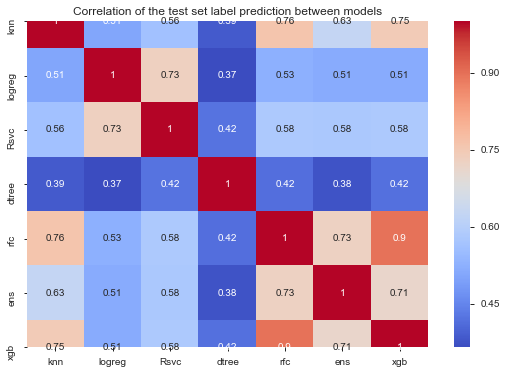

In [249]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))
g = sns.heatmap(pred.corr(), annot=True, cmap='coolwarm', ax=ax)
g.set_title('Correlation of the test set label prediction between models')

In [250]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]

In [251]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(pred, 5))

Top Absolute Correlations
logreg  dtree    0.365193
dtree   ens      0.376757
knn     dtree    0.385475
dtree   rfc      0.417214
        xgb      0.418985
dtype: float64


## Stacking Classifier

In [168]:
estimators_sm= [('ens',smgrid_ens.best_estimator_),('xgb',smgrid_xgb.best_estimator_)]

In [169]:
from sklearn.ensemble import StackingClassifier
sclf3 = StackingClassifier(estimators=estimators_sm
                                , final_estimator=RandomForestClassifier(n_estimators=500,criterion='entropy',
                                                                       max_features='auto'))
sclf3_param = {
              'final_estimator__max_depth' : [7,8,9,10],
             }
sclf3_grid = GridSearchCV(sclf3, sclf3_param,cv=5, return_train_score=True,scoring=f2 )
sclf3_grid.fit(X_train,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(cv=None,
                                          estimators=[('ens',
                                                       Pipeline(memory=None,
                                                                steps=[('smote',
                                                                        SMOTE(k_neighbors=2,
                                                                              n_jobs=None,
                                                                              random_state=None,
                                                                              sampling_strategy='auto')),
                                                                       ('ens',
                                                                        EasyEnsembleClassifier(base_estimator=None,
                                                                                               n_estimators=10,

In [170]:
print(f'Best Mean Cross Validation Score is {sclf3_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf3_grid.best_params_}')
print(f'Train score is {sclf3_grid.score(X_train,y_train)}')
print(f'Test score is {sclf3_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.7782776929133328
Best Mean Cross Validation Score is {'final_estimator__max_depth': 7}
Train score is 0.988857938718663
Test score is 0.8641975308641975


In [309]:
estimators_sm= [('rf4',smgrid_rf4.best_estimator_),('rf',smgrid_rf.best_estimator_)]

In [310]:
from sklearn.ensemble import StackingClassifier
sclf3 = StackingClassifier(estimators=estimators_sm
                                , final_estimator=RandomForestClassifier(n_estimators=500,criterion='entropy',
                                                                       max_features='auto'))
sclf3_param = {
              'final_estimator__max_depth' : [10],
             }
sclf4_grid = GridSearchCV(sclf3, sclf3_param,cv=5, return_train_score=True,scoring=f2 )
sclf4_grid.fit(X_train,y_train)



GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(cv=None,
                                          estimators=[('rf4',
                                                       Pipeline(memory=None,
                                                                steps=[('smote',
                                                                        SMOTE(k_neighbors=3,
                                                                              n_jobs=None,
                                                                              random_state=None,
                                                                              sampling_strategy='auto')),
                                                                       ('rf',
                                                                        RandomForestClassifier(bootstrap=True,
                                                                                               ccp_alpha=0.0,
       

In [311]:
print(f'Best Mean Cross Validation Score is {sclf4_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf4_grid.best_params_}')
print(f'Train score is {sclf4_grid.score(X_train,y_train)}')
print(f'Test score is {sclf4_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.7840109652378293
Best Mean Cross Validation Score is {'final_estimator__max_depth': 10}
Train score is 0.9970238095238095
Test score is 0.8888888888888887


In [82]:
test = pd.read_csv("C:/Users/tharu/OneDrive/Desktop/MS-Sem 2/Applied Machine Learning/Project/project 2/test.csv")

In [83]:
testy=test.drop('Id',axis=1)

In [85]:
testy=project_pipe.transform(testy)

In [150]:
testy.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29
0,-1.538470,-1.079309,1.972553,-1.377534,-0.773444,0.702919,-0.870868,1.082417,-0.789931,-0.423770,0.896552,0.209885,-0.620576,-0.361854,-1.384877,0.660577,0.991411,-1.690717,-0.090685,0.493786,0.300559,0.409305,0.119931,-0.295053,0.331692,-0.277494,0.184017,-0.076897,141.01
1,1.362422,0.189854,1.508660,2.719937,-0.882342,0.128390,-0.622651,0.219444,0.255370,0.521745,-1.117557,-0.342582,-0.918035,-0.224183,-0.198108,0.665628,-0.360430,-0.083164,-0.835712,-0.234089,-0.097584,-0.172683,0.057556,0.360859,0.265443,-0.040417,0.036686,0.033685,0.00
2,-0.519721,1.109673,1.231751,0.725871,0.139675,-0.030415,0.770472,0.072078,-0.793572,0.184147,1.645460,0.845934,0.142001,0.458493,0.542704,-0.498539,-0.115382,0.045651,0.253390,0.095884,0.214610,0.773072,-0.110802,0.248029,-0.326140,-0.330373,0.321788,0.198050,43.25
3,2.545500,0.588986,-1.481645,3.515009,1.271977,0.502868,0.536994,-0.055564,-1.452582,1.608266,-0.017385,0.516420,0.316831,0.466473,-2.042896,0.670720,-0.999955,-0.150430,-0.785459,-0.184958,0.010252,0.020996,0.026001,0.186830,0.288364,-0.004518,-0.073108,-0.063333,30.67
4,1.563353,0.725939,-0.091806,2.370915,0.420349,-0.570252,0.534720,-0.235391,-0.977075,0.747207,-1.026836,-0.436811,-0.236790,0.546444,0.273142,0.487058,-0.641307,-0.304589,-0.696897,-0.177401,-0.052174,-0.176550,-0.161225,-0.123870,0.787280,0.100856,-0.041856,0.004038,1.21


In [295]:
test_data_labels = smgrid_rf.predict(testy)
print('Best parameters: ', smgrid_rf.best_params_)
print('Best cross-validation score:', smgrid_rf.best_score_)

Best parameters:  {'rf__max_depth': 10, 'smote__k_neighbors': 3}
Best cross-validation score: 0.8129644490300227


In [296]:
pd.DataFrame({'Id': test.Id, 'Target': test_data_labels}).to_csv('finalproject18.csv', index =False)  

In [171]:
#sclf3_grid
test_data_labels = sclf3_grid.predict(testy)
print('Best parameters: ', sclf3_grid.best_params_)
print('Best cross-validation score:', sclf3_grid.best_score_)

Best parameters:  {'final_estimator__max_depth': 7}
Best cross-validation score: 0.7782776929133328


In [172]:
from sklearn.ensemble import AdaBoostClassifier
adc_dtree =AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),random_state=42)
adc_dtree_param = {
              'base_estimator__criterion' : ["gini"],
              'base_estimator__splitter' :   ["best"],
              'base_estimator__max_depth' : [9],
              'n_estimators' : [150],
              'learning_rate' : [1.0],
             }
adc_dtree_grid = GridSearchCV(adc_dtree, adc_dtree_param,cv=5, return_train_score=True,scoring=f2 )
adc_dtree_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
 

In [173]:
test_data_labels = adc_dtree_grid.predict(testy)
print(f'Best Mean Cross Validation Score is {adc_dtree_grid.best_score_}')
print(f'Parameters are {adc_dtree_grid.best_params_}')

Best Mean Cross Validation Score is 0.817200639735851
Parameters are {'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 9, 'base_estimator__splitter': 'best', 'learning_rate': 1.0, 'n_estimators': 150}


In [344]:
test_data_labels = smgrid_rf18.predict(testy)
print('Best parameters: ', smgrid_rf18.best_params_)
print('Best cross-validation score:', smgrid_rf18.best_score_)

Best parameters:  {'rf__max_depth': 10, 'smote__k_neighbors': 3}
Best cross-validation score: 0.8233120875026613


In [345]:
pd.DataFrame({'Id': test.Id, 'Target': test_data_labels}).to_csv('finalproject21.csv', index =False)  